In [1]:
import random
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.node import StationRl
from libs.channel import Channel
from tqdm import tqdm
from config import Config
import matplotlib.pyplot as plt

In [2]:
cfg = Config()
global_time = 0
channel = Channel(global_time, [])

station_num = 2
data_rate = 6 #Mbps
#All the lengeth is a mutible of slot

#incule header
pkt_len = 1560
#us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len

frame_len = pkt_len * 8 / slot_len / data_rate
stations_list = []
total_time = 0

#station = StationDcf(i+1, frame_len, channel, global_time, i+1, timeout, ack_len, difs, sifs)
#stations_list.append(station)

for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel, global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel, global_time, i, timeout, ack_len, (i+1))
    stations_list.append(station)

In [3]:
stations_list

In [4]:
if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list)

for station in stations_list:
    total_time += station.total_pkt_time

    if cfg.stationType == "RL":
        station.saveModel()
print("==> total_time:", total_time)
total_time_channel = 0
for i in range(len(channel.start) ):
    if(i > 0):
        if ((channel.start[i] - channel.start[i-1]) < frame_len):
            continue
    total_time_channel += frame_len
print("==> total_time_channel:", total_time_channel)
print("==> channel time:", channel.time)
throughput = total_time/channel.time * data_rate * 1500 / 1560
print("==> throughput:", throughput)

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

==> startEpoch:  0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

  5%|███▌                                                                         | 2344/50000 [00:00<46:22, 17.12it/s]

[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

  9%|██████▉                                                                      | 4478/50000 [00:00<21:45, 34.88it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:

 13%|█████████▊                                                                   | 6387/50000 [00:00<10:14, 70.92it/s]


mean of reward_transmit_list: -6.503273843987745
step in collision 5109.0 5116.0
[in reward_transmit]: input Channel::[1, 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0
 2 0 0 0 2 1 4 tensor(0, device='cuda:0') 

 16%|████████████▍                                                               | 8174/50000 [00:01<04:52, 143.22it/s]


mean of reward_transmit_list: -7.208852392929333
step in collision 6810.0 6825.0
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3
 0 2 1 3 0 2 1 

 18%|█████████████▋                                                              | 9014/50000 [00:01<03:21, 203.10it/s]

[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 

 20%|██████████████▉                                                             | 9828/50000 [00:01<02:20, 285.66it/s]


mean of reward_transmit_list: -7.968078240252929
step in collision 9598.0 9791.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 

 21%|███████████████▊                                                           | 10565/50000 [00:01<01:39, 395.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3
 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3

 22%|████████████████▊                                                          | 11198/50000 [00:01<01:12, 538.11it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1
 3 0 2 1 3 0 2 0 0 0 2 1 4 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0
 2 0 2 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2
 0 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 0 2 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device=

 23%|█████████████████▌                                                         | 11742/50000 [00:02<00:55, 685.54it/s]


mean of reward_transmit_list: -8.27675143448915
step in collision 11493.0 11523.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3
 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4 tensor(0, device='cuda:0') 2 1 4 0 2 0 2
 0 2 0 2 

 24%|██████████████████▎                                                        | 12180/50000 [00:02<00:43, 875.66it/s]


mean of reward_transmit_list: -8.322023160352652
step in collision 11748.0 11918.0
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2
 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0

 26%|███████████████████▎                                                      | 13032/50000 [00:02<00:26, 1408.71it/s]

[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tens

 27%|███████████████████▊                                                      | 13411/50000 [00:02<00:21, 1709.57it/s]

[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1
 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0
 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 

 28%|████████████████████▍                                                     | 13767/50000 [00:02<00:21, 1700.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3
 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3

 28%|████████████████████▊                                                     | 14067/50000 [00:02<00:22, 1587.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3
 0 2 0 0 0 2 1 4 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1
 3 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0
 2 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, dev

 29%|█████████████████████▏                                                    | 14318/50000 [00:03<00:22, 1571.00it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3
 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda

 29%|█████████████████████▊                                                     | 14540/50000 [00:03<00:37, 954.18it/s]


in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3
 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device=

 29%|██████████████████████                                                     | 14710/50000 [00:03<00:43, 808.07it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4 tensor(0, device='cuda:0') 2
 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0
 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 0 2 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1

 30%|██████████████████████▌                                                    | 15013/50000 [00:04<01:21, 427.11it/s]

[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0
 2 1 4 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1
 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0')

 30%|██████████████████████▋                                                    | 15128/50000 [00:05<01:14, 465.08it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 0 2 1 3 0 2 0 0 0 2 1 4
 tensor(0, device='cuda:0') 2 1 4 0 2 0 2 0 2 0 2 0 2 1 3 0 2 0 2 1 3 1 3
 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cu

 30%|██████████████████████▊                                                    | 15230/50000 [00:05<01:04, 538.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|██████████████████████▉                                                    | 15324/50000 [00:06<02:23, 241.00it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 0 2 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2
 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, dev

 31%|███████████████████████▏                                                   | 15465/50000 [00:06<01:48, 316.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 31%|███████████████████████▎                                                   | 15550/50000 [00:07<03:04, 186.29it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[1 3 0 2 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 0 2 tensor(0, devic

 31%|███████████████████████▌                                                   | 15747/50000 [00:07<02:14, 254.55it/s]

[in reward_transmit]: input Channel::[1, 3], state:[0 2 0 2 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 0 2 tensor(0, device='cuda:0') 2
 tensor(0, devic

 32%|███████████████████████▊                                                   | 15910/50000 [00:07<01:42, 333.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 1 3 0 2 1 3 1 3 0 2 1 3 0 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2 0 2 1 3
 1 3 0 2 0 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 0 2 0 2 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 1 3 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 0 2 1 3 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 

 32%|████████████████████████                                                   | 16014/50000 [00:07<01:35, 355.83it/s]


mean of reward_transmit_list: -8.742770017181249
step in collision 15912.0 15957.0
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3
 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2
 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, devic

 32%|████████████████████████▏                                                  | 16128/50000 [00:07<01:18, 430.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[1 3 tensor(0, device='cuda:0') 2 0 2 1 3 1 3 0 2 0 2 0 2 0 2 0 2
 tensor(0, device='cuda:0') 2 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 0 2 0 2
 1 3 0 2 0 2 1 3 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 1 3 0 2 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 0 2
 1 3 1 3 1 3 1 3 tensor(0, device='cuda:0') 2 1 3 0 2 1 3
 tensor(0, device='cuda:0') 2 1 3 0 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 1 3 1 3 0 

 33%|████████████████████████▌                                                  | 16349/50000 [00:08<01:26, 390.82it/s]

 16133.0 16170.0
[in reward_transmit]: input Channel::[1, 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4
 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:

 33%|████████████████████████▊                                                  | 16561/50000 [00:08<01:04, 516.40it/s]

[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3
 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='c

 33%|█████████████████████████                                                  | 16672/50000 [00:08<01:18, 422.10it/s]

 16565.0 16594.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, de

 34%|█████████████████████████▏                                                 | 16781/50000 [00:09<01:09, 481.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 34%|█████████████████████████▋                                                  | 16863/50000 [00:13<10:19, 53.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda

 34%|██████████████████████████                                                  | 17106/50000 [00:15<08:57, 61.15it/s]

step in collision 16891.0 17020.0
[in reward_transmit]: input Channel::[1, 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2
 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0

 34%|██████████████████████████                                                  | 17170/50000 [00:16<07:31, 72.69it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, de

 35%|█████████████████████████▉                                                 | 17325/50000 [00:16<05:21, 101.77it/s]

[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 

 35%|██████████████████████████▍                                                 | 17405/50000 [00:18<08:03, 67.45it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2 0 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 0 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor

 35%|██████████████████████████▋                                                 | 17569/50000 [00:18<05:46, 93.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 36%|███████████████████████████                                                 | 17818/50000 [00:21<06:47, 78.95it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cu

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tens

 36%|███████████████████████████                                                | 18045/50000 [00:22<04:53, 108.82it/s]

 17831.0 17868.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, devic

 37%|███████████████████████████▍                                               | 18257/50000 [00:22<03:32, 149.60it/s]

[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1

 37%|███████████████████████████▋                                               | 18469/50000 [00:22<02:33, 205.89it/s]

 18294.0 18467.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in 

 37%|████████████████████████████▏                                               | 18582/50000 [00:26<07:29, 69.97it/s]


mean of reward_transmit_list: -8.79296681003898
step in collision 18528.0 18718.0
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[0, 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1
 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0
 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 

 37%|████████████████████████████▍                                               | 18743/50000 [00:27<05:21, 97.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 38%|████████████████████████████▌                                               | 18830/50000 [00:32<13:55, 37.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 38%|████████████████████████████▋                                               | 18891/50000 [00:34<13:49, 37.52it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 

 38%|████████████████████████████▉                                               | 19066/50000 [00:34<09:45, 52.81it/s]


mean of reward_transmit_list: -8.81332706661546
step in collision 18931.0 19063.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rewa

 38%|█████████████████████████████                                               | 19130/50000 [00:37<14:33, 35.35it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 2 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 1 3 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor

 39%|█████████████████████████████▍                                              | 19326/50000 [00:37<10:14, 49.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0

 39%|█████████████████████████████▍                                              | 19394/50000 [00:42<17:39, 28.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 39%|█████████████████████████████▌                                              | 19442/50000 [00:45<22:53, 22.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='c

 39%|█████████████████████████████▌                                              | 19476/50000 [00:46<19:37, 25.92it/s]


mean of reward_transmit_list: -8.80322284534465
step in collision 19451.0 19568.0
[in reward_transmit]: input Channel::[1, 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0
 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 

 39%|█████████████████████████████▉                                              | 19666/50000 [00:46<13:46, 36.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 39%|█████████████████████████████▉                                              | 19720/50000 [00:50<20:06, 25.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 40%|██████████████████████████████                                              | 19758/50000 [00:53<24:29, 20.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 40%|██████████████████████████████                                              | 19785/50000 [00:55<28:14, 17.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2

 40%|██████████████████████████████                                              | 19805/50000 [00:55<24:02, 20.93it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tenso

 40%|██████████████████████████████▍                                             | 20005/50000 [00:55<16:50, 29.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 40%|██████████████████████████████▍                                             | 20053/50000 [00:59<23:00, 21.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▌                                             | 20087/50000 [01:02<27:17, 18.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▌                                             | 20111/50000 [01:03<29:51, 16.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▌                                             | 20129/50000 [01:05<31:22, 15.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▌                                             | 20142/50000 [01:05<32:36, 15.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20152/50000 [01:06<33:15, 14.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20159/50000 [01:07<33:55, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20165/50000 [01:07<34:13, 14.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20170/50000 [01:07<34:29, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 20174/50000 [01:08<34:33, 14.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20177/50000 [01:08<34:46, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20180/50000 [01:08<34:47, 14.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20183/50000 [01:08<34:38, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20187/50000 [01:09<34:34, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20189/50000 [01:09<35:25, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20193/50000 [01:09<35:52, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20195/50000 [01:09<36:01, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20199/50000 [01:10<36:33, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20201/50000 [01:10<36:44, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20205/50000 [01:10<35:57, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20207/50000 [01:10<36:05, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 40%|██████████████████████████████▋                                             | 20211/50000 [01:10<37:12, 13.34it/s]

[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1

 40%|██████████████████████████████▋                                             | 20213/50000 [01:11<35:55, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20217/50000 [01:11<35:40, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20221/50000 [01:11<34:16, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▋                                             | 20223/50000 [01:11<33:43, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20225/50000 [01:11<33:48, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▋                                             | 20229/50000 [01:12<34:01, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▊                                             | 20233/50000 [01:12<33:12, 14.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▊                                             | 20235/50000 [01:12<33:38, 14.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 40%|██████████████████████████████▊                                             | 20237/50000 [01:12<33:51, 14.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▊                                             | 20241/50000 [01:12<35:44, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▊                                             | 20243/50000 [01:13<35:33, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 40%|██████████████████████████████▊                                             | 20247/50000 [01:13<34:58, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|██████████████████████████████▊                                             | 20251/50000 [01:13<34:10, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 41%|██████████████████████████████▊                                             | 20253/50000 [01:13<35:05, 14.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|██████████████████████████████▊                                             | 20255/50000 [01:13<35:36, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|██████████████████████████████▊                                             | 20259/50000 [01:14<35:45, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|██████████████████████████████▊                                             | 20261/50000 [01:14<34:48, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|██████████████████████████████▊                                             | 20265/50000 [01:14<35:00, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|██████████████████████████████▊                                             | 20269/50000 [01:14<34:21, 14.42it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 41%|███████████████████████████████▏                                            | 20481/50000 [01:15<23:59, 20.51it/s]


mean of reward_transmit_list: -8.847764793644858
step in collision 20420.0 20478.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 41%|███████████████████████████████▏                                            | 20523/50000 [01:18<27:06, 18.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 41%|███████████████████████████████▏                                            | 20553/50000 [01:19<23:44, 20.67it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 41%|███████████████████████████████▌                                            | 20749/50000 [01:19<16:38, 29.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 42%|███████████████████████████████▉                                            | 21004/50000 [01:22<14:31, 33.28it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tenso

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 42%|████████████████████████████████                                            | 21081/50000 [01:23<12:54, 37.34it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tenso

 42%|████████████████████████████████▎                                           | 21235/50000 [01:24<09:08, 52.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tens

 43%|████████████████████████████████▍                                           | 21302/50000 [01:25<09:41, 49.31it/s]

 21252.0 21270.0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3
 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2
 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 

 43%|████████████████████████████████▋                                           | 21467/50000 [01:25<06:52, 69.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4
 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 

 43%|████████████████████████████████▋                                           | 21537/50000 [01:30<15:03, 31.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 43%|████████████████████████████████▊                                           | 21586/50000 [01:34<20:25, 23.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▊                                           | 21621/50000 [01:36<24:07, 19.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21646/50000 [01:38<26:44, 17.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21664/50000 [01:39<28:39, 16.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21677/50000 [01:40<30:11, 15.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21687/50000 [01:41<31:26, 15.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21694/50000 [01:41<31:42, 14.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0
 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 

 43%|████████████████████████████████▉                                           | 21700/50000 [01:42<32:38, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21705/50000 [01:42<32:53, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|████████████████████████████████▉                                           | 21709/50000 [01:42<32:50, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21715/50000 [01:43<32:06, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21720/50000 [01:43<32:20, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|█████████████████████████████████                                           | 21722/50000 [01:43<33:40, 14.00it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21726/50000 [01:44<33:15, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21728/50000 [01:44<32:52, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21732/50000 [01:44<32:55, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21736/50000 [01:44<32:14, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21738/50000 [01:44<32:30, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 43%|█████████████████████████████████                                           | 21740/50000 [01:44<32:32, 14.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21744/50000 [01:45<32:14, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 43%|█████████████████████████████████                                           | 21746/50000 [01:45<31:39, 14.88it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 44%|█████████████████████████████████▍                                          | 21958/50000 [01:45<22:05, 21.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 44%|█████████████████████████████████▍                                          | 21999/50000 [01:48<25:15, 18.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▍                                          | 22028/50000 [01:50<27:49, 16.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22049/50000 [01:52<29:49, 15.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22064/50000 [01:53<30:54, 15.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22075/50000 [01:53<31:45, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22083/50000 [01:54<32:25, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22089/50000 [01:54<32:36, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22094/50000 [01:55<33:00, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22098/50000 [01:55<33:23, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22101/50000 [01:55<33:09, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22104/50000 [01:56<33:53, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22109/50000 [01:56<34:04, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22111/50000 [01:56<34:14, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22115/50000 [01:56<32:47, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▌                                          | 22117/50000 [01:56<32:10, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▌                                          | 22121/50000 [01:57<34:31, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3
 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 

 44%|█████████████████████████████████▋                                          | 22123/50000 [01:57<36:28, 12.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22127/50000 [01:57<34:54, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 22131/50000 [01:58<31:54, 14.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 22133/50000 [01:58<32:03, 14.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22135/50000 [01:58<32:16, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22139/50000 [01:58<33:48, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22141/50000 [01:58<34:08, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22145/50000 [01:59<34:01, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22147/50000 [01:59<32:58, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22151/50000 [01:59<33:49, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22153/50000 [01:59<35:16, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22157/50000 [01:59<34:52, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22159/50000 [02:00<34:34, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22163/50000 [02:00<33:33, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 22165/50000 [02:00<33:12, 13.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22169/50000 [02:00<32:01, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 22171/50000 [02:00<31:38, 14.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22175/50000 [02:01<31:51, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22177/50000 [02:01<32:34, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22181/50000 [02:01<31:45, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 44%|█████████████████████████████████▋                                          | 22183/50000 [02:01<31:56, 14.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22187/50000 [02:02<31:43, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22189/50000 [02:02<31:17, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22193/50000 [02:02<31:42, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22195/50000 [02:02<34:36, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22199/50000 [02:02<33:54, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▋                                          | 22203/50000 [02:03<30:44, 15.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▊                                          | 22205/50000 [02:03<31:17, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▊                                          | 22209/50000 [02:03<31:54, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 44%|█████████████████████████████████▊                                          | 22211/50000 [02:03<32:56, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 45%|██████████████████████████████████                                          | 22426/50000 [02:04<22:50, 20.12it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 45%|██████████████████████████████████▏                                         | 22479/50000 [02:08<26:03, 17.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 45%|██████████████████████████████████▏                                         | 22516/50000 [02:10<28:11, 16.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 45%|██████████████████████████████████▎                                         | 22543/50000 [02:12<29:23, 15.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, devic

 45%|██████████████████████████████████▎                                         | 22562/50000 [02:14<30:40, 14.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 45%|██████████████████████████████████▎                                         | 22576/50000 [02:14<30:57, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 45%|██████████████████████████████████▎                                         | 22586/50000 [02:15<26:18, 17.36it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor

 46%|██████████████████████████████████▋                                         | 22792/50000 [02:15<18:21, 24.69it/s]

[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3

 46%|██████████████████████████████████▉                                         | 23013/50000 [02:16<10:14, 43.88it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tenso

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 46%|███████████████████████████████████                                         | 23084/50000 [02:21<16:23, 27.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 46%|███████████████████████████████████▏                                        | 23134/50000 [02:24<20:50, 21.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 46%|███████████████████████████████████▏                                        | 23170/50000 [02:27<23:42, 18.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 t

 46%|███████████████████████████████████▎                                        | 23196/50000 [02:28<26:23, 16.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 23214/50000 [02:30<28:22, 15.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 23227/50000 [02:31<29:39, 15.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 23237/50000 [02:31<30:06, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 46%|███████████████████████████████████▎                                        | 23245/50000 [02:32<30:32, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▎                                        | 23251/50000 [02:32<30:54, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▎                                        | 23256/50000 [02:33<31:25, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▎                                        | 23260/50000 [02:33<31:52, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▎                                        | 23263/50000 [02:33<32:00, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▎                                        | 23266/50000 [02:34<32:00, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 47%|███████████████████████████████████▎                                        | 23269/50000 [02:34<31:50, 13.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▎                                        | 23271/50000 [02:34<33:07, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23275/50000 [02:34<33:13, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23277/50000 [02:34<32:51, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23281/50000 [02:35<33:48, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23283/50000 [02:35<33:38, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23287/50000 [02:35<33:18, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23289/50000 [02:35<32:46, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23293/50000 [02:36<33:12, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23295/50000 [02:36<33:18, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23299/50000 [02:36<31:54, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23301/50000 [02:36<32:59, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23305/50000 [02:36<34:14, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23307/50000 [02:37<34:41, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23311/50000 [02:37<33:39, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23313/50000 [02:37<34:10, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23317/50000 [02:37<32:34, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23319/50000 [02:38<32:02, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23323/50000 [02:38<32:26, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23325/50000 [02:38<32:20, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23329/50000 [02:38<31:38, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23331/50000 [02:38<31:55, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23335/50000 [02:39<30:59, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23337/50000 [02:39<32:27, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23341/50000 [02:39<31:51, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23343/50000 [02:39<33:07, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23347/50000 [02:40<33:19, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23349/50000 [02:40<33:29, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23353/50000 [02:40<31:55, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▍                                        | 23355/50000 [02:40<31:26, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23359/50000 [02:40<31:42, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23361/50000 [02:41<30:57, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23365/50000 [02:41<31:53, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23367/50000 [02:41<31:48, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23371/50000 [02:41<32:15, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23373/50000 [02:41<31:52, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23377/50000 [02:42<30:49, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23381/50000 [02:42<32:10, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23383/50000 [02:42<32:13, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23387/50000 [02:42<32:23, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23389/50000 [02:43<32:53, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23393/50000 [02:43<33:31, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23395/50000 [02:43<36:51, 12.03it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 1], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3

 47%|███████████████████████████████████▌                                        | 23397/50000 [02:43<36:08, 12.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23401/50000 [02:44<35:41, 12.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23403/50000 [02:44<35:35, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23407/50000 [02:44<33:54, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23411/50000 [02:44<33:47, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23413/50000 [02:44<33:51, 13.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23415/50000 [02:45<33:18, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23419/50000 [02:45<32:29, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23421/50000 [02:45<32:29, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23425/50000 [02:45<32:09, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23427/50000 [02:45<32:34, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23431/50000 [02:46<32:33, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23433/50000 [02:46<32:28, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▌                                        | 23437/50000 [02:46<32:56, 13.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 47%|███████████████████████████████████▋                                        | 23439/50000 [02:46<32:39, 13.55it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 47%|███████████████████████████████████▉                                        | 23650/50000 [02:47<22:45, 19.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 47%|████████████████████████████████████                                        | 23700/50000 [02:50<25:31, 17.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 47%|████████████████████████████████████                                        | 23736/50000 [02:53<27:15, 16.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████                                        | 23761/50000 [02:55<28:42, 15.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23779/50000 [02:56<29:32, 14.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▏                                       | 23792/50000 [02:57<30:18, 14.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23802/50000 [02:58<30:46, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23810/50000 [02:58<31:32, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23816/50000 [02:59<31:58, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0')
 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2
 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3
 1 3 1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, devic

 48%|████████████████████████████████████▏                                       | 23821/50000 [02:59<33:06, 13.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23825/50000 [02:59<32:08, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23828/50000 [03:00<31:44, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23831/50000 [03:00<31:57, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23834/50000 [03:00<31:32, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23836/50000 [03:00<31:55, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23840/50000 [03:00<31:23, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23842/50000 [03:01<31:41, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23846/50000 [03:01<31:11, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▏                                       | 23848/50000 [03:01<31:47, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23852/50000 [03:01<32:40, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23854/50000 [03:01<33:06, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23858/50000 [03:02<32:21, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23860/50000 [03:02<32:01, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23864/50000 [03:02<32:50, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23866/50000 [03:02<33:03, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23870/50000 [03:03<32:28, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23872/50000 [03:03<32:49, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23876/50000 [03:03<32:50, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23878/50000 [03:03<32:21, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23882/50000 [03:04<32:23, 13.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23884/50000 [03:04<31:53, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23888/50000 [03:04<32:07, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23890/50000 [03:04<32:14, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23894/50000 [03:04<33:11, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23896/50000 [03:05<34:37, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 48%|████████████████████████████████████▎                                       | 23898/50000 [03:05<35:33, 12.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23902/50000 [03:05<35:48, 12.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23904/50000 [03:05<36:54, 11.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23908/50000 [03:06<36:37, 11.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23910/50000 [03:06<35:22, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23914/50000 [03:06<34:59, 12.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23916/50000 [03:06<34:20, 12.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23920/50000 [03:07<33:39, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23922/50000 [03:07<33:57, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23926/50000 [03:07<32:12, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▎                                       | 23928/50000 [03:07<31:31, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 23932/50000 [03:07<30:59, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 23934/50000 [03:08<31:53, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 23938/50000 [03:08<33:06, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 23940/50000 [03:08<33:02, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 23944/50000 [03:08<33:45, 12.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 48%|████████████████████████████████████▍                                       | 23946/50000 [03:09<34:13, 12.69it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor

 48%|████████████████████████████████████▋                                       | 24159/50000 [03:09<23:16, 18.50it/s]

step in collision 23945.0 24029.0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0
 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2
 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3
 1 3 1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 

 48%|████████████████████████████████████▊                                       | 24207/50000 [03:12<25:49, 16.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 48%|████████████████████████████████████▊                                       | 24241/50000 [03:15<27:26, 15.65it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1
 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0')
 3 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3


 49%|████████████████████████████████████▉                                       | 24265/50000 [03:17<28:53, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24283/50000 [03:18<29:27, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24296/50000 [03:19<29:52, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24306/50000 [03:20<30:04, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24313/50000 [03:20<30:22, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24319/50000 [03:21<30:49, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24324/50000 [03:21<31:16, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24328/50000 [03:21<31:44, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24331/50000 [03:21<31:36, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24334/50000 [03:22<31:23, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24338/50000 [03:22<30:45, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|████████████████████████████████████▉                                       | 24340/50000 [03:22<30:36, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24344/50000 [03:22<30:48, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24346/50000 [03:23<30:19, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24350/50000 [03:23<31:11, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24352/50000 [03:23<30:47, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24356/50000 [03:23<31:24, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24358/50000 [03:23<31:13, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24362/50000 [03:24<30:28, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24364/50000 [03:24<30:24, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24368/50000 [03:24<30:17, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24372/50000 [03:24<30:24, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24374/50000 [03:25<30:38, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24376/50000 [03:25<30:38, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24380/50000 [03:25<30:04, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24382/50000 [03:25<30:16, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24386/50000 [03:25<30:18, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24390/50000 [03:26<29:38, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████                                       | 24392/50000 [03:26<30:15, 14.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24394/50000 [03:26<30:03, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24398/50000 [03:26<31:56, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24400/50000 [03:26<32:26, 13.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24404/50000 [03:27<31:50, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24406/50000 [03:27<31:34, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24410/50000 [03:27<32:11, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24412/50000 [03:27<31:31, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24416/50000 [03:28<33:08, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 49%|█████████████████████████████████████                                       | 24418/50000 [03:28<34:01, 12.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24420/50000 [03:28<33:04, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████                                       | 24424/50000 [03:28<31:41, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▏                                      | 24426/50000 [03:28<31:10, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▏                                      | 24430/50000 [03:29<31:38, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▏                                      | 24432/50000 [03:29<31:19, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 49%|█████████████████████████████████████▍                                      | 24647/50000 [03:29<21:03, 20.06it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1
 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0
 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3

 49%|█████████████████████████████████████▌                                      | 24711/50000 [03:34<24:17, 17.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 50%|█████████████████████████████████████▉                                      | 24962/50000 [03:37<17:45, 23.50it/s]


mean of reward_transmit_list: -8.884872813187501
step in collision 24748.0 24877.0
[in reward_transmit]: input Channel::[1, 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1
 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1

 50%|██████████████████████████████████████                                      | 25046/50000 [03:43<21:17, 19.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 50%|██████████████████████████████████████▏                                     | 25105/50000 [03:47<23:55, 17.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 50%|██████████████████████████████████████▏                                     | 25147/50000 [03:50<25:34, 16.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 25177/50000 [03:53<26:45, 15.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 25198/50000 [03:54<27:33, 15.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 25214/50000 [03:55<28:02, 14.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 25226/50000 [03:56<28:35, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 25235/50000 [03:57<28:58, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▎                                     | 25242/50000 [03:57<29:12, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 50%|██████████████████████████████████████▍                                     | 25247/50000 [03:58<29:32, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25251/50000 [03:58<29:35, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25254/50000 [03:58<29:16, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25257/50000 [03:58<29:34, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25260/50000 [03:59<29:11, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25264/50000 [03:59<30:13, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25266/50000 [03:59<30:13, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25270/50000 [03:59<30:34, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25272/50000 [03:59<30:42, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25276/50000 [04:00<30:37, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▍                                     | 25278/50000 [04:00<33:38, 12.25it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 51%|██████████████████████████████████████▋                                     | 25490/50000 [04:00<23:25, 17.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 51%|██████████████████████████████████████▊                                     | 25537/50000 [04:04<25:38, 15.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▊                                     | 25570/50000 [04:06<27:24, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 51%|██████████████████████████████████████▉                                     | 25594/50000 [04:07<22:00, 18.48it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 52%|███████████████████████████████████████▏                                    | 25789/50000 [04:07<15:22, 26.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 52%|███████████████████████████████████████▎                                    | 25845/50000 [04:11<19:58, 20.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 52%|███████████████████████████████████████▎                                    | 25885/50000 [04:14<23:08, 17.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▍                                    | 25913/50000 [04:16<25:55, 15.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▍                                    | 25933/50000 [04:18<27:22, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 4], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0
 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3


 52%|███████████████████████████████████████▍                                    | 25948/50000 [04:19<28:59, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▍                                    | 25959/50000 [04:20<29:43, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 52%|███████████████████████████████████████▊                                    | 26180/50000 [04:21<16:02, 24.74it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 52%|███████████████████████████████████████▊                                    | 26231/50000 [04:24<19:28, 20.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0

 53%|████████████████████████████████████████▏                                   | 26457/50000 [04:26<11:54, 32.97it/s]

 26243.0 26361.0
[in reward_transmit]: input Channel::[tensor(1, device='cuda:0'), 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device=

 53%|████████████████████████████████████████▋                                   | 26728/50000 [04:30<11:10, 34.73it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 54%|████████████████████████████████████████▊                                   | 26819/50000 [04:36<15:56, 24.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 54%|████████████████████████████████████████▊                                   | 26883/50000 [04:37<11:54, 32.35it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 t

 54%|█████████████████████████████████████████                                   | 27036/50000 [04:37<08:23, 45.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cud

 54%|█████████████████████████████████████████▎                                  | 27214/50000 [04:39<06:43, 56.51it/s]

 27063.0 27209.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▍                                  | 27274/50000 [04:40<05:27, 69.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, dev

 55%|█████████████████████████████████████████▌                                  | 27321/50000 [04:43<11:34, 32.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▌                                  | 27354/50000 [04:45<16:03, 23.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▌                                  | 27378/50000 [04:47<19:14, 19.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27395/50000 [04:48<21:26, 17.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27408/50000 [04:49<22:50, 16.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27417/50000 [04:50<23:50, 15.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27424/50000 [04:50<24:42, 15.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27430/50000 [04:50<26:05, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27434/50000 [04:51<26:23, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 

 55%|█████████████████████████████████████████▋                                  | 27438/50000 [04:51<28:22, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27444/50000 [04:52<27:01, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27449/50000 [04:52<26:45, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27453/50000 [04:52<26:56, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27455/50000 [04:52<26:36, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 27457/50000 [04:52<27:03, 13.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▋                                  | 27461/50000 [04:53<26:12, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 27465/50000 [04:53<25:23, 14.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▋                                  | 27467/50000 [04:53<25:28, 14.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27469/50000 [04:53<25:11, 14.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27473/50000 [04:54<25:20, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27475/50000 [04:54<25:16, 14.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27479/50000 [04:54<25:32, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27481/50000 [04:54<25:14, 14.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27485/50000 [04:54<25:41, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27489/50000 [04:55<25:39, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 27491/50000 [04:55<25:44, 14.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 55%|█████████████████████████████████████████▊                                  | 27493/50000 [04:55<26:32, 14.14it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27497/50000 [04:55<27:17, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27499/50000 [04:55<26:59, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27503/50000 [04:56<26:19, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27505/50000 [04:56<25:52, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27509/50000 [04:56<26:12, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27511/50000 [04:56<26:03, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27515/50000 [04:56<26:40, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27517/50000 [04:57<26:14, 14.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27521/50000 [04:57<25:57, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27525/50000 [04:57<24:38, 15.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27527/50000 [04:57<25:35, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27531/50000 [04:58<26:21, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27533/50000 [04:58<26:14, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27537/50000 [04:58<25:59, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27541/50000 [04:58<26:20, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27543/50000 [04:58<26:06, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27545/50000 [04:59<26:35, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▊                                  | 27549/50000 [04:59<26:53, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27551/50000 [04:59<26:29, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27555/50000 [04:59<27:04, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27557/50000 [04:59<26:53, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27561/50000 [05:00<26:55, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27563/50000 [05:00<26:30, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27567/50000 [05:00<26:43, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27569/50000 [05:00<26:43, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27573/50000 [05:01<26:38, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 55%|█████████████████████████████████████████▉                                  | 27575/50000 [05:01<26:38, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, de

 56%|██████████████████████████████████████████▏                                 | 27789/50000 [05:01<20:26, 18.12it/s]


mean of reward_transmit_list: -8.94893409830956
step in collision 27575.0 27648.0
[in reward_transmit]: input Channel::[1, 3], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:

 56%|██████████████████████████████████████████▎                                 | 27843/50000 [05:03<17:32, 21.06it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 56%|██████████████████████████████████████████▌                                 | 28024/50000 [05:03<08:59, 40.70it/s]


mean of reward_transmit_list: -8.961848601672859
step in collision 27863.0 28021.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 56%|██████████████████████████████████████████▋                                 | 28080/50000 [05:07<14:18, 25.53it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0
 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tens

 56%|██████████████████████████████████████████▋                                 | 28120/50000 [05:10<18:12, 20.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▊                                 | 28149/50000 [05:12<20:36, 17.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▊                                 | 28170/50000 [05:14<22:30, 16.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▊                                 | 28185/50000 [05:15<23:38, 15.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▊                                 | 28196/50000 [05:16<24:25, 14.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▊                                 | 28204/50000 [05:16<24:56, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28210/50000 [05:17<25:04, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28215/50000 [05:17<25:15, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28219/50000 [05:17<25:16, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28222/50000 [05:17<25:43, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28225/50000 [05:18<25:37, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28228/50000 [05:18<25:32, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28232/50000 [05:18<26:02, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28236/50000 [05:18<25:46, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28238/50000 [05:19<25:57, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28240/50000 [05:19<26:11, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28244/50000 [05:19<24:58, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28246/50000 [05:19<25:17, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 56%|██████████████████████████████████████████▉                                 | 28250/50000 [05:19<26:21, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28252/50000 [05:20<26:11, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28256/50000 [05:20<25:55, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28258/50000 [05:20<25:53, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28262/50000 [05:20<24:54, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28264/50000 [05:20<24:45, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28268/50000 [05:21<24:32, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28270/50000 [05:21<24:32, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28274/50000 [05:21<23:40, 15.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28276/50000 [05:21<23:57, 15.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28280/50000 [05:21<25:38, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28282/50000 [05:22<24:22, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28286/50000 [05:22<24:56, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|██████████████████████████████████████████▉                                 | 28288/50000 [05:22<25:05, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28292/50000 [05:22<25:31, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28294/50000 [05:22<25:26, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 57%|███████████████████████████████████████████                                 | 28296/50000 [05:23<27:36, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 57%|███████████████████████████████████████████                                 | 28298/50000 [05:23<31:15, 11.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 57%|███████████████████████████████████████████                                 | 28300/50000 [05:23<34:51, 10.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4 1 3 0 0 1 3 0 0 1 3 0 2 1 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor

 57%|███████████████████████████████████████████                                 | 28302/50000 [05:23<35:51, 10.08it/s]

 28299.0 28294.0
after in send 28299.0 28511.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28306/50000 [05:24<30:59, 11.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28308/50000 [05:24<29:44, 12.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28312/50000 [05:24<28:38, 12.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28314/50000 [05:24<27:20, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28318/50000 [05:24<26:17, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28320/50000 [05:25<26:12, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28324/50000 [05:25<25:13, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28326/50000 [05:25<26:08, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28330/50000 [05:25<25:59, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28334/50000 [05:26<25:30, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28336/50000 [05:26<25:26, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28340/50000 [05:26<25:01, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 28342/50000 [05:26<25:56, 13.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28344/50000 [05:26<26:02, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28348/50000 [05:27<25:37, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████                                 | 28350/50000 [05:27<25:16, 14.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28354/50000 [05:27<26:20, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28356/50000 [05:27<26:16, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28360/50000 [05:27<26:15, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28362/50000 [05:28<26:08, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28366/50000 [05:28<26:19, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████                                 | 28368/50000 [05:28<25:58, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28372/50000 [05:28<26:03, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28376/50000 [05:29<24:51, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28378/50000 [05:29<24:43, 14.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28382/50000 [05:29<23:57, 15.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28384/50000 [05:29<24:25, 14.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28388/50000 [05:29<24:07, 14.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28390/50000 [05:30<24:38, 14.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28392/50000 [05:30<23:59, 15.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28396/50000 [05:30<24:04, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28398/50000 [05:30<24:26, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28402/50000 [05:30<25:08, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28404/50000 [05:31<25:27, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28408/50000 [05:31<25:44, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28410/50000 [05:31<25:18, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28414/50000 [05:31<25:07, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28418/50000 [05:31<24:32, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28420/50000 [05:32<25:05, 14.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28422/50000 [05:32<25:57, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28426/50000 [05:32<24:50, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28428/50000 [05:32<24:48, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28432/50000 [05:32<25:20, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28434/50000 [05:33<25:06, 14.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28438/50000 [05:33<24:31, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▏                                | 28442/50000 [05:33<24:12, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28444/50000 [05:33<23:52, 15.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 57%|███████████████████████████████████████████▏                                | 28446/50000 [05:33<24:19, 14.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▎                                | 28515/50000 [05:34<16:42, 21.42it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 57%|███████████████████████████████████████████▌                                | 28662/50000 [05:34<09:11, 38.66it/s]

step in collision 28518.0 28659.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wai

 57%|███████████████████████████████████████████▌                                | 28700/50000 [05:37<14:07, 25.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 57%|███████████████████████████████████████████▋                                | 28727/50000 [05:39<17:20, 20.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[1, 4], state:[0 0 0 0 0 0 0 0 0 0 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 4
 1 3 0 0 1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, dev

 57%|███████████████████████████████████████████▋                                | 28746/50000 [05:40<19:44, 17.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▋                                | 28760/50000 [05:41<21:19, 16.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▋                                | 28771/50000 [05:42<22:20, 15.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▋                                | 28779/50000 [05:43<23:05, 15.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28785/50000 [05:43<23:39, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28790/50000 [05:43<23:53, 14.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28794/50000 [05:44<23:38, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28797/50000 [05:44<23:51, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28803/50000 [05:44<23:20, 15.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28806/50000 [05:44<23:56, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28808/50000 [05:44<24:06, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28812/50000 [05:45<24:48, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 28814/50000 [05:45<24:51, 14.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28818/50000 [05:45<25:13, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28822/50000 [05:45<24:17, 14.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 28824/50000 [05:46<24:36, 14.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28828/50000 [05:46<23:43, 14.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28830/50000 [05:46<25:19, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28832/50000 [05:46<25:03, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28836/50000 [05:46<25:08, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28838/50000 [05:47<24:52, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28842/50000 [05:47<24:47, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28844/50000 [05:47<25:01, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28848/50000 [05:47<24:59, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 28850/50000 [05:47<24:20, 14.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28854/50000 [05:48<23:35, 14.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28856/50000 [05:48<24:06, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▊                                | 28860/50000 [05:48<24:25, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▊                                | 28862/50000 [05:48<24:37, 14.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28866/50000 [05:49<24:50, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28868/50000 [05:49<24:29, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28872/50000 [05:49<24:37, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28874/50000 [05:49<24:52, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28878/50000 [05:49<24:08, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28882/50000 [05:50<23:36, 14.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 28884/50000 [05:50<23:54, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28886/50000 [05:50<24:15, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28890/50000 [05:50<24:11, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28892/50000 [05:50<24:46, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28896/50000 [05:51<24:55, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28898/50000 [05:51<24:45, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28902/50000 [05:51<24:32, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 28904/50000 [05:51<24:00, 14.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28908/50000 [05:51<24:09, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28912/50000 [05:52<23:06, 15.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 28914/50000 [05:52<23:21, 15.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28916/50000 [05:52<23:54, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28920/50000 [05:52<24:17, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28922/50000 [05:52<24:49, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28926/50000 [05:53<24:32, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28928/50000 [05:53<24:22, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28932/50000 [05:53<24:23, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28934/50000 [05:53<25:22, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28938/50000 [05:54<25:21, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|███████████████████████████████████████████▉                                | 28940/50000 [05:54<23:50, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|███████████████████████████████████████████▉                                | 28944/50000 [05:54<26:45, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|███████████████████████████████████████████▉                                | 28946/50000 [05:54<30:48, 11.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|████████████████████████████████████████████                                | 28948/50000 [05:54<34:04, 10.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|████████████████████████████████████████████                                | 28950/50000 [05:55<35:39,  9.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|████████████████████████████████████████████                                | 28952/50000 [05:55<36:08,  9.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|████████████████████████████████████████████                                | 28955/50000 [05:55<39:25,  8.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 58%|████████████████████████████████████████████                                | 28956/50000 [05:55<40:43,  8.61it/s]


in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[1 3 0 0 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 

 58%|████████████████████████████████████████████                                | 28957/50000 [05:56<44:20,  7.91it/s]

 28955.0 28942.0
after in send 28955.0 29167.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28961/50000 [05:56<34:51, 10.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28963/50000 [05:56<31:28, 11.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28967/50000 [05:56<27:36, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 28969/50000 [05:56<26:14, 13.36it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28973/50000 [05:57<26:34, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28977/50000 [05:57<25:46, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28979/50000 [05:57<25:35, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28981/50000 [05:57<25:27, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28985/50000 [05:58<25:22, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28987/50000 [05:58<25:05, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28991/50000 [05:58<24:25, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28993/50000 [05:58<24:11, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 28997/50000 [05:58<23:57, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 29001/50000 [05:59<23:30, 14.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 29003/50000 [05:59<23:18, 15.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 29007/50000 [05:59<22:25, 15.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 29011/50000 [05:59<22:27, 15.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 29013/50000 [05:59<23:15, 15.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 29017/50000 [06:00<23:23, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 29019/50000 [06:00<23:40, 14.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████                                | 29021/50000 [06:00<23:44, 14.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 29025/50000 [06:00<24:36, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████                                | 29027/50000 [06:00<24:01, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29031/50000 [06:01<24:15, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29033/50000 [06:01<23:48, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29037/50000 [06:01<23:58, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29039/50000 [06:01<23:44, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29043/50000 [06:01<23:48, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29045/50000 [06:02<23:31, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29049/50000 [06:02<23:16, 15.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29051/50000 [06:02<23:29, 14.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29055/50000 [06:02<23:56, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29057/50000 [06:02<23:32, 14.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29061/50000 [06:03<23:50, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29063/50000 [06:03<23:30, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29067/50000 [06:03<23:18, 14.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29071/50000 [06:03<23:21, 14.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 29073/50000 [06:03<23:59, 14.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29075/50000 [06:04<23:43, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29079/50000 [06:04<23:17, 14.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29083/50000 [06:04<23:14, 15.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 29085/50000 [06:04<23:34, 14.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29087/50000 [06:04<23:34, 14.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29091/50000 [06:05<23:50, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29095/50000 [06:05<23:20, 14.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▏                               | 29097/50000 [06:05<23:20, 14.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29099/50000 [06:05<23:08, 15.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29103/50000 [06:06<23:34, 14.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29105/50000 [06:06<23:25, 14.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▏                               | 29109/50000 [06:06<23:24, 14.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29113/50000 [06:06<23:49, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29115/50000 [06:06<23:58, 14.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29117/50000 [06:06<24:07, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29121/50000 [06:07<23:40, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29125/50000 [06:07<23:17, 14.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29127/50000 [06:07<23:01, 15.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29129/50000 [06:07<22:55, 15.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29133/50000 [06:08<23:44, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29135/50000 [06:08<23:49, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29139/50000 [06:08<23:40, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29143/50000 [06:08<23:02, 15.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29145/50000 [06:08<23:11, 14.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29147/50000 [06:08<23:10, 15.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29151/50000 [06:09<23:33, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29153/50000 [06:09<23:21, 14.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29157/50000 [06:09<23:22, 14.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29161/50000 [06:09<23:20, 14.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29163/50000 [06:10<23:25, 14.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29167/50000 [06:10<23:30, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29169/50000 [06:10<26:11, 13.25it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|████████████████████████████████████████████▎                               | 29171/50000 [06:10<29:55, 11.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 58%|████████████████████████████████████████████▎                               | 29173/50000 [06:10<32:18, 10.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2
 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3
 1 3 1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 

 58%|████████████████████████████████████████████▎                               | 29175/50000 [06:11<36:47,  9.43it/s]

step in send 29173.0 29167.0
after in send 29173.0 29385.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29179/50000 [06:11<30:12, 11.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29183/50000 [06:11<26:35, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▎                               | 29185/50000 [06:11<25:49, 13.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29187/50000 [06:12<25:09, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29191/50000 [06:12<24:37, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▎                               | 29193/50000 [06:12<24:27, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29197/50000 [06:12<23:54, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29199/50000 [06:12<23:35, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29203/50000 [06:13<23:58, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29205/50000 [06:13<23:36, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29209/50000 [06:13<23:38, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29211/50000 [06:13<23:20, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29215/50000 [06:13<23:29, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29217/50000 [06:14<23:20, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29221/50000 [06:14<23:41, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29223/50000 [06:14<23:22, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29227/50000 [06:14<23:07, 14.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29231/50000 [06:15<23:05, 14.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 29233/50000 [06:15<23:12, 14.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 58%|████████████████████████████████████████████▍                               | 29235/50000 [06:15<23:07, 14.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29239/50000 [06:15<23:10, 14.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29241/50000 [06:15<22:56, 15.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29245/50000 [06:16<25:43, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 58%|████████████████████████████████████████████▍                               | 29247/50000 [06:16<26:54, 12.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29251/50000 [06:16<27:44, 12.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29253/50000 [06:16<26:20, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29257/50000 [06:16<26:08, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29259/50000 [06:17<25:44, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29263/50000 [06:17<25:26, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29265/50000 [06:17<25:06, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29269/50000 [06:17<24:46, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29271/50000 [06:17<24:09, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▍                               | 29275/50000 [06:18<24:00, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29277/50000 [06:18<25:28, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29281/50000 [06:18<25:49, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29283/50000 [06:18<25:18, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29287/50000 [06:19<25:19, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29289/50000 [06:19<25:09, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29293/50000 [06:19<24:45, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29297/50000 [06:19<24:11, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 29299/50000 [06:19<23:45, 14.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▌                               | 29301/50000 [06:20<23:35, 14.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29305/50000 [06:20<23:50, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29307/50000 [06:20<24:10, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29311/50000 [06:20<24:04, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29313/50000 [06:20<24:16, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29317/50000 [06:21<25:37, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29319/50000 [06:21<25:36, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29323/50000 [06:21<25:50, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29325/50000 [06:21<25:38, 13.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29329/50000 [06:22<25:53, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29331/50000 [06:22<25:44, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29335/50000 [06:22<25:39, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29337/50000 [06:22<25:02, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29341/50000 [06:23<26:16, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29343/50000 [06:23<25:48, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29347/50000 [06:23<25:10, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29349/50000 [06:23<25:01, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29353/50000 [06:23<24:55, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▌                               | 29355/50000 [06:24<25:22, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29359/50000 [06:24<24:35, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29361/50000 [06:24<25:00, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29365/50000 [06:24<24:43, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29367/50000 [06:24<24:26, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29371/50000 [06:25<24:36, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29373/50000 [06:25<24:16, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29377/50000 [06:25<24:27, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29379/50000 [06:25<24:31, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29383/50000 [06:26<25:18, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29385/50000 [06:26<24:54, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 59%|████████████████████████████████████████████▋                               | 29387/50000 [06:26<27:09, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[0 2 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 1 3 1 3 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cud

 59%|████████████████████████████████████████████▋                               | 29389/50000 [06:26<31:14, 11.00it/s]

step in send 29386.0 29385.0
after in send 29386.0 29598.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29393/50000 [06:26<28:05, 12.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29395/50000 [06:27<26:54, 12.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29399/50000 [06:27<26:31, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29401/50000 [06:27<26:10, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29405/50000 [06:27<25:29, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29407/50000 [06:27<25:12, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29411/50000 [06:28<24:54, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29413/50000 [06:28<24:55, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29417/50000 [06:28<24:51, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29419/50000 [06:28<25:18, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29423/50000 [06:29<25:11, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29427/50000 [06:29<24:29, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 29429/50000 [06:29<24:31, 13.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29433/50000 [06:29<24:14, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▋                               | 29435/50000 [06:30<24:59, 13.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▋                               | 29439/50000 [06:30<24:44, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29441/50000 [06:30<24:20, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29443/50000 [06:30<24:37, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29447/50000 [06:30<23:58, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29451/50000 [06:31<23:27, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 59%|████████████████████████████████████████████▊                               | 29453/50000 [06:31<23:41, 14.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29455/50000 [06:31<23:57, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29459/50000 [06:31<24:04, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29461/50000 [06:31<24:12, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29465/50000 [06:32<23:53, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29467/50000 [06:32<24:33, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29471/50000 [06:32<24:47, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29473/50000 [06:32<24:57, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29477/50000 [06:32<24:55, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29479/50000 [06:33<25:05, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29483/50000 [06:33<24:51, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29485/50000 [06:33<24:53, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29489/50000 [06:33<24:17, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 59%|████████████████████████████████████████████▊                               | 29491/50000 [06:34<27:23, 12.48it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 59%|█████████████████████████████████████████████▏                              | 29703/50000 [06:34<13:31, 25.02it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 2 1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2
 0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3
 1 3 1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0')

 59%|█████████████████████████████████████████████▏                              | 29741/50000 [06:37<16:54, 19.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▏                              | 29768/50000 [06:39<18:56, 17.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29788/50000 [06:40<20:31, 16.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29802/50000 [06:41<21:29, 15.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29813/50000 [06:42<22:06, 15.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[1, 4], state:[1 3 1 3 1 3 1 3 0 2 tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2
 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3
 1 3 1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 t

 60%|█████████████████████████████████████████████▎                              | 29821/50000 [06:42<23:41, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29827/50000 [06:43<24:03, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29832/50000 [06:43<24:13, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29836/50000 [06:43<24:06, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29839/50000 [06:44<24:10, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29842/50000 [06:44<24:09, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29845/50000 [06:44<24:35, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29849/50000 [06:44<24:35, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▎                              | 29851/50000 [06:45<24:02, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▍                              | 29855/50000 [06:45<23:30, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▍                              | 29857/50000 [06:45<26:14, 12.79it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 60%|█████████████████████████████████████████████▋                              | 30029/50000 [06:45<18:18, 18.17it/s]


mean of reward_transmit_list: -9.000923542108637
step in collision 30027.0 30067.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▋                              | 30070/50000 [06:45<13:08, 25.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30100/50000 [06:47<16:15, 20.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30122/50000 [06:49<18:28, 17.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30138/50000 [06:50<20:13, 16.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30150/50000 [06:51<21:17, 15.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30159/50000 [06:52<22:01, 15.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30166/50000 [06:52<22:28, 14.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30171/50000 [06:53<22:38, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30175/50000 [06:53<23:09, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▊                              | 30179/50000 [06:53<22:59, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30182/50000 [06:53<23:06, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30187/50000 [06:54<23:22, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30189/50000 [06:54<23:10, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30193/50000 [06:54<23:23, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30195/50000 [06:54<23:05, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30199/50000 [06:55<23:19, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30201/50000 [06:55<23:24, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30205/50000 [06:55<23:21, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30207/50000 [06:55<23:21, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30211/50000 [06:55<23:19, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30213/50000 [06:56<22:50, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30217/50000 [06:56<23:02, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30219/50000 [06:56<22:44, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30223/50000 [06:56<23:02, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30225/50000 [06:56<22:43, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30229/50000 [06:57<22:13, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30231/50000 [06:57<22:33, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30235/50000 [06:57<23:03, 14.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30239/50000 [06:57<22:47, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 60%|█████████████████████████████████████████████▉                              | 30241/50000 [06:58<25:00, 13.17it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 60%|█████████████████████████████████████████████▉                              | 30243/50000 [06:58<28:26, 11.58it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(1, device='cuda:0') 3 1 3 0 2 0 2 0 2 0 2 0 2 1 3 0 2 1 3 1 3 1 3
 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cud

 60%|█████████████████████████████████████████████▉                              | 30245/50000 [06:58<26:43, 12.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 60%|█████████████████████████████████████████████▉                              | 30249/50000 [06:58<24:32, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|█████████████████████████████████████████████▉                              | 30251/50000 [06:58<23:45, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|█████████████████████████████████████████████▉                              | 30255/50000 [06:59<23:27, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|█████████████████████████████████████████████▉                              | 30259/50000 [06:59<22:42, 14.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|█████████████████████████████████████████████▉                              | 30261/50000 [06:59<23:04, 14.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|█████████████████████████████████████████████▉                              | 30263/50000 [06:59<22:50, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30267/50000 [06:59<22:41, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30269/50000 [07:00<22:22, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30273/50000 [07:00<22:48, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30275/50000 [07:00<22:27, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30279/50000 [07:00<23:05, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30283/50000 [07:01<22:29, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30285/50000 [07:01<22:46, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30287/50000 [07:01<23:35, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30291/50000 [07:01<23:33, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30293/50000 [07:01<23:01, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30297/50000 [07:02<22:53, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30299/50000 [07:02<22:45, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30303/50000 [07:02<23:42, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30305/50000 [07:02<23:57, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30309/50000 [07:02<23:39, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 30311/50000 [07:03<23:55, 13.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30315/50000 [07:03<23:00, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30317/50000 [07:03<23:51, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30321/50000 [07:03<24:07, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30325/50000 [07:04<23:15, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 30327/50000 [07:04<23:50, 13.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30331/50000 [07:04<22:34, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 30333/50000 [07:04<22:40, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30335/50000 [07:04<24:37, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30339/50000 [07:05<23:09, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 61%|██████████████████████████████████████████████                              | 30341/50000 [07:05<23:51, 13.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████                              | 30345/50000 [07:05<23:11, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▏                             | 30347/50000 [07:05<22:39, 14.46it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 61%|██████████████████████████████████████████████▎                             | 30456/50000 [07:05<15:34, 20.91it/s]

 30346.0 30452.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▍                             | 30561/50000 [07:06<08:10, 39.62it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 2 1 3 0 2 1 3 1 3 1 3 0 2 1 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 1 3
 1 3 1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, de

 61%|██████████████████████████████████████████████▌                             | 30597/50000 [07:08<12:46, 25.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▌                             | 30622/50000 [07:10<16:07, 20.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 61%|██████████████████████████████████████████████▌                             | 30640/50000 [07:11<15:08, 21.30it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 62%|██████████████████████████████████████████████▉                             | 30844/50000 [07:11<07:43, 41.35it/s]

 30670.0 30841.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in 

 62%|██████████████████████████████████████████████▉                             | 30891/50000 [07:15<12:32, 25.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 62%|███████████████████████████████████████████████                             | 30924/50000 [07:16<11:43, 27.12it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 62%|███████████████████████████████████████████████▎                            | 31099/50000 [07:16<08:12, 38.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(1, device='cuda:0') 3 0 2 1 3 1 3 1 3 0 2 0 2 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3
 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, 

 62%|███████████████████████████████████████████████▎                            | 31154/50000 [07:17<07:24, 42.40it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 63%|███████████████████████████████████████████████▌                            | 31320/50000 [07:17<05:12, 59.71it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[1 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2
 1 3 0 2 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='c

 63%|███████████████████████████████████████████████▋                            | 31386/50000 [07:21<09:03, 34.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 63%|███████████████████████████████████████████████▊                            | 31433/50000 [07:24<13:01, 23.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:

 63%|███████████████████████████████████████████████▉                            | 31535/50000 [07:26<10:35, 29.05it/s]


mean of reward_transmit_list: -9.04097025435208
step in collision 31460.0 31531.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 63%|████████████████████████████████████████████████▏                           | 31675/50000 [07:27<05:27, 55.89it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 2 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2 1 3
 1 3 0 2 0 2 1 3 1 3 0 2 1 3 0 2 1 3 0 2 1 3 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 0 2 0 2 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 0 2 1 3 0 2 0 2 0 2 1 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 1 

 63%|████████████████████████████████████████████████▏                           | 31722/50000 [07:30<10:29, 29.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 64%|████████████████████████████████████████████████▎                           | 31755/50000 [07:33<15:04, 20.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 64%|████████████████████████████████████████████████▎                           | 31779/50000 [07:36<22:21, 13.58it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tens

 64%|████████████████████████████████████████████████▎                           | 31796/50000 [07:37<23:20, 13.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0

 64%|████████████████████████████████████████████████▋                           | 31993/50000 [07:38<15:29, 19.38it/s]

 31804.0 31990.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 1 3 0 2
 1 3 0 2 tensor(1, device='cuda:0') 3 0 2 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 0 2 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, de

 64%|████████████████████████████████████████████████▋                           | 32054/50000 [07:41<15:14, 19.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 64%|████████████████████████████████████████████████▊                           | 32098/50000 [07:43<13:38, 21.86it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 65%|█████████████████████████████████████████████████                           | 32286/50000 [07:43<09:31, 30.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 65%|█████████████████████████████████████████████████▏                          | 32345/50000 [07:47<11:59, 24.54it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 t

 65%|█████████████████████████████████████████████████▎                          | 32422/50000 [07:47<08:31, 34.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▎                          | 32468/50000 [07:48<08:03, 36.28it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3 0 2 0 2
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 4 0 0 0 0 0 0
 1 3 1 4 0 0 1 3 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 1 0 0 1 3 1 4 0 0
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0

 65%|█████████████████████████████████████████████████▍                          | 32548/50000 [07:48<05:46, 50.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] rew

 65%|█████████████████████████████████████████████████▌                          | 32588/50000 [07:51<10:48, 26.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▌                          | 32616/50000 [07:53<14:03, 20.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▌                          | 32636/50000 [07:55<16:10, 17.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32651/50000 [07:56<18:07, 15.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[0, 0], state:[1 3 0 2 0 2 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cuda:0') 3
 0 2 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3 0 2 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 4 0 0 0 0 0 0
 1 3 1 4 0 0 1 3 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cud

 65%|█████████████████████████████████████████████████▋                          | 32662/50000 [07:57<22:42, 12.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32670/50000 [07:58<22:12, 13.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32676/50000 [07:58<21:44, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32681/50000 [07:58<21:43, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32685/50000 [07:59<21:18, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32688/50000 [07:59<20:59, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32691/50000 [07:59<20:59, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32696/50000 [07:59<20:33, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32698/50000 [08:00<20:33, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32702/50000 [08:00<21:28, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32704/50000 [08:00<20:43, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32708/50000 [08:00<21:57, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32710/50000 [08:01<21:01, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32714/50000 [08:01<21:23, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32716/50000 [08:01<21:39, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32720/50000 [08:01<22:09, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32722/50000 [08:01<21:06, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32726/50000 [08:02<22:31, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▋                          | 32728/50000 [08:02<22:44, 12.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▊                          | 32732/50000 [08:02<21:41, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 65%|█████████████████████████████████████████████████▊                          | 32734/50000 [08:02<21:14, 13.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▊                          | 32738/50000 [08:03<24:05, 11.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▊                          | 32740/50000 [08:03<23:10, 12.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▊                          | 32744/50000 [08:03<21:57, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 65%|█████████████████████████████████████████████████▊                          | 32748/50000 [08:03<21:03, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32750/50000 [08:04<21:13, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32752/50000 [08:04<21:26, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32756/50000 [08:04<21:08, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32758/50000 [08:04<20:44, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32762/50000 [08:04<21:06, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32764/50000 [08:05<21:18, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32768/50000 [08:05<22:41, 12.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32770/50000 [08:05<22:55, 12.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32774/50000 [08:05<22:53, 12.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32776/50000 [08:06<24:37, 11.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32780/50000 [08:06<24:23, 11.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32782/50000 [08:06<24:29, 11.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32786/50000 [08:06<23:38, 12.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32788/50000 [08:07<23:57, 11.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32792/50000 [08:07<22:26, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▊                          | 32794/50000 [08:07<21:41, 13.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32798/50000 [08:07<21:25, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32800/50000 [08:08<20:36, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32804/50000 [08:08<22:16, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32806/50000 [08:08<22:39, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32810/50000 [08:08<22:59, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▊                          | 32812/50000 [08:08<23:20, 12.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32816/50000 [08:09<23:33, 12.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32818/50000 [08:09<22:59, 12.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 32820/50000 [08:09<24:29, 11.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32824/50000 [08:09<23:46, 12.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32826/50000 [08:10<22:55, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32830/50000 [08:10<21:32, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32832/50000 [08:10<20:43, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32836/50000 [08:10<20:15, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32838/50000 [08:10<20:25, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32842/50000 [08:11<20:45, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32844/50000 [08:11<21:27, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32848/50000 [08:11<21:33, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32850/50000 [08:11<22:39, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32854/50000 [08:12<22:21, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32856/50000 [08:12<22:14, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32860/50000 [08:12<23:07, 12.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32862/50000 [08:12<22:40, 12.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32866/50000 [08:13<21:31, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|█████████████████████████████████████████████████▉                          | 32868/50000 [08:13<21:00, 13.60it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32870/50000 [08:13<25:35, 11.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|█████████████████████████████████████████████████▉                          | 32872/50000 [08:13<28:42,  9.94it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|█████████████████████████████████████████████████▉                          | 32875/50000 [08:14<34:59,  8.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|█████████████████████████████████████████████████▉                          | 32877/50000 [08:14<35:17,  8.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|█████████████████████████████████████████████████▉                          | 32878/50000 [08:14<36:31,  7.81it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|█████████████████████████████████████████████████▉                          | 32880/50000 [08:14<36:51,  7.74it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|█████████████████████████████████████████████████▉                          | 32881/50000 [08:15<37:32,  7.60it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|█████████████████████████████████████████████████▉                          | 32883/50000 [08:15<38:27,  7.42it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[0 2 0 2 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 1 3 0 2 1 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 4 0 0 0 0 0 0
 1 3 1 4 0 0 1 3 1 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 1 0 0 1 3 1 4 0 0
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4 0 0
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 1
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4 1 3
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 4
 tensor(1, devi

 66%|█████████████████████████████████████████████████▉                          | 32885/50000 [08:15<33:34,  8.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32889/50000 [08:15<27:48, 10.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|█████████████████████████████████████████████████▉                          | 32891/50000 [08:15<24:19, 11.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32895/50000 [08:16<22:39, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32897/50000 [08:16<22:54, 12.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32901/50000 [08:16<21:13, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32903/50000 [08:16<21:00, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32907/50000 [08:17<20:33, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32909/50000 [08:17<20:48, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32913/50000 [08:17<22:23, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32915/50000 [08:17<23:59, 11.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 32917/50000 [08:17<23:16, 12.23it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32919/50000 [08:18<23:26, 12.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32923/50000 [08:18<24:01, 11.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32925/50000 [08:18<23:41, 12.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32929/50000 [08:18<22:03, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32931/50000 [08:18<21:13, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32935/50000 [08:19<20:44, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32937/50000 [08:19<20:24, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32941/50000 [08:19<23:11, 12.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████                          | 32943/50000 [08:19<22:46, 12.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32945/50000 [08:20<22:14, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32949/50000 [08:20<20:48, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32951/50000 [08:20<20:48, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32955/50000 [08:20<19:34, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32957/50000 [08:20<19:28, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32961/50000 [08:21<19:14, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32965/50000 [08:21<19:20, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32967/50000 [08:21<19:26, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32969/50000 [08:21<19:40, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████                          | 32973/50000 [08:22<19:53, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32977/50000 [08:22<19:45, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32979/50000 [08:22<20:05, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32983/50000 [08:22<19:45, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 32985/50000 [08:22<19:43, 14.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32987/50000 [08:22<20:04, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32991/50000 [08:23<20:17, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32993/50000 [08:23<20:03, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32997/50000 [08:23<21:42, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 32999/50000 [08:23<22:04, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33003/50000 [08:24<22:51, 12.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33005/50000 [08:24<21:46, 13.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33009/50000 [08:24<21:17, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33011/50000 [08:24<21:07, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33015/50000 [08:25<19:59, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33017/50000 [08:25<19:37, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33021/50000 [08:25<20:03, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33023/50000 [08:25<19:36, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33027/50000 [08:25<19:50, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33031/50000 [08:26<19:03, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 33033/50000 [08:26<19:02, 14.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▏                         | 33035/50000 [08:26<18:47, 15.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33039/50000 [08:26<19:16, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33041/50000 [08:26<20:16, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33045/50000 [08:27<20:35, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33047/50000 [08:27<20:42, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33051/50000 [08:27<20:09, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33053/50000 [08:27<20:04, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33057/50000 [08:28<21:01, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▏                         | 33059/50000 [08:28<21:30, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33063/50000 [08:28<21:42, 13.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33065/50000 [08:28<21:35, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33069/50000 [08:28<21:32, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33071/50000 [08:29<22:37, 12.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33073/50000 [08:29<24:57, 11.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33077/50000 [08:29<24:53, 11.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33079/50000 [08:29<22:53, 12.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33083/50000 [08:30<21:08, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33085/50000 [08:30<21:30, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33089/50000 [08:30<21:02, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33093/50000 [08:30<19:26, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 66%|██████████████████████████████████████████████████▎                         | 33095/50000 [08:31<24:27, 11.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|██████████████████████████████████████████████████▎                         | 33097/50000 [08:31<28:02, 10.05it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|██████████████████████████████████████████████████▎                         | 33099/50000 [08:31<30:38,  9.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|██████████████████████████████████████████████████▎                         | 33101/50000 [08:31<32:06,  8.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|██████████████████████████████████████████████████▎                         | 33102/50000 [08:31<32:50,  8.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|██████████████████████████████████████████████████▎                         | 33104/50000 [08:32<35:31,  7.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|██████████████████████████████████████████████████▎                         | 33106/50000 [08:32<34:53,  8.07it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 66%|██████████████████████████████████████████████████▎                         | 33107/50000 [08:32<36:15,  7.76it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 66%|██████████████████████████████████████████████████▎                         | 33108/50000 [08:32<36:44,  7.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(1, device='cuda:0') 3 0 2 tensor(1, device='cuda:0') 4 1 3
 tensor(1, device='cuda:0') 4 0 0 0 0 0 0 1 3 1 4 0 0 1 3 1 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 0 2
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 1 0 0 1 3 1 4 0 0 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 0 0 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 1 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 4 1 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 1 3 tensor(1, device='cu

 66%|██████████████████████████████████████████████████▎                         | 33109/50000 [08:32<41:36,  6.76it/s]


mean of reward_transmit_list: -9.078715750797066
step in send 33107.0 33092.0
after in send 33107.0 33319.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33113/50000 [08:33<30:20,  9.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33115/50000 [08:33<27:45, 10.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33119/50000 [08:33<26:05, 10.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33121/50000 [08:33<24:57, 11.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33125/50000 [08:34<22:51, 12.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33127/50000 [08:34<22:42, 12.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33131/50000 [08:34<23:22, 12.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33133/50000 [08:34<23:17, 12.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33137/50000 [08:35<21:43, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▎                         | 33139/50000 [08:35<21:20, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33143/50000 [08:35<21:04, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33145/50000 [08:35<21:43, 12.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33147/50000 [08:35<23:21, 12.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33151/50000 [08:36<23:37, 11.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33153/50000 [08:36<22:47, 12.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33157/50000 [08:36<22:39, 12.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33159/50000 [08:36<22:29, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33163/50000 [08:37<22:08, 12.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33165/50000 [08:37<22:22, 12.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33169/50000 [08:37<21:47, 12.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33171/50000 [08:37<21:31, 13.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33175/50000 [08:38<21:12, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33177/50000 [08:38<21:18, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33181/50000 [08:38<21:17, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33183/50000 [08:38<21:57, 12.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33187/50000 [08:39<22:19, 12.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33189/50000 [08:39<22:31, 12.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33193/50000 [08:39<22:12, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33195/50000 [08:39<21:58, 12.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33199/50000 [08:40<22:28, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33201/50000 [08:40<23:03, 12.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33203/50000 [08:40<23:55, 11.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33207/50000 [08:40<24:06, 11.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33209/50000 [08:40<24:14, 11.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33213/50000 [08:41<23:46, 11.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33215/50000 [08:41<22:42, 12.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33219/50000 [08:41<21:46, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▍                         | 33221/50000 [08:41<21:03, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33225/50000 [08:42<20:12, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▌                         | 33229/50000 [08:42<19:32, 14.30it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 66%|██████████████████████████████████████████████████▌                         | 33231/50000 [08:42<19:35, 14.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33233/50000 [08:42<19:38, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33237/50000 [08:42<19:03, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33239/50000 [08:43<18:56, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33243/50000 [08:43<18:59, 14.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33245/50000 [08:43<19:04, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 66%|██████████████████████████████████████████████████▌                         | 33249/50000 [08:43<20:44, 13.46it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 67%|██████████████████████████████████████████████████▋                         | 33322/50000 [08:43<14:36, 19.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▋                         | 33339/50000 [08:44<14:51, 18.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▋                         | 33351/50000 [08:45<12:42, 21.83it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4 0 0
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 1
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4 1 3
 tensor(1, device='cuda:0') 4 1 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 4
 tensor(1, device='cuda:0') 3 tensor(1, device='cuda:0') 3 1 3
 tensor(1, device='cuda:0') 4 tensor(1, device='cuda:0') 3
 tensor(1, device='cuda:0') 3 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, de

 67%|██████████████████████████████████████████████████▊                         | 33461/50000 [08:45<08:56, 30.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 33491/50000 [08:47<12:04, 22.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 33513/50000 [08:49<14:25, 19.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 33529/50000 [08:50<15:50, 17.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 33541/50000 [08:51<17:00, 16.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|██████████████████████████████████████████████████▉                         | 33550/50000 [08:51<17:26, 15.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33557/50000 [08:52<19:24, 14.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33562/50000 [08:52<24:22, 11.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 67%|███████████████████████████████████████████████████                         | 33566/50000 [08:53<27:45,  9.87it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33569/50000 [08:53<29:42,  9.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33572/50000 [08:54<32:28,  8.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33574/50000 [08:54<33:34,  8.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 67%|███████████████████████████████████████████████████                         | 33576/50000 [08:54<34:24,  7.95it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33578/50000 [08:55<34:36,  7.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 67%|███████████████████████████████████████████████████                         | 33580/50000 [08:55<34:49,  7.86it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33581/50000 [08:55<36:49,  7.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33582/50000 [08:55<36:59,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33584/50000 [08:55<37:04,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 67%|███████████████████████████████████████████████████                         | 33585/50000 [08:55<36:13,  7.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 4 0 0 1 3 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 1 tensor(0, device='cuda:0') 0 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 3 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 1 4 1 1
 tensor(0, device='cuda:0') 0 tensor(0, device='c

 67%|███████████████████████████████████████████████████                         | 33586/50000 [08:56<40:34,  6.74it/s]


mean of reward_transmit_list: -9.088515551222292
step in send 33584.0 33554.0
after in send 33584.0 33796.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33590/50000 [08:56<29:02,  9.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33592/50000 [08:56<25:56, 10.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33596/50000 [08:56<22:47, 12.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33598/50000 [08:57<21:57, 12.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33602/50000 [08:57<20:44, 13.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33604/50000 [08:57<20:26, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33608/50000 [08:57<19:51, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33610/50000 [08:57<19:34, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33614/50000 [08:58<18:49, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33618/50000 [08:58<18:29, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████                         | 33620/50000 [08:58<18:29, 14.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33622/50000 [08:58<18:19, 14.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33626/50000 [08:58<19:59, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33628/50000 [08:59<20:49, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████                         | 33632/50000 [08:59<19:38, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33636/50000 [08:59<18:42, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 33638/50000 [08:59<18:52, 14.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33640/50000 [08:59<18:48, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33644/50000 [09:00<18:33, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 33646/50000 [09:00<18:24, 14.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33650/50000 [09:00<18:17, 14.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33654/50000 [09:00<17:25, 15.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33656/50000 [09:01<17:53, 15.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33660/50000 [09:01<18:23, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33662/50000 [09:01<18:36, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33666/50000 [09:01<19:17, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33670/50000 [09:02<18:38, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 33672/50000 [09:02<18:17, 14.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 33674/50000 [09:02<18:30, 14.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33678/50000 [09:02<18:58, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33680/50000 [09:02<18:38, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33684/50000 [09:02<18:24, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33688/50000 [09:03<18:09, 14.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 33690/50000 [09:03<18:36, 14.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33692/50000 [09:03<18:30, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33696/50000 [09:03<18:17, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33700/50000 [09:04<18:10, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 67%|███████████████████████████████████████████████████▏                        | 33702/50000 [09:04<19:06, 14.22it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33704/50000 [09:04<19:06, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33708/50000 [09:04<18:45, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33710/50000 [09:04<18:27, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33714/50000 [09:05<18:54, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▏                        | 33716/50000 [09:05<18:45, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33720/50000 [09:05<18:53, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33722/50000 [09:05<18:59, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33726/50000 [09:05<18:36, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33728/50000 [09:05<18:25, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33732/50000 [09:06<18:46, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33734/50000 [09:06<18:38, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33738/50000 [09:06<18:18, 14.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33740/50000 [09:06<18:10, 14.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33744/50000 [09:07<18:25, 14.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 67%|███████████████████████████████████████████████████▎                        | 33746/50000 [09:07<18:58, 14.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33750/50000 [09:07<18:50, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33752/50000 [09:07<18:33, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33756/50000 [09:07<18:40, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33758/50000 [09:08<18:39, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33762/50000 [09:08<18:20, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▎                        | 33764/50000 [09:08<18:37, 14.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33768/50000 [09:08<18:47, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▎                        | 33770/50000 [09:08<18:51, 14.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33774/50000 [09:09<18:20, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33776/50000 [09:09<18:19, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33780/50000 [09:09<18:12, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33784/50000 [09:09<17:57, 15.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▎                        | 33786/50000 [09:09<18:11, 14.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▎                        | 33788/50000 [09:10<17:56, 15.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33792/50000 [09:10<18:13, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33794/50000 [09:10<18:22, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▎                        | 33798/50000 [09:10<20:38, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▍                        | 33800/50000 [09:11<24:19, 11.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▍                        | 33802/50000 [09:11<27:31,  9.81it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▍                        | 33804/50000 [09:11<29:55,  9.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▍                        | 33806/50000 [09:11<32:08,  8.40it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▍                        | 33807/50000 [09:11<33:09,  8.14it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▍                        | 33809/50000 [09:12<33:54,  7.96it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▍                        | 33810/50000 [09:12<34:40,  7.78it/s]


in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▍                        | 33811/50000 [09:12<39:10,  6.89it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 1
 tensor(0, device='cuda:0') 0 0 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 3
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 4 1 1 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 1 tensor(0, device='cuda:0') 0

 68%|███████████████████████████████████████████████████▍                        | 33813/50000 [09:12<33:03,  8.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33817/50000 [09:12<25:32, 10.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33821/50000 [09:13<21:59, 12.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33823/50000 [09:13<20:52, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33825/50000 [09:13<19:47, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33829/50000 [09:13<19:02, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33831/50000 [09:13<19:12, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33835/50000 [09:14<18:20, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 33837/50000 [09:14<18:33, 14.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33841/50000 [09:14<18:36, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33845/50000 [09:14<18:07, 14.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 33847/50000 [09:14<18:41, 14.41it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33851/50000 [09:15<17:57, 14.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 33853/50000 [09:15<18:10, 14.81it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 33855/50000 [09:15<18:23, 14.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33859/50000 [09:15<18:15, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33863/50000 [09:16<17:38, 15.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33865/50000 [09:16<17:06, 15.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33869/50000 [09:16<17:32, 15.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 33873/50000 [09:16<17:25, 15.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▍                        | 33875/50000 [09:16<17:50, 15.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33877/50000 [09:16<17:37, 15.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▍                        | 33881/50000 [09:17<17:58, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33883/50000 [09:17<18:53, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33887/50000 [09:17<19:17, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33889/50000 [09:17<19:31, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33893/50000 [09:18<18:47, 14.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 33895/50000 [09:18<18:53, 14.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33899/50000 [09:18<18:19, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33901/50000 [09:18<18:49, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33905/50000 [09:18<18:48, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33907/50000 [09:19<18:30, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33911/50000 [09:19<18:18, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33913/50000 [09:19<18:26, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33917/50000 [09:19<19:46, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33919/50000 [09:19<19:31, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33923/50000 [09:20<18:45, 14.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33925/50000 [09:20<18:41, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33929/50000 [09:20<18:46, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33933/50000 [09:20<18:51, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 33935/50000 [09:21<19:06, 14.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33939/50000 [09:21<18:21, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 33941/50000 [09:21<18:54, 14.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33943/50000 [09:21<18:40, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33947/50000 [09:21<19:18, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▌                        | 33949/50000 [09:22<19:23, 13.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33953/50000 [09:22<19:17, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33955/50000 [09:22<18:58, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33959/50000 [09:22<19:20, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▌                        | 33961/50000 [09:22<19:22, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33965/50000 [09:23<18:58, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33967/50000 [09:23<18:26, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33971/50000 [09:23<18:12, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33973/50000 [09:23<18:15, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33977/50000 [09:24<18:08, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33979/50000 [09:24<18:56, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33983/50000 [09:24<18:52, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33985/50000 [09:24<18:35, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33989/50000 [09:24<18:30, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33991/50000 [09:25<18:25, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33995/50000 [09:25<19:06, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 33999/50000 [09:25<18:20, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 34001/50000 [09:25<18:34, 14.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 34003/50000 [09:25<18:59, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 34007/50000 [09:26<18:33, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 34009/50000 [09:26<18:38, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 34013/50000 [09:26<18:27, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▋                        | 34015/50000 [09:26<17:56, 14.85it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 34019/50000 [09:26<18:32, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▋                        | 34021/50000 [09:27<18:42, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34023/50000 [09:27<20:58, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34025/50000 [09:27<25:47, 10.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34027/50000 [09:27<28:03,  9.49it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34030/50000 [09:28<31:02,  8.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34032/50000 [09:28<32:18,  8.24it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34033/50000 [09:28<33:26,  7.96it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34035/50000 [09:28<34:15,  7.77it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34036/50000 [09:29<35:29,  7.50it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34037/50000 [09:29<35:51,  7.42it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34039/50000 [09:29<34:21,  7.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34041/50000 [09:29<33:38,  7.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34042/50000 [09:29<34:27,  7.72it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34043/50000 [09:29<35:19,  7.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▋                        | 34045/50000 [09:30<34:48,  7.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 68%|███████████████████████████████████████████████████▋                        | 34046/50000 [09:30<34:13,  7.77it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34048/50000 [09:30<34:40,  7.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34049/50000 [09:30<34:53,  7.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34051/50000 [09:31<38:39,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34053/50000 [09:31<37:10,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34054/50000 [09:31<35:52,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34056/50000 [09:31<34:52,  7.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34057/50000 [09:31<36:06,  7.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 68%|███████████████████████████████████████████████████▊                        | 34059/50000 [09:32<41:06,  6.46it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 1 1 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 1 tensor(0, device='cuda:0') 0 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 4 1 3 0 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 1 3 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, de

 68%|███████████████████████████████████████████████████▊                        | 34063/50000 [09:32<29:05,  9.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34065/50000 [09:32<25:43, 10.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 34067/50000 [09:32<23:33, 11.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34071/50000 [09:32<20:51, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34073/50000 [09:33<20:02, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34077/50000 [09:33<19:12, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 34079/50000 [09:33<18:27, 14.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34083/50000 [09:33<19:01, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34087/50000 [09:34<18:15, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 34089/50000 [09:34<18:51, 14.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34091/50000 [09:34<19:27, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34095/50000 [09:34<19:44, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34097/50000 [09:34<19:57, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34101/50000 [09:35<19:42, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▊                        | 34103/50000 [09:35<19:07, 13.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34107/50000 [09:35<19:11, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34109/50000 [09:35<20:00, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34113/50000 [09:36<19:35, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34115/50000 [09:36<19:46, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34119/50000 [09:36<20:18, 13.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34121/50000 [09:36<20:53, 12.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34125/50000 [09:36<20:49, 12.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▊                        | 34127/50000 [09:37<20:48, 12.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34131/50000 [09:37<20:06, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34133/50000 [09:37<20:07, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34137/50000 [09:37<19:09, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34139/50000 [09:37<19:15, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34143/50000 [09:38<19:08, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34145/50000 [09:38<19:12, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34149/50000 [09:38<18:57, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34151/50000 [09:38<19:09, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34155/50000 [09:39<19:01, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34157/50000 [09:39<19:48, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34161/50000 [09:39<19:54, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34163/50000 [09:39<20:24, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34167/50000 [09:40<21:07, 12.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34169/50000 [09:40<21:27, 12.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34173/50000 [09:40<21:55, 12.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 68%|███████████████████████████████████████████████████▉                        | 34175/50000 [09:40<21:32, 12.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34177/50000 [09:40<21:20, 12.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34181/50000 [09:41<20:53, 12.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34183/50000 [09:41<21:00, 12.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34187/50000 [09:41<21:18, 12.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34189/50000 [09:41<21:39, 12.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34193/50000 [09:42<21:04, 12.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34195/50000 [09:42<20:06, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34199/50000 [09:42<20:37, 12.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34201/50000 [09:42<20:39, 12.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34205/50000 [09:43<20:27, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|███████████████████████████████████████████████████▉                        | 34207/50000 [09:43<19:59, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34211/50000 [09:43<19:36, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34213/50000 [09:43<20:43, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34217/50000 [09:44<20:51, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34219/50000 [09:44<20:37, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34223/50000 [09:44<20:39, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34225/50000 [09:44<20:39, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34229/50000 [09:44<19:54, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34231/50000 [09:45<19:45, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34235/50000 [09:45<20:24, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34237/50000 [09:45<20:03, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34241/50000 [09:45<19:31, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34243/50000 [09:46<19:21, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34247/50000 [09:46<19:16, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 68%|████████████████████████████████████████████████████                        | 34249/50000 [09:46<19:23, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34253/50000 [09:46<18:39, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34255/50000 [09:46<18:54, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34259/50000 [09:47<18:46, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34261/50000 [09:47<18:43, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34265/50000 [09:47<18:32, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34269/50000 [09:47<17:59, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████                        | 34273/50000 [09:48<21:28, 12.21it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 69%|████████████████████████████████████████████████████                        | 34275/50000 [09:48<22:12, 11.80it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 1 tensor(0, device='cuda:0') 0 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 4 1 3 0 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 1 3 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 ten

 69%|████████████████████████████████████████████████████▍                       | 34484/50000 [09:48<15:23, 16.80it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 4 1 3 0 2
 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0 1 3 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 ten

 69%|████████████████████████████████████████████████████▍                       | 34527/50000 [09:51<16:50, 15.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▌                       | 34558/50000 [09:54<17:20, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▌                       | 34580/50000 [09:55<17:44, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▌                       | 34596/50000 [09:56<17:58, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▌                       | 34608/50000 [09:57<18:12, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▌                       | 34617/50000 [09:58<18:17, 14.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34624/50000 [09:59<18:22, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34629/50000 [09:59<18:23, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34633/50000 [09:59<18:09, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34637/50000 [09:59<18:30, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34643/50000 [10:00<18:12, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 34645/50000 [10:00<18:40, 13.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34647/50000 [10:00<19:09, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34651/50000 [10:01<19:38, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34653/50000 [10:01<19:52, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34657/50000 [10:01<20:14, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34659/50000 [10:01<19:28, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34663/50000 [10:01<19:35, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34665/50000 [10:02<19:42, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34669/50000 [10:02<19:16, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34671/50000 [10:02<20:19, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 34673/50000 [10:02<21:17, 11.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34677/50000 [10:03<21:47, 11.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▋                       | 34679/50000 [10:03<21:21, 11.95it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34681/50000 [10:03<20:31, 12.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34685/50000 [10:03<19:31, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34687/50000 [10:03<19:10, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34691/50000 [10:04<18:38, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34693/50000 [10:04<18:39, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34697/50000 [10:04<19:08, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34699/50000 [10:04<19:18, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▋                       | 34703/50000 [10:05<20:09, 12.65it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 0 1 3 tenso

 69%|████████████████████████████████████████████████████▊                       | 34705/50000 [10:05<19:31, 13.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▊                       | 34707/50000 [10:05<19:06, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▊                       | 34711/50000 [10:05<18:12, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▊                       | 34715/50000 [10:05<17:40, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 69%|████████████████████████████████████████████████████▊                       | 34717/50000 [10:06<18:09, 14.02it/s]


in [reward_wait] reward = 1


 69%|████████████████████████████████████████████████████▊                       | 34719/50000 [10:06<17:59, 14.15it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[1 3 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 3 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 0 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 te

 70%|█████████████████████████████████████████████████████                       | 34914/50000 [10:06<12:29, 20.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[1 3 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2

 70%|█████████████████████████████████████████████████████▏                      | 34957/50000 [10:09<14:54, 16.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▏                      | 34988/50000 [10:12<15:40, 15.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▏                      | 35010/50000 [10:13<16:27, 15.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▏                      | 35026/50000 [10:14<17:01, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35038/50000 [10:15<17:30, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35047/50000 [10:16<18:00, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35054/50000 [10:16<18:38, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35059/50000 [10:17<18:40, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35063/50000 [10:17<18:26, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▎                      | 35067/50000 [10:17<18:19, 13.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35070/50000 [10:18<18:21, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35073/50000 [10:18<18:16, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35077/50000 [10:18<17:49, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35079/50000 [10:18<17:51, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35083/50000 [10:19<17:38, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35085/50000 [10:19<18:01, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35089/50000 [10:19<18:13, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35091/50000 [10:19<17:44, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35095/50000 [10:19<17:33, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35097/50000 [10:20<17:34, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35101/50000 [10:20<17:37, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35103/50000 [10:20<17:13, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35107/50000 [10:20<17:32, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35109/50000 [10:20<17:58, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35113/50000 [10:21<17:50, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▎                      | 35115/50000 [10:21<17:47, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35119/50000 [10:21<17:55, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35121/50000 [10:21<17:36, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35125/50000 [10:22<17:42, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35127/50000 [10:22<17:30, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35131/50000 [10:22<17:13, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35135/50000 [10:22<16:51, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▍                      | 35137/50000 [10:22<17:07, 14.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35139/50000 [10:23<17:44, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35143/50000 [10:23<17:24, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▍                      | 35145/50000 [10:23<19:41, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35147/50000 [10:23<24:13, 10.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35149/50000 [10:24<27:26,  9.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35151/50000 [10:24<30:50,  8.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35152/50000 [10:24<31:57,  7.74it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35154/50000 [10:24<32:18,  7.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35155/50000 [10:24<32:14,  7.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35157/50000 [10:25<34:08,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35158/50000 [10:25<34:02,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35160/50000 [10:25<33:37,  7.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35161/50000 [10:25<33:40,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35163/50000 [10:26<33:33,  7.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35164/50000 [10:26<35:11,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35166/50000 [10:26<34:42,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35168/50000 [10:26<32:37,  7.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35169/50000 [10:26<34:22,  7.19it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35170/50000 [10:27<34:19,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35172/50000 [10:27<34:25,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35173/50000 [10:27<33:49,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35175/50000 [10:27<33:58,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35176/50000 [10:27<34:20,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35178/50000 [10:28<33:59,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35179/50000 [10:28<33:59,  7.27it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35181/50000 [10:28<33:52,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35183/50000 [10:28<32:56,  7.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35184/50000 [10:28<33:14,  7.43it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35185/50000 [10:29<34:07,  7.23it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35187/50000 [10:29<33:35,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35189/50000 [10:29<32:39,  7.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35190/50000 [10:29<33:24,  7.39it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35192/50000 [10:30<34:54,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35194/50000 [10:30<34:18,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▍                      | 35195/50000 [10:30<33:36,  7.34it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▍                      | 35197/50000 [10:30<33:12,  7.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▌                      | 35198/50000 [10:30<35:03,  7.04it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35200/50000 [10:31<34:02,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 70%|█████████████████████████████████████████████████████▌                      | 35201/50000 [10:31<34:13,  7.21it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35202/50000 [10:31<33:32,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35204/50000 [10:31<33:18,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35205/50000 [10:31<33:50,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35207/50000 [10:32<34:34,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35208/50000 [10:32<34:07,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35210/50000 [10:32<33:25,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 70%|█████████████████████████████████████████████████████▌                      | 35211/50000 [10:32<37:50,  6.51it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 1 1 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 1
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, devi

 70%|█████████████████████████████████████████████████████▌                      | 35213/50000 [10:32<31:38,  7.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35217/50000 [10:33<24:33, 10.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35221/50000 [10:33<20:29, 12.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 70%|█████████████████████████████████████████████████████▌                      | 35223/50000 [10:33<19:30, 12.63it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35225/50000 [10:33<18:37, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35229/50000 [10:33<18:09, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35231/50000 [10:34<18:07, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35235/50000 [10:34<17:45, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35237/50000 [10:34<17:34, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35241/50000 [10:34<17:25, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35243/50000 [10:34<18:00, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35247/50000 [10:35<17:36, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 70%|█████████████████████████████████████████████████████▌                      | 35249/50000 [10:35<17:57, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35253/50000 [10:35<17:53, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35255/50000 [10:35<18:04, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35259/50000 [10:36<17:50, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35261/50000 [10:36<17:44, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35265/50000 [10:36<17:47, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35267/50000 [10:36<17:43, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35271/50000 [10:36<17:20, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35273/50000 [10:37<17:26, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35277/50000 [10:37<17:28, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▌                      | 35279/50000 [10:37<17:37, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▋                      | 35283/50000 [10:37<16:57, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▋                      | 35285/50000 [10:37<17:09, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|█████████████████████████████████████████████████████▋                      | 35289/50000 [10:38<17:25, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|█████████████████████████████████████████████████████▋                      | 35291/50000 [10:38<17:19, 14.16it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0

 71%|█████████████████████████████████████████████████████▊                      | 35424/50000 [10:38<12:03, 20.13it/s]

 35290.0 35421.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 1 1 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 1
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tenso

 71%|█████████████████████████████████████████████████████▉                      | 35505/50000 [10:39<06:33, 36.83it/s]


mean of reward_transmit_list: -9.121995722909146
step in collision 35426.0 35502.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35534/50000 [10:41<09:38, 25.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35555/50000 [10:42<11:49, 20.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35570/50000 [10:43<13:17, 18.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35581/50000 [10:44<14:36, 16.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35589/50000 [10:45<15:47, 15.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35595/50000 [10:45<16:00, 15.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35600/50000 [10:45<16:21, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35604/50000 [10:46<16:41, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████                      | 35607/50000 [10:46<16:38, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35610/50000 [10:46<17:23, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35615/50000 [10:46<17:09, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35617/50000 [10:47<16:55, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35621/50000 [10:47<17:40, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35623/50000 [10:47<17:49, 13.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35627/50000 [10:47<17:38, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35629/50000 [10:47<17:24, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35633/50000 [10:48<17:05, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 71%|██████████████████████████████████████████████████████▏                     | 35635/50000 [10:48<17:03, 14.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35639/50000 [10:48<17:55, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35641/50000 [10:48<22:36, 10.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35643/50000 [10:49<25:51,  9.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35645/50000 [10:49<28:15,  8.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35646/50000 [10:49<30:17,  7.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35648/50000 [10:49<33:17,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35649/50000 [10:50<33:13,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35651/50000 [10:50<35:39,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 71%|██████████████████████████████████████████████████████▏                     | 35652/50000 [10:50<40:24,  5.92it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 1
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 3 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 t

 71%|██████████████████████████████████████████████████████▏                     | 35656/50000 [10:50<29:08,  8.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35658/50000 [10:51<25:56,  9.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35662/50000 [10:51<22:01, 10.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35664/50000 [10:51<20:38, 11.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35668/50000 [10:51<20:06, 11.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35672/50000 [10:52<18:37, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35674/50000 [10:52<18:53, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35676/50000 [10:52<18:47, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35680/50000 [10:52<18:04, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35682/50000 [10:52<18:05, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35686/50000 [10:53<18:47, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▏                     | 35688/50000 [10:53<18:32, 12.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35692/50000 [10:53<17:54, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35694/50000 [10:53<17:46, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35698/50000 [10:54<18:35, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35700/50000 [10:54<18:35, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35704/50000 [10:54<18:09, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35706/50000 [10:54<18:13, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35710/50000 [10:55<17:32, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35712/50000 [10:55<17:45, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35716/50000 [10:55<17:41, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35718/50000 [10:55<18:34, 12.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35722/50000 [10:55<18:13, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35724/50000 [10:56<17:52, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35728/50000 [10:56<17:48, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35730/50000 [10:56<18:19, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35734/50000 [10:56<17:57, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35736/50000 [10:57<18:20, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35740/50000 [10:57<18:44, 12.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35742/50000 [10:57<18:34, 12.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35746/50000 [10:57<18:09, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 71%|██████████████████████████████████████████████████████▎                     | 35748/50000 [10:57<18:23, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35752/50000 [10:58<18:19, 12.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35754/50000 [10:58<18:11, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35758/50000 [10:58<18:39, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35760/50000 [10:58<18:28, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35764/50000 [10:59<18:21, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35766/50000 [10:59<17:59, 13.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▎                     | 35770/50000 [10:59<17:17, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▎                     | 35772/50000 [10:59<17:05, 13.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35776/50000 [11:00<17:42, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35778/50000 [11:00<17:51, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35782/50000 [11:00<17:42, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35784/50000 [11:00<17:53, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35788/50000 [11:01<18:23, 12.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35790/50000 [11:01<18:40, 12.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35794/50000 [11:01<18:07, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35796/50000 [11:01<18:19, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35800/50000 [11:01<18:25, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35802/50000 [11:02<18:14, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35806/50000 [11:02<18:22, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35808/50000 [11:02<18:05, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35812/50000 [11:02<18:00, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35816/50000 [11:03<16:52, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▍                     | 35818/50000 [11:03<17:32, 13.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35820/50000 [11:03<17:59, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35824/50000 [11:03<18:41, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35828/50000 [11:04<18:35, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35830/50000 [11:04<18:29, 12.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35832/50000 [11:04<18:31, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35836/50000 [11:04<18:24, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▍                     | 35838/50000 [11:04<17:51, 13.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35842/50000 [11:05<17:26, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35844/50000 [11:05<18:02, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35848/50000 [11:05<17:39, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35850/50000 [11:05<18:09, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▍                     | 35854/50000 [11:06<18:46, 12.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▌                     | 35856/50000 [11:06<18:30, 12.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▌                     | 35860/50000 [11:06<18:23, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▌                     | 35862/50000 [11:06<17:58, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35864/50000 [11:06<20:00, 11.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35866/50000 [11:07<22:48, 10.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35868/50000 [11:07<26:19,  8.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35869/50000 [11:07<29:25,  8.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35871/50000 [11:07<32:54,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35872/50000 [11:08<34:25,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35874/50000 [11:08<34:03,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35876/50000 [11:08<33:38,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35877/50000 [11:08<34:19,  6.86it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35878/50000 [11:08<33:48,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35880/50000 [11:09<34:44,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35881/50000 [11:09<33:57,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35883/50000 [11:09<33:52,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35884/50000 [11:09<33:42,  6.98it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35886/50000 [11:10<34:11,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35887/50000 [11:10<33:38,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35889/50000 [11:10<35:48,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35890/50000 [11:10<34:04,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35892/50000 [11:11<35:00,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35893/50000 [11:11<34:12,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35895/50000 [11:11<35:17,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35896/50000 [11:11<34:28,  6.82it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35898/50000 [11:11<33:26,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35900/50000 [11:12<32:51,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35901/50000 [11:12<34:23,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35902/50000 [11:12<34:11,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35904/50000 [11:12<35:22,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35905/50000 [11:12<34:46,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35907/50000 [11:13<32:21,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35909/50000 [11:13<31:12,  7.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35910/50000 [11:13<31:19,  7.50it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35912/50000 [11:13<29:07,  8.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35914/50000 [11:14<30:24,  7.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35915/50000 [11:14<30:37,  7.66it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35917/50000 [11:14<30:35,  7.67it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35919/50000 [11:14<29:56,  7.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35920/50000 [11:14<30:28,  7.70it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35922/50000 [11:15<30:35,  7.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35923/50000 [11:15<31:48,  7.38it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35924/50000 [11:15<31:48,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35926/50000 [11:15<32:15,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35927/50000 [11:15<31:54,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35929/50000 [11:16<30:56,  7.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35930/50000 [11:16<30:51,  7.60it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35932/50000 [11:16<31:21,  7.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35934/50000 [11:16<30:54,  7.59it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▌                     | 35935/50000 [11:16<32:00,  7.32it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▌                     | 35937/50000 [11:17<31:26,  7.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▋                     | 35938/50000 [11:17<31:15,  7.50it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▋                     | 35940/50000 [11:17<31:25,  7.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▋                     | 35941/50000 [11:17<32:30,  7.21it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▋                     | 35942/50000 [11:17<30:49,  7.60it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|██████████████████████████████████████████████████████▋                     | 35944/50000 [11:18<32:30,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 72%|██████████████████████████████████████████████████████▋                     | 35945/50000 [11:18<32:12,  7.27it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[1 1 0 0 0 0 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 1 1 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device=

 72%|██████████████████████████████████████████████████████▋                     | 35948/50000 [11:18<29:39,  7.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 35950/50000 [11:18<25:52,  9.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35954/50000 [11:18<20:51, 11.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 35956/50000 [11:19<19:29, 12.01it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35960/50000 [11:19<17:17, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35962/50000 [11:19<16:42, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35966/50000 [11:19<16:10, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35968/50000 [11:19<16:12, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35972/50000 [11:20<16:03, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35976/50000 [11:20<15:46, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 35978/50000 [11:20<16:24, 14.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35980/50000 [11:20<16:28, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35984/50000 [11:21<16:08, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 72%|██████████████████████████████████████████████████████▋                     | 35986/50000 [11:21<15:58, 14.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35990/50000 [11:21<16:28, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35992/50000 [11:21<16:17, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35996/50000 [11:21<16:23, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 35998/50000 [11:21<16:13, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 36002/50000 [11:22<15:59, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 36006/50000 [11:22<15:42, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 36008/50000 [11:22<15:55, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 36010/50000 [11:22<15:52, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▋                     | 36014/50000 [11:23<16:14, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|██████████████████████████████████████████████████████▉                     | 36159/50000 [11:23<12:39, 18.23it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|███████████████████████████████████████████████████████                     | 36194/50000 [11:25<13:30, 17.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 72%|███████████████████████████████████████████████████████                     | 36219/50000 [11:27<14:06, 16.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 72%|███████████████████████████████████████████████████████                     | 36237/50000 [11:29<17:12, 13.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, devi

 72%|███████████████████████████████████████████████████████                     | 36250/50000 [11:30<18:08, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████                     | 36260/50000 [11:31<17:33, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36267/50000 [11:31<17:15, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36273/50000 [11:32<16:46, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36278/50000 [11:32<16:37, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36282/50000 [11:32<16:08, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36285/50000 [11:33<16:22, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36288/50000 [11:33<16:31, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36291/50000 [11:33<16:20, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36295/50000 [11:33<15:54, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36297/50000 [11:33<15:47, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36301/50000 [11:34<15:39, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36303/50000 [11:34<15:25, 14.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36307/50000 [11:34<15:33, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36309/50000 [11:34<15:17, 14.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36313/50000 [11:34<15:28, 14.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36317/50000 [11:35<15:14, 14.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▏                    | 36319/50000 [11:35<15:28, 14.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36321/50000 [11:35<15:38, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36325/50000 [11:35<15:22, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36327/50000 [11:35<16:02, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36331/50000 [11:36<16:26, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36333/50000 [11:36<16:14, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36337/50000 [11:36<15:59, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36339/50000 [11:36<15:55, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36343/50000 [11:37<16:00, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▏                    | 36345/50000 [11:37<16:01, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36349/50000 [11:37<15:23, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36353/50000 [11:37<15:11, 14.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36355/50000 [11:37<15:17, 14.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36357/50000 [11:37<15:13, 14.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36361/50000 [11:38<15:36, 14.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36365/50000 [11:38<15:17, 14.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36367/50000 [11:38<15:28, 14.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36369/50000 [11:38<15:11, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36373/50000 [11:39<15:17, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36377/50000 [11:39<15:21, 14.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36379/50000 [11:39<15:46, 14.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36381/50000 [11:39<15:38, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36385/50000 [11:39<15:50, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36387/50000 [11:40<15:43, 14.43it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36391/50000 [11:40<15:53, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36393/50000 [11:40<15:30, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36397/50000 [11:40<15:29, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36399/50000 [11:40<15:45, 14.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36403/50000 [11:41<15:56, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36407/50000 [11:41<15:50, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▎                    | 36409/50000 [11:41<16:16, 13.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▎                    | 36413/50000 [11:41<15:33, 14.55it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 73%|███████████████████████████████████████████████████████▍                    | 36453/50000 [11:41<11:06, 20.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 36463/50000 [11:42<12:16, 18.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 36470/50000 [11:43<12:58, 17.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36476/50000 [11:43<13:48, 16.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36481/50000 [11:43<14:18, 15.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36485/50000 [11:44<14:28, 15.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36491/50000 [11:44<14:42, 15.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36496/50000 [11:44<14:51, 15.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36500/50000 [11:45<14:52, 15.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▍                    | 36502/50000 [11:45<14:57, 15.04it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36504/50000 [11:45<14:54, 15.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36508/50000 [11:45<15:04, 14.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▍                    | 36512/50000 [11:45<14:57, 15.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36514/50000 [11:46<15:04, 14.91it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36516/50000 [11:46<15:03, 14.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36520/50000 [11:46<15:24, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36524/50000 [11:46<15:07, 14.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36526/50000 [11:46<15:37, 14.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36528/50000 [11:47<15:44, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36532/50000 [11:47<15:44, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36536/50000 [11:47<15:28, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36538/50000 [11:47<15:22, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36542/50000 [11:47<14:47, 15.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36544/50000 [11:48<15:23, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36548/50000 [11:48<15:23, 14.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36552/50000 [11:48<14:46, 15.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36554/50000 [11:48<14:37, 15.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36558/50000 [11:49<14:33, 15.39it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36560/50000 [11:49<14:39, 15.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36562/50000 [11:49<14:51, 15.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36566/50000 [11:49<15:38, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36570/50000 [11:49<15:10, 14.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36572/50000 [11:49<15:02, 14.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36574/50000 [11:50<15:02, 14.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36578/50000 [11:50<15:05, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36580/50000 [11:50<15:08, 14.76it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36584/50000 [11:50<15:07, 14.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▌                    | 36586/50000 [11:50<15:14, 14.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36590/50000 [11:51<15:11, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▌                    | 36592/50000 [11:51<15:30, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36596/50000 [11:51<15:08, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36598/50000 [11:51<15:16, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36602/50000 [11:52<15:42, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36606/50000 [11:52<15:35, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 73%|███████████████████████████████████████████████████████▋                    | 36608/50000 [11:52<16:05, 13.87it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36610/50000 [11:52<16:06, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36614/50000 [11:52<15:41, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36616/50000 [11:53<15:16, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36620/50000 [11:53<15:21, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 73%|███████████████████████████████████████████████████████▋                    | 36622/50000 [11:53<15:37, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36624/50000 [11:53<17:49, 12.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36626/50000 [11:53<21:32, 10.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36628/50000 [11:54<24:31,  9.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36630/50000 [11:54<26:28,  8.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36632/50000 [11:54<29:23,  7.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36634/50000 [11:55<29:44,  7.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36635/50000 [11:55<30:52,  7.21it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36636/50000 [11:55<30:16,  7.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36638/50000 [11:55<30:24,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36639/50000 [11:55<30:00,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36641/50000 [11:56<30:06,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36642/50000 [11:56<29:43,  7.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36644/50000 [11:56<30:40,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36645/50000 [11:56<31:21,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36647/50000 [11:56<29:04,  7.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36648/50000 [11:56<29:28,  7.55it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36650/50000 [11:57<29:40,  7.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36652/50000 [11:57<29:14,  7.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36653/50000 [11:57<29:34,  7.52it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36654/50000 [11:57<30:17,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36656/50000 [11:58<30:46,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36658/50000 [11:58<29:55,  7.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36659/50000 [11:58<29:29,  7.54it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36660/50000 [11:58<29:19,  7.58it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36662/50000 [11:58<30:00,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36663/50000 [11:58<31:14,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36665/50000 [11:59<30:21,  7.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36666/50000 [11:59<30:01,  7.40it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36668/50000 [11:59<29:44,  7.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36669/50000 [11:59<29:50,  7.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36671/50000 [12:00<30:23,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36672/50000 [12:00<30:38,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36674/50000 [12:00<30:24,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▋                    | 36676/50000 [12:00<30:23,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▋                    | 36677/50000 [12:00<30:42,  7.23it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36678/50000 [12:01<31:11,  7.12it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36680/50000 [12:01<30:54,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36681/50000 [12:01<30:56,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36683/50000 [12:01<30:20,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36684/50000 [12:01<30:26,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36686/50000 [12:02<30:26,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36687/50000 [12:02<29:56,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36689/50000 [12:02<30:06,  7.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36690/50000 [12:02<30:02,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36692/50000 [12:02<30:20,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36694/50000 [12:03<29:43,  7.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36695/50000 [12:03<29:54,  7.42it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36697/50000 [12:03<28:59,  7.65it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36698/50000 [12:03<29:16,  7.57it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36700/50000 [12:04<30:06,  7.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36701/50000 [12:04<30:05,  7.37it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36702/50000 [12:04<30:16,  7.32it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36704/50000 [12:04<31:41,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36705/50000 [12:04<30:42,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36707/50000 [12:04<30:12,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36708/50000 [12:05<30:19,  7.30it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36710/50000 [12:05<30:45,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36712/50000 [12:05<30:14,  7.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36714/50000 [12:05<29:40,  7.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36715/50000 [12:06<30:50,  7.18it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36716/50000 [12:06<30:39,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36718/50000 [12:06<30:36,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36719/50000 [12:06<30:05,  7.36it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36721/50000 [12:06<30:39,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36723/50000 [12:07<29:58,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36724/50000 [12:07<29:51,  7.41it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36725/50000 [12:07<29:34,  7.48it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36727/50000 [12:07<31:54,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36728/50000 [12:07<31:43,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36730/50000 [12:08<31:52,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36731/50000 [12:08<31:09,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36733/50000 [12:08<30:24,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36734/50000 [12:08<29:57,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36736/50000 [12:08<30:36,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 73%|███████████████████████████████████████████████████████▊                    | 36737/50000 [12:09<30:52,  7.16it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36739/50000 [12:09<30:23,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36740/50000 [12:09<30:12,  7.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36742/50000 [12:09<30:07,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36743/50000 [12:09<30:00,  7.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36745/50000 [12:10<29:57,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36746/50000 [12:10<30:03,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36748/50000 [12:10<30:23,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 73%|███████████████████████████████████████████████████████▊                    | 36749/50000 [12:10<29:55,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▊                    | 36751/50000 [12:11<30:04,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▊                    | 36752/50000 [12:11<29:46,  7.42it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▊                    | 36754/50000 [12:11<28:17,  7.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▊                    | 36756/50000 [12:11<28:58,  7.62it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▊                    | 36758/50000 [12:11<28:59,  7.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▊                    | 36759/50000 [12:12<29:18,  7.53it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36761/50000 [12:12<29:10,  7.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36762/50000 [12:12<30:15,  7.29it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36763/50000 [12:12<30:17,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36765/50000 [12:12<30:01,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36767/50000 [12:13<29:36,  7.45it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36768/50000 [12:13<29:49,  7.39it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36769/50000 [12:13<29:52,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36771/50000 [12:13<29:47,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36773/50000 [12:13<29:44,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36774/50000 [12:14<30:22,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36776/50000 [12:14<30:25,  7.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36777/50000 [12:14<30:37,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36779/50000 [12:14<30:30,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36781/50000 [12:15<29:49,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36782/50000 [12:15<29:46,  7.40it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36784/50000 [12:15<29:09,  7.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36785/50000 [12:15<29:42,  7.42it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36786/50000 [12:15<30:20,  7.26it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36788/50000 [12:16<34:05,  6.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36790/50000 [12:16<32:22,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36791/50000 [12:16<31:34,  6.97it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36792/50000 [12:16<32:51,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36794/50000 [12:16<31:54,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36796/50000 [12:17<30:29,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36797/50000 [12:17<29:59,  7.34it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36799/50000 [12:17<30:05,  7.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36800/50000 [12:17<30:04,  7.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36802/50000 [12:18<29:03,  7.57it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36803/50000 [12:18<28:34,  7.70it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36804/50000 [12:18<28:25,  7.74it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36806/50000 [12:18<30:43,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36807/50000 [12:18<31:02,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36809/50000 [12:19<31:59,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36810/50000 [12:19<32:03,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36812/50000 [12:19<32:00,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|███████████████████████████████████████████████████████▉                    | 36813/50000 [12:19<32:12,  6.83it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36815/50000 [12:19<32:13,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36816/50000 [12:20<31:33,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36818/50000 [12:20<30:15,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|███████████████████████████████████████████████████████▉                    | 36819/50000 [12:20<33:28,  6.56it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 74%|███████████████████████████████████████████████████████▉                    | 36823/50000 [12:20<23:58,  9.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 36825/50000 [12:20<21:30, 10.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 36829/50000 [12:21<17:25, 12.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 36833/50000 [12:21<16:23, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 36837/50000 [12:21<15:37, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|███████████████████████████████████████████████████████▉                    | 36839/50000 [12:21<15:36, 14.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|███████████████████████████████████████████████████████▉                    | 36841/50000 [12:21<15:26, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36845/50000 [12:22<15:30, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36849/50000 [12:22<15:02, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 36851/50000 [12:22<15:01, 14.59it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36853/50000 [12:22<14:44, 14.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36857/50000 [12:23<14:45, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36859/50000 [12:23<14:49, 14.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36863/50000 [12:23<14:46, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36865/50000 [12:23<14:32, 15.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36869/50000 [12:23<14:36, 14.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36873/50000 [12:24<14:38, 14.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 36875/50000 [12:24<14:34, 15.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36877/50000 [12:24<14:28, 15.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36881/50000 [12:24<14:55, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36883/50000 [12:24<14:40, 14.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36887/50000 [12:25<14:55, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36889/50000 [12:25<14:47, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36893/50000 [12:25<15:12, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36897/50000 [12:25<14:45, 14.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 74%|████████████████████████████████████████████████████████                    | 36899/50000 [12:25<15:14, 14.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████                    | 36901/50000 [12:26<15:30, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, de

 74%|████████████████████████████████████████████████████████                    | 36903/50000 [12:26<17:09, 12.72it/s]


mean of reward_transmit_list: -9.142477710014337
step in collision 36901.0 37029.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▎                   | 37032/50000 [12:26<11:57, 18.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▎                   | 37062/50000 [12:28<13:12, 16.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▎                   | 37083/50000 [12:30<13:49, 15.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▍                   | 37098/50000 [12:31<14:04, 15.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▍                   | 37109/50000 [12:31<14:28, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37118/50000 [12:32<16:57, 12.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37124/50000 [12:33<21:43,  9.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37129/50000 [12:34<25:31,  8.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37133/50000 [12:35<27:47,  7.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37136/50000 [12:35<28:57,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37138/50000 [12:35<29:34,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37140/50000 [12:36<30:02,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37142/50000 [12:36<29:57,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37144/50000 [12:36<30:15,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37146/50000 [12:37<30:12,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 74%|████████████████████████████████████████████████████████▍                   | 37147/50000 [12:37<29:28,  7.27it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37149/50000 [12:37<31:33,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37150/50000 [12:37<31:52,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37152/50000 [12:38<32:11,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37153/50000 [12:38<32:39,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37155/50000 [12:38<33:05,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37156/50000 [12:38<32:03,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37158/50000 [12:38<31:02,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37159/50000 [12:39<30:52,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 74%|████████████████████████████████████████████████████████▍                   | 37161/50000 [12:39<33:42,  6.35it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, 

 74%|████████████████████████████████████████████████████████▍                   | 37163/50000 [12:39<28:16,  7.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▍                   | 37165/50000 [12:39<24:31,  8.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▍                   | 37169/50000 [12:40<20:56, 10.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▍                   | 37171/50000 [12:40<19:35, 10.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 74%|████████████████████████████████████████████████████████▌                   | 37175/50000 [12:40<17:44, 12.05it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 75%|████████████████████████████████████████████████████████▊                   | 37374/50000 [12:40<12:16, 17.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

step in send 37412.0 37384.0
after in send 37412.0 37624.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|████████████████████████████████████████████████████████▉                   | 37418/50000 [12:45<15:59, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 75%|████████████████████████████████████████████████████████▉                   | 37449/50000 [12:47<14:15, 14.67it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, 

 75%|█████████████████████████████████████████████████████████▏                  | 37627/50000 [12:47<09:53, 20.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] re

 75%|█████████████████████████████████████████████████████████▎                  | 37677/50000 [12:52<13:32, 15.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 75%|█████████████████████████████████████████████████████████▎                  | 37713/50000 [12:57<18:05, 11.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 75%|█████████████████████████████████████████████████████████▎                  | 37738/50000 [13:01<21:22,  9.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 76%|█████████████████████████████████████████████████████████▍                  | 37756/50000 [13:04<23:31,  8.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▍                  | 37769/50000 [13:05<25:02,  8.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0')

 76%|█████████████████████████████████████████████████████████▍                  | 37778/50000 [13:07<25:32,  7.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37785/50000 [13:07<22:13,  9.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 37790/50000 [13:07<19:43, 10.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37794/50000 [13:08<17:54, 11.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37798/50000 [13:08<16:52, 12.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37804/50000 [13:08<14:57, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37807/50000 [13:09<14:55, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37811/50000 [13:09<14:18, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▍                  | 37813/50000 [13:09<14:33, 13.96it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37815/50000 [13:09<14:14, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37819/50000 [13:09<14:19, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37821/50000 [13:10<13:56, 14.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37825/50000 [13:10<14:26, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▍                  | 37827/50000 [13:10<14:28, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37831/50000 [13:10<14:24, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37833/50000 [13:10<14:08, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37837/50000 [13:11<14:06, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37839/50000 [13:11<14:01, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37843/50000 [13:11<14:16, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37845/50000 [13:11<14:17, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37849/50000 [13:12<14:22, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37851/50000 [13:12<14:23, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37855/50000 [13:12<14:19, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37857/50000 [13:12<14:11, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37861/50000 [13:12<14:00, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37863/50000 [13:12<14:02, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37867/50000 [13:13<14:16, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 37869/50000 [13:13<14:18, 14.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37873/50000 [13:13<13:55, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37875/50000 [13:13<13:49, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37879/50000 [13:14<14:01, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37883/50000 [13:14<13:42, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 37885/50000 [13:14<13:47, 14.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▌                  | 37887/50000 [13:14<13:52, 14.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37891/50000 [13:14<14:00, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37893/50000 [13:15<14:10, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37897/50000 [13:15<13:55, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37899/50000 [13:15<14:03, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37903/50000 [13:15<14:05, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37905/50000 [13:15<13:53, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37909/50000 [13:16<14:10, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▌                  | 37911/50000 [13:16<14:10, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37915/50000 [13:16<14:09, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37917/50000 [13:16<14:32, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37921/50000 [13:17<14:18, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37923/50000 [13:17<14:41, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37927/50000 [13:17<14:27, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37929/50000 [13:17<14:21, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37933/50000 [13:17<14:02, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37935/50000 [13:18<13:58, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37939/50000 [13:18<13:59, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 37941/50000 [13:18<14:19, 14.02it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37945/50000 [13:18<14:26, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37947/50000 [13:18<14:08, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37951/50000 [13:19<14:10, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37953/50000 [13:19<13:51, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37957/50000 [13:19<14:07, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37959/50000 [13:19<14:12, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37963/50000 [13:20<15:09, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 37965/50000 [13:20<14:07, 14.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37969/50000 [13:20<14:36, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37971/50000 [13:20<14:33, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37975/50000 [13:20<14:31, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37979/50000 [13:21<14:04, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▋                  | 37981/50000 [13:21<13:55, 14.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37983/50000 [13:21<13:43, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▋                  | 37987/50000 [13:21<13:40, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▋                  | 37989/50000 [13:21<17:39, 11.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▋                  | 37991/50000 [13:22<20:13,  9.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▋                  | 37993/50000 [13:22<22:12,  9.01it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 37994/50000 [13:22<23:44,  8.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 37996/50000 [13:22<26:57,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 37997/50000 [13:23<27:00,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 37999/50000 [13:23<26:57,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38000/50000 [13:23<27:26,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38002/50000 [13:23<29:03,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38003/50000 [13:23<28:35,  6.99it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38005/50000 [13:24<28:56,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38006/50000 [13:24<28:16,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38008/50000 [13:24<27:55,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38009/50000 [13:24<27:50,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38011/50000 [13:25<27:54,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38012/50000 [13:25<27:54,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38014/50000 [13:25<28:45,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38015/50000 [13:25<28:22,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38017/50000 [13:25<28:52,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38019/50000 [13:26<29:02,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38020/50000 [13:26<28:09,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38021/50000 [13:26<28:04,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38023/50000 [13:26<27:31,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38024/50000 [13:26<27:30,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38026/50000 [13:27<28:37,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38028/50000 [13:27<28:04,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38029/50000 [13:27<28:11,  7.08it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38030/50000 [13:27<28:23,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38032/50000 [13:28<28:28,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38033/50000 [13:28<28:24,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38035/50000 [13:28<28:01,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38036/50000 [13:28<28:08,  7.08it/s]


in [reward_wait] reward = 0


 76%|████████████████████████████████████████████████████████▎                 | 38037/50000 [13:29<1:33:48,  2.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|████████████████████████████████████████████████████████▎                 | 38039/50000 [13:30<1:00:09,  3.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38041/50000 [13:30<42:06,  4.73it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38042/50000 [13:30<38:07,  5.23it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38043/50000 [13:30<34:47,  5.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38045/50000 [13:30<31:17,  6.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38046/50000 [13:31<30:52,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38048/50000 [13:31<29:31,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38049/50000 [13:31<28:57,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38051/50000 [13:31<27:47,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38052/50000 [13:31<28:19,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38054/50000 [13:32<27:48,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38055/50000 [13:32<27:23,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38057/50000 [13:32<27:24,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38059/50000 [13:32<27:35,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38060/50000 [13:33<27:47,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38061/50000 [13:33<27:43,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38063/50000 [13:33<27:59,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38064/50000 [13:33<27:41,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38066/50000 [13:33<27:51,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38067/50000 [13:33<28:12,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38069/50000 [13:34<28:07,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38070/50000 [13:34<27:21,  7.27it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38072/50000 [13:34<26:12,  7.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▊                  | 38073/50000 [13:34<27:20,  7.27it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▊                  | 38075/50000 [13:35<27:38,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38077/50000 [13:35<26:46,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▉                  | 38078/50000 [13:35<27:21,  7.26it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38079/50000 [13:35<27:53,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38081/50000 [13:35<27:37,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38082/50000 [13:36<27:09,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38084/50000 [13:36<27:05,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▉                  | 38085/50000 [13:36<27:08,  7.32it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38087/50000 [13:36<27:16,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38088/50000 [13:36<27:38,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38090/50000 [13:37<27:19,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38091/50000 [13:37<27:22,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38093/50000 [13:37<27:18,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38094/50000 [13:37<27:43,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38096/50000 [13:37<27:31,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 76%|█████████████████████████████████████████████████████████▉                  | 38097/50000 [13:38<27:19,  7.26it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38099/50000 [13:38<27:52,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38100/50000 [13:38<27:20,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38102/50000 [13:38<25:24,  7.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38104/50000 [13:39<27:05,  7.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38105/50000 [13:39<27:08,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38107/50000 [13:39<27:26,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38108/50000 [13:39<28:15,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38110/50000 [13:39<28:33,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38111/50000 [13:40<28:31,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 76%|█████████████████████████████████████████████████████████▉                  | 38113/50000 [13:40<28:16,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, de

 76%|█████████████████████████████████████████████████████████▉                  | 38114/50000 [13:40<31:02,  6.38it/s]


mean of reward_transmit_list: -9.159290571454788
step in send 38112.0 37986.0
after in send 38112.0 38324.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|█████████████████████████████████████████████████████████▉                  | 38116/50000 [13:40<25:43,  7.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38120/50000 [13:40<20:08,  9.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38122/50000 [13:41<18:23, 10.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38126/50000 [13:41<16:20, 12.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38130/50000 [13:41<14:44, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38132/50000 [13:41<14:36, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38136/50000 [13:42<14:09, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38138/50000 [13:42<13:55, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38142/50000 [13:42<13:38, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38144/50000 [13:42<13:53, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38148/50000 [13:42<13:56, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38150/50000 [13:43<13:58, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|█████████████████████████████████████████████████████████▉                  | 38154/50000 [13:43<13:42, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 38158/50000 [13:43<13:36, 14.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38160/50000 [13:43<13:58, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38162/50000 [13:43<13:57, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38166/50000 [13:44<14:17, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38170/50000 [13:44<13:43, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 38172/50000 [13:44<13:55, 14.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38176/50000 [13:44<13:47, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 38178/50000 [13:45<13:57, 14.12it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38180/50000 [13:45<14:36, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38184/50000 [13:45<14:05, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38186/50000 [13:45<14:18, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38190/50000 [13:45<13:52, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38192/50000 [13:46<14:09, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38196/50000 [13:46<13:51, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 76%|██████████████████████████████████████████████████████████                  | 38198/50000 [13:46<13:42, 14.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38202/50000 [13:46<13:41, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38204/50000 [13:46<13:40, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38208/50000 [13:47<13:42, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38210/50000 [13:47<13:42, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 76%|██████████████████████████████████████████████████████████                  | 38214/50000 [13:47<13:21, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[0 2 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0

 76%|██████████████████████████████████████████████████████████                  | 38216/50000 [13:47<13:01, 15.08it/s]


mean of reward_transmit_list: -9.162028961967302
step in collision 38213.0 38324.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 38327/50000 [13:47<09:06, 21.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 38353/50000 [13:49<10:25, 18.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 38372/50000 [13:51<11:33, 16.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 38386/50000 [13:52<12:14, 15.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 38396/50000 [13:52<12:53, 15.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▎                 | 38404/50000 [13:53<13:16, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38410/50000 [13:53<13:13, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38415/50000 [13:54<13:24, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38419/50000 [13:54<13:28, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38422/50000 [13:54<13:41, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38425/50000 [13:54<13:47, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38428/50000 [13:55<16:38, 11.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38430/50000 [13:55<19:29,  9.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38432/50000 [13:55<22:03,  8.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38434/50000 [13:56<23:37,  8.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38436/50000 [13:56<24:37,  7.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38438/50000 [13:56<26:31,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38439/50000 [13:56<26:16,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38441/50000 [13:57<27:26,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38443/50000 [13:57<27:11,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 77%|██████████████████████████████████████████████████████████▍                 | 38444/50000 [13:57<27:19,  7.05it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▍                 | 38446/50000 [13:57<26:53,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 77%|██████████████████████████████████████████████████████████▍                 | 38447/50000 [13:57<29:46,  6.47it/s]


[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0

 77%|██████████████████████████████████████████████████████████▍                 | 38449/50000 [13:58<25:32,  7.54it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38451/50000 [13:58<21:28,  8.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38455/50000 [13:58<18:01, 10.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38457/50000 [13:58<16:50, 11.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38461/50000 [13:59<16:22, 11.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38463/50000 [13:59<15:56, 12.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38467/50000 [13:59<14:54, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38469/50000 [13:59<14:34, 13.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38473/50000 [13:59<14:34, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38475/50000 [14:00<14:27, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38479/50000 [14:00<14:35, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38481/50000 [14:00<15:03, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▍                 | 38485/50000 [14:00<14:53, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38487/50000 [14:01<14:54, 12.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38491/50000 [14:01<14:16, 13.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38493/50000 [14:01<14:10, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38497/50000 [14:01<14:47, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38499/50000 [14:01<14:30, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38503/50000 [14:02<14:03, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38505/50000 [14:02<14:25, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38509/50000 [14:02<14:08, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38511/50000 [14:02<14:16, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38515/50000 [14:03<13:39, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38519/50000 [14:03<12:49, 14.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 38521/50000 [14:03<13:14, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38523/50000 [14:03<13:18, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38527/50000 [14:03<13:27, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38529/50000 [14:04<13:33, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38533/50000 [14:04<13:26, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38535/50000 [14:04<13:37, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38539/50000 [14:04<13:21, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38541/50000 [14:04<13:17, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38545/50000 [14:05<13:34, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38547/50000 [14:05<13:29, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38551/50000 [14:05<13:10, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 38555/50000 [14:05<12:52, 14.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 38557/50000 [14:05<12:49, 14.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38559/50000 [14:06<12:37, 15.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38563/50000 [14:06<13:05, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▌                 | 38567/50000 [14:06<12:52, 14.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▌                 | 38569/50000 [14:06<13:06, 14.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38571/50000 [14:06<13:13, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38575/50000 [14:07<13:25, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38577/50000 [14:07<13:16, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38581/50000 [14:07<13:23, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 77%|██████████████████████████████████████████████████████████▋                 | 38583/50000 [14:07<13:30, 14.09it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38587/50000 [14:08<14:02, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38589/50000 [14:08<13:45, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38593/50000 [14:08<13:44, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38595/50000 [14:08<13:46, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38599/50000 [14:08<13:40, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38601/50000 [14:09<14:01, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38605/50000 [14:09<14:09, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38607/50000 [14:09<14:17, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38611/50000 [14:09<13:54, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38613/50000 [14:10<14:11, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38617/50000 [14:10<14:00, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38619/50000 [14:10<14:21, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38623/50000 [14:10<14:13, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38625/50000 [14:10<14:31, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38629/50000 [14:11<14:59, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38631/50000 [14:11<14:31, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38635/50000 [14:11<14:25, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38637/50000 [14:11<14:49, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38641/50000 [14:12<14:45, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38643/50000 [14:12<14:44, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38647/50000 [14:12<14:41, 12.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▋                 | 38649/50000 [14:12<14:31, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▊                 | 38653/50000 [14:13<14:32, 13.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▊                 | 38655/50000 [14:13<14:54, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▊                 | 38657/50000 [14:13<14:45, 12.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 1


 77%|██████████████████████████████████████████████████████████▊                 | 38659/50000 [14:13<17:31, 10.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38661/50000 [14:13<21:03,  8.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38663/50000 [14:14<25:06,  7.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38664/50000 [14:14<26:27,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38666/50000 [14:14<28:01,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38667/50000 [14:14<28:12,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38669/50000 [14:15<28:44,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38670/50000 [14:15<29:02,  6.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38672/50000 [14:15<27:49,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38673/50000 [14:15<29:12,  6.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38675/50000 [14:16<29:39,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38676/50000 [14:16<28:43,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38678/50000 [14:16<27:25,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38679/50000 [14:16<27:25,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38681/50000 [14:17<27:33,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38682/50000 [14:17<27:45,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38684/50000 [14:17<28:14,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38685/50000 [14:17<30:35,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 77%|██████████████████████████████████████████████████████████▊                 | 38686/50000 [14:17<31:10,  6.05it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38688/50000 [14:18<30:30,  6.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38689/50000 [14:18<29:21,  6.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38691/50000 [14:18<28:07,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38692/50000 [14:18<27:34,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38694/50000 [14:19<28:23,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38695/50000 [14:19<27:57,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38697/50000 [14:19<27:31,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38698/50000 [14:19<27:02,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38700/50000 [14:19<26:19,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38701/50000 [14:20<27:26,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38703/50000 [14:20<27:01,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38704/50000 [14:20<26:48,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38706/50000 [14:20<26:48,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38707/50000 [14:20<26:18,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38709/50000 [14:21<26:38,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38710/50000 [14:21<26:38,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38712/50000 [14:21<27:12,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38713/50000 [14:21<26:41,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38715/50000 [14:22<26:37,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38716/50000 [14:22<26:40,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38718/50000 [14:22<27:58,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38719/50000 [14:22<27:33,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38721/50000 [14:22<28:15,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38722/50000 [14:23<27:32,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38724/50000 [14:23<27:35,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38725/50000 [14:23<27:04,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38727/50000 [14:23<28:16,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38728/50000 [14:23<27:42,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38730/50000 [14:24<27:37,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38731/50000 [14:24<26:55,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▊                 | 38733/50000 [14:24<27:29,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38734/50000 [14:24<28:06,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38736/50000 [14:25<28:35,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38737/50000 [14:25<28:01,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38739/50000 [14:25<28:11,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38740/50000 [14:25<28:49,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38742/50000 [14:26<28:27,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38743/50000 [14:26<28:13,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38745/50000 [14:26<28:30,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38746/50000 [14:26<29:15,  6.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38748/50000 [14:26<28:26,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 77%|██████████████████████████████████████████████████████████▉                 | 38749/50000 [14:27<28:32,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38751/50000 [14:27<28:57,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38752/50000 [14:27<28:30,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38754/50000 [14:27<29:53,  6.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38755/50000 [14:28<30:20,  6.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38757/50000 [14:28<29:50,  6.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38758/50000 [14:28<29:30,  6.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38760/50000 [14:28<29:35,  6.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38761/50000 [14:28<28:53,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38763/50000 [14:29<28:52,  6.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38764/50000 [14:29<29:18,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38766/50000 [14:29<28:23,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38767/50000 [14:29<28:56,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38769/50000 [14:30<28:45,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38770/50000 [14:30<28:30,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38772/50000 [14:30<28:39,  6.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38773/50000 [14:30<28:20,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38775/50000 [14:31<28:54,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38776/50000 [14:31<27:57,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38778/50000 [14:31<28:19,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38779/50000 [14:31<28:59,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38781/50000 [14:32<28:29,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38782/50000 [14:32<28:09,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38784/50000 [14:32<29:04,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38786/50000 [14:32<28:50,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38787/50000 [14:33<29:38,  6.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38788/50000 [14:33<28:17,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38790/50000 [14:33<28:56,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38791/50000 [14:33<29:22,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38793/50000 [14:33<29:25,  6.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38794/50000 [14:34<29:03,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38796/50000 [14:34<28:37,  6.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38797/50000 [14:34<28:35,  6.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38799/50000 [14:34<29:22,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38800/50000 [14:35<27:54,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38802/50000 [14:35<28:36,  6.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38803/50000 [14:35<28:46,  6.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38805/50000 [14:35<29:58,  6.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38806/50000 [14:35<29:48,  6.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38808/50000 [14:36<29:53,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38809/50000 [14:36<30:26,  6.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38811/50000 [14:36<29:54,  6.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38812/50000 [14:36<29:25,  6.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38814/50000 [14:37<29:15,  6.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|██████████████████████████████████████████████████████████▉                 | 38815/50000 [14:37<29:44,  6.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38817/50000 [14:37<29:00,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38818/50000 [14:37<28:56,  6.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38820/50000 [14:38<29:06,  6.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38821/50000 [14:38<28:56,  6.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38823/50000 [14:38<29:49,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38824/50000 [14:38<28:47,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 78%|███████████████████████████████████████████████████████████                 | 38825/50000 [14:38<30:27,  6.11it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38827/50000 [14:39<29:40,  6.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38828/50000 [14:39<29:24,  6.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38830/50000 [14:39<29:05,  6.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38831/50000 [14:39<28:42,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38833/50000 [14:40<29:49,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38834/50000 [14:40<30:13,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38836/50000 [14:40<28:32,  6.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38837/50000 [14:40<29:16,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 78%|███████████████████████████████████████████████████████████                 | 38838/50000 [14:41<30:00,  6.20it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38840/50000 [14:41<29:52,  6.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38841/50000 [14:41<29:05,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38843/50000 [14:41<28:48,  6.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38844/50000 [14:41<29:16,  6.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38846/50000 [14:42<29:23,  6.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38847/50000 [14:42<28:58,  6.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38849/50000 [14:42<30:40,  6.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38850/50000 [14:42<30:48,  6.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38852/50000 [14:43<29:30,  6.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38853/50000 [14:43<29:51,  6.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38855/50000 [14:43<29:42,  6.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38856/50000 [14:43<31:49,  5.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 78%|███████████████████████████████████████████████████████████                 | 38857/50000 [14:44<31:35,  5.88it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38859/50000 [14:44<30:09,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38860/50000 [14:44<28:42,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████                 | 38861/50000 [14:44<31:49,  5.83it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tenso

 78%|███████████████████████████████████████████████████████████                 | 38865/50000 [14:45<22:55,  8.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38867/50000 [14:45<20:09,  9.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38871/50000 [14:45<17:20, 10.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38873/50000 [14:45<16:03, 11.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38877/50000 [14:46<16:08, 11.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████                 | 38879/50000 [14:46<15:28, 11.97it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38881/50000 [14:46<14:51, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38885/50000 [14:46<14:00, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38887/50000 [14:46<15:02, 12.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38891/50000 [14:47<14:26, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38893/50000 [14:47<14:40, 12.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████                 | 38897/50000 [14:47<14:07, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38899/50000 [14:47<14:35, 12.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38903/50000 [14:48<14:00, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38905/50000 [14:48<14:17, 12.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38909/50000 [14:48<14:29, 12.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38911/50000 [14:48<14:27, 12.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38915/50000 [14:48<14:30, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38917/50000 [14:49<14:13, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38921/50000 [14:49<15:32, 11.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38923/50000 [14:49<15:19, 12.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38927/50000 [14:49<14:45, 12.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38929/50000 [14:50<14:34, 12.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38933/50000 [14:50<14:30, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38935/50000 [14:50<14:42, 12.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38939/50000 [14:50<14:46, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38941/50000 [14:51<14:46, 12.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38945/50000 [14:51<14:36, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▏                | 38947/50000 [14:51<15:58, 11.53it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 78%|███████████████████████████████████████████████████████████▍                | 39074/50000 [14:51<11:07, 16.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 39097/50000 [14:53<11:57, 15.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 39114/50000 [14:54<12:40, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 39126/50000 [14:55<13:06, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 39135/50000 [14:56<13:26, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▍                | 39142/50000 [14:57<14:15, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39147/50000 [14:57<14:07, 12.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39151/50000 [14:57<14:18, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39155/50000 [14:58<14:20, 12.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39158/50000 [14:58<14:21, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39161/50000 [14:58<18:42,  9.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39163/50000 [14:59<21:39,  8.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39165/50000 [14:59<22:57,  7.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39167/50000 [14:59<24:26,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39169/50000 [15:00<25:20,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39170/50000 [15:00<25:43,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39172/50000 [15:00<27:11,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39173/50000 [15:00<26:57,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39175/50000 [15:01<26:37,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39176/50000 [15:01<25:58,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39178/50000 [15:01<26:16,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39179/50000 [15:01<26:54,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39181/50000 [15:01<27:01,  6.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39182/50000 [15:02<26:46,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39184/50000 [15:02<27:35,  6.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39185/50000 [15:02<27:30,  6.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39187/50000 [15:02<26:42,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39188/50000 [15:02<26:39,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39190/50000 [15:03<26:41,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39191/50000 [15:03<26:42,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 78%|███████████████████████████████████████████████████████████▌                | 39192/50000 [15:03<30:02,  5.99it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 78%|███████████████████████████████████████████████████████████▌                | 39196/50000 [15:03<21:54,  8.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39198/50000 [15:04<19:01,  9.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39202/50000 [15:04<15:48, 11.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39204/50000 [15:04<14:57, 12.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39208/50000 [15:04<14:04, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39210/50000 [15:04<14:03, 12.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39214/50000 [15:05<13:51, 12.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39216/50000 [15:05<13:54, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 78%|███████████████████████████████████████████████████████████▌                | 39218/50000 [15:05<14:31, 12.37it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39222/50000 [15:05<14:35, 12.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▌                | 39224/50000 [15:06<14:23, 12.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39228/50000 [15:06<14:14, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39230/50000 [15:06<14:04, 12.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39234/50000 [15:06<14:02, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39236/50000 [15:06<13:53, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39240/50000 [15:07<13:57, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39242/50000 [15:07<13:52, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39246/50000 [15:07<13:44, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 78%|███████████████████████████████████████████████████████████▋                | 39248/50000 [15:07<13:54, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39252/50000 [15:08<14:11, 12.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39254/50000 [15:08<14:19, 12.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39258/50000 [15:08<14:20, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39260/50000 [15:08<13:55, 12.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39264/50000 [15:09<13:47, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39266/50000 [15:09<13:57, 12.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39270/50000 [15:09<13:46, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39272/50000 [15:09<13:37, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39276/50000 [15:10<13:38, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39278/50000 [15:10<13:30, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39282/50000 [15:10<14:14, 12.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39284/50000 [15:10<14:08, 12.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39288/50000 [15:11<13:18, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39290/50000 [15:11<13:20, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39294/50000 [15:11<13:15, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39296/50000 [15:11<13:13, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39300/50000 [15:11<14:38, 12.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39302/50000 [15:12<14:37, 12.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39306/50000 [15:12<14:51, 12.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▋                | 39308/50000 [15:12<14:10, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39312/50000 [15:12<14:14, 12.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39314/50000 [15:13<14:04, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39318/50000 [15:13<14:27, 12.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39320/50000 [15:13<13:36, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39324/50000 [15:13<13:36, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39326/50000 [15:14<13:47, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39330/50000 [15:14<13:26, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39332/50000 [15:14<12:58, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39336/50000 [15:14<13:19, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39338/50000 [15:14<13:20, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39342/50000 [15:15<13:04, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39344/50000 [15:15<12:39, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39348/50000 [15:15<12:51, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39350/50000 [15:15<12:54, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39354/50000 [15:16<12:55, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39356/50000 [15:16<13:05, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39360/50000 [15:16<12:48, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39362/50000 [15:16<13:23, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39366/50000 [15:16<13:12, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39368/50000 [15:17<13:00, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39372/50000 [15:17<13:05, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39374/50000 [15:17<12:58, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39378/50000 [15:17<13:56, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39380/50000 [15:18<13:37, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39384/50000 [15:18<13:31, 13.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39386/50000 [15:18<13:30, 13.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▊                | 39390/50000 [15:18<13:38, 12.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▉                | 39392/50000 [15:18<14:13, 12.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▉                | 39396/50000 [15:19<13:04, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▉                | 39398/50000 [15:19<13:07, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▉                | 39402/50000 [15:19<13:22, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 79%|███████████████████████████████████████████████████████████▉                | 39404/50000 [15:19<16:01, 11.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39406/50000 [15:20<19:21,  9.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39408/50000 [15:20<20:59,  8.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39409/50000 [15:20<22:49,  7.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39411/50000 [15:21<25:13,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39412/50000 [15:21<26:53,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39414/50000 [15:21<27:13,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39415/50000 [15:21<27:36,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39417/50000 [15:21<27:24,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39418/50000 [15:22<28:15,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39420/50000 [15:22<28:21,  6.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39421/50000 [15:22<27:55,  6.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39423/50000 [15:22<27:52,  6.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39424/50000 [15:23<28:31,  6.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39426/50000 [15:23<27:46,  6.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39427/50000 [15:23<27:14,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39429/50000 [15:23<27:41,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39430/50000 [15:24<27:27,  6.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39431/50000 [15:24<27:10,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39433/50000 [15:24<26:18,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39435/50000 [15:24<26:13,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39436/50000 [15:24<27:50,  6.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39437/50000 [15:25<26:59,  6.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39439/50000 [15:25<26:45,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39440/50000 [15:25<28:01,  6.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39442/50000 [15:25<28:35,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39443/50000 [15:26<27:57,  6.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39445/50000 [15:26<27:09,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39446/50000 [15:26<26:19,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39448/50000 [15:26<25:40,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39449/50000 [15:26<25:53,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39451/50000 [15:27<26:36,  6.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39452/50000 [15:27<25:56,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39454/50000 [15:27<25:59,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39455/50000 [15:27<25:30,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39457/50000 [15:28<26:05,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39458/50000 [15:28<26:47,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39460/50000 [15:28<25:57,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39461/50000 [15:28<26:07,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39463/50000 [15:28<25:35,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39464/50000 [15:29<25:22,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 79%|███████████████████████████████████████████████████████████▉                | 39465/50000 [15:29<24:35,  7.14it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 79%|███████████████████████████████████████████████████████████▉                | 39466/50000 [15:29<28:04,  6.25it/s]

step in send 39464.0 39402.0
after in send 39464.0 39676.0
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, 

 79%|████████████████████████████████████████████████████████████▎               | 39679/50000 [15:29<17:20,  9.92it/s]

step in collision 39466.0 39676.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wai

 79%|████████████████████████████████████████████████████████████▍               | 39725/50000 [15:36<19:29,  8.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 80%|████████████████████████████████████████████████████████████▍               | 39757/50000 [15:41<21:30,  7.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 80%|████████████████████████████████████████████████████████████▍               | 39780/50000 [15:44<22:45,  7.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▍               | 39796/50000 [15:47<23:22,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39808/50000 [15:48<23:41,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39817/50000 [15:50<23:55,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39823/50000 [15:51<23:53,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39828/50000 [15:51<24:15,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39832/50000 [15:52<24:11,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 80%|████████████████████████████████████████████████████████████▌               | 39835/50000 [15:52<24:07,  7.02it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39837/50000 [15:53<23:59,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39839/50000 [15:53<24:12,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39841/50000 [15:53<24:15,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39843/50000 [15:53<23:55,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39845/50000 [15:54<24:17,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39847/50000 [15:54<24:19,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39848/50000 [15:54<23:47,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39850/50000 [15:54<24:49,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39851/50000 [15:55<24:39,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39853/50000 [15:55<24:17,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39854/50000 [15:55<24:14,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39856/50000 [15:55<24:47,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39857/50000 [15:55<25:08,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39859/50000 [15:56<25:27,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39860/50000 [15:56<26:15,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 80%|████████████████████████████████████████████████████████████▌               | 39861/50000 [15:56<27:07,  6.23it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39863/50000 [15:56<27:43,  6.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39864/50000 [15:57<27:53,  6.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39866/50000 [15:57<28:14,  5.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39867/50000 [15:57<27:45,  6.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39869/50000 [15:57<26:46,  6.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39870/50000 [15:58<27:34,  6.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39872/50000 [15:58<26:48,  6.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39874/50000 [15:58<26:51,  6.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39875/50000 [15:58<26:47,  6.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39876/50000 [15:59<25:39,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39878/50000 [15:59<26:04,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 80%|████████████████████████████████████████████████████████████▌               | 39879/50000 [15:59<25:59,  6.49it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39880/50000 [15:59<25:03,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39882/50000 [15:59<25:29,  6.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▌               | 39883/50000 [16:00<25:27,  6.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39885/50000 [16:00<26:28,  6.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39886/50000 [16:00<26:54,  6.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39888/50000 [16:00<27:22,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39889/50000 [16:01<26:40,  6.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39891/50000 [16:01<27:19,  6.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39892/50000 [16:01<27:23,  6.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39894/50000 [16:01<26:29,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39895/50000 [16:02<25:35,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39897/50000 [16:02<25:11,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39898/50000 [16:02<25:26,  6.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39900/50000 [16:02<26:20,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39901/50000 [16:02<26:09,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39903/50000 [16:03<26:51,  6.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39904/50000 [16:03<26:57,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39906/50000 [16:03<26:28,  6.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39907/50000 [16:03<26:27,  6.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39909/50000 [16:04<26:46,  6.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39910/50000 [16:04<26:23,  6.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39912/50000 [16:04<26:04,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39913/50000 [16:04<25:46,  6.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39915/50000 [16:05<24:51,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39916/50000 [16:05<24:08,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39918/50000 [16:05<24:03,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39919/50000 [16:05<24:06,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39921/50000 [16:05<25:22,  6.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39922/50000 [16:06<26:09,  6.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39924/50000 [16:06<25:33,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39925/50000 [16:06<25:37,  6.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39927/50000 [16:06<24:02,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39928/50000 [16:07<23:42,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39930/50000 [16:07<23:03,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39932/50000 [16:07<22:44,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|████████████████████████████████████████████████████████████▋               | 39933/50000 [16:07<26:03,  6.44it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 80%|████████████████████████████████████████████████████████████▋               | 39935/50000 [16:07<21:58,  7.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39939/50000 [16:08<17:12,  9.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39941/50000 [16:08<16:03, 10.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39945/50000 [16:08<13:46, 12.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39947/50000 [16:08<13:19, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39951/50000 [16:09<13:01, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39953/50000 [16:09<13:00, 12.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39957/50000 [16:09<12:36, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39959/50000 [16:09<12:40, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39963/50000 [16:10<12:58, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▋               | 39965/50000 [16:10<13:02, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39969/50000 [16:10<13:08, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39971/50000 [16:10<12:47, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39975/50000 [16:10<12:28, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39977/50000 [16:11<12:22, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39981/50000 [16:11<13:01, 12.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39983/50000 [16:11<12:46, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39987/50000 [16:11<12:59, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39989/50000 [16:12<13:13, 12.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39993/50000 [16:12<13:06, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39995/50000 [16:12<12:49, 13.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 39999/50000 [16:12<12:34, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40001/50000 [16:12<12:30, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40005/50000 [16:13<12:33, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40007/50000 [16:13<12:31, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40011/50000 [16:13<12:25, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40013/50000 [16:13<12:17, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40017/50000 [16:14<12:45, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40019/50000 [16:14<13:08, 12.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40023/50000 [16:14<13:02, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40025/50000 [16:14<13:06, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40029/50000 [16:15<12:48, 12.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40031/50000 [16:15<13:06, 12.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40035/50000 [16:15<12:34, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40037/50000 [16:15<12:58, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40041/50000 [16:16<12:52, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40043/50000 [16:16<13:25, 12.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40047/50000 [16:16<12:59, 12.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▊               | 40049/50000 [16:16<12:51, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40053/50000 [16:16<12:31, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40055/50000 [16:17<12:46, 12.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40059/50000 [16:17<12:59, 12.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40061/50000 [16:17<13:25, 12.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40063/50000 [16:17<14:13, 11.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40067/50000 [16:18<13:18, 12.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40069/50000 [16:18<13:23, 12.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40073/50000 [16:18<13:27, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40075/50000 [16:18<13:16, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40079/50000 [16:19<13:04, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40081/50000 [16:19<13:10, 12.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40085/50000 [16:19<12:48, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40087/50000 [16:19<12:25, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40091/50000 [16:19<12:46, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40093/50000 [16:20<12:27, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40097/50000 [16:20<12:17, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40099/50000 [16:20<12:11, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40103/50000 [16:20<12:19, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40105/50000 [16:21<12:38, 13.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40109/50000 [16:21<12:39, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40111/50000 [16:21<12:32, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40115/50000 [16:21<12:49, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40117/50000 [16:21<13:18, 12.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40121/50000 [16:22<12:51, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40123/50000 [16:22<13:00, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40127/50000 [16:22<12:59, 12.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|████████████████████████████████████████████████████████████▉               | 40129/50000 [16:22<12:43, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40133/50000 [16:23<12:37, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40135/50000 [16:23<12:45, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40139/50000 [16:23<12:55, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40141/50000 [16:23<12:40, 12.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40143/50000 [16:23<13:14, 12.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40145/50000 [16:24<14:57, 10.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40147/50000 [16:24<18:09,  9.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40149/50000 [16:24<21:18,  7.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40150/50000 [16:24<22:34,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40152/50000 [16:25<22:50,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40153/50000 [16:25<23:29,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40155/50000 [16:25<24:28,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40156/50000 [16:25<25:34,  6.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40158/50000 [16:26<25:31,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40159/50000 [16:26<24:26,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40161/50000 [16:26<24:02,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 80%|█████████████████████████████████████████████████████████████               | 40162/50000 [16:26<23:44,  6.90it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor

 80%|█████████████████████████████████████████████████████████████               | 40163/50000 [16:26<25:59,  6.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40167/50000 [16:27<18:38,  8.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40169/50000 [16:27<16:31,  9.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40173/50000 [16:27<14:08, 11.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40175/50000 [16:27<13:28, 12.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40179/50000 [16:28<12:29, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40181/50000 [16:28<12:34, 13.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40185/50000 [16:28<12:13, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40187/50000 [16:28<11:55, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40191/50000 [16:29<12:10, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40193/50000 [16:29<12:15, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40197/50000 [16:29<13:04, 12.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40199/50000 [16:29<12:58, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40203/50000 [16:29<12:45, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40205/50000 [16:30<12:22, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40209/50000 [16:30<12:07, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████               | 40211/50000 [16:30<12:42, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40215/50000 [16:30<12:41, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40217/50000 [16:31<12:54, 12.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40221/50000 [16:31<12:14, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40223/50000 [16:31<12:02, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40227/50000 [16:31<11:51, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40229/50000 [16:31<12:00, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40233/50000 [16:32<12:14, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40235/50000 [16:32<11:59, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40239/50000 [16:32<12:13, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40241/50000 [16:32<12:03, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40245/50000 [16:33<12:28, 13.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 80%|█████████████████████████████████████████████████████████████▏              | 40247/50000 [16:33<12:12, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40251/50000 [16:33<12:16, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40253/50000 [16:33<12:13, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40257/50000 [16:34<12:24, 13.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40259/50000 [16:34<12:12, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40263/50000 [16:34<11:55, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40265/50000 [16:34<12:03, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40269/50000 [16:34<11:49, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40271/50000 [16:35<11:45, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40275/50000 [16:35<12:04, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40277/50000 [16:35<12:04, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40281/50000 [16:35<11:36, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 40283/50000 [16:35<11:26, 14.15it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40285/50000 [16:36<11:34, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40289/50000 [16:36<13:47, 11.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▏              | 40291/50000 [16:36<14:06, 11.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▏              | 40293/50000 [16:36<13:26, 12.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40297/50000 [16:37<13:13, 12.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40299/50000 [16:37<13:20, 12.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40303/50000 [16:37<12:38, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40305/50000 [16:37<13:07, 12.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40309/50000 [16:38<13:17, 12.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40311/50000 [16:38<14:17, 11.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 40313/50000 [16:38<14:23, 11.21it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40317/50000 [16:38<13:40, 11.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 40319/50000 [16:38<13:51, 11.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40321/50000 [16:39<13:46, 11.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40325/50000 [16:39<13:51, 11.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40327/50000 [16:39<13:45, 11.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40331/50000 [16:39<13:03, 12.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40333/50000 [16:40<12:33, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40337/50000 [16:40<12:15, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40341/50000 [16:40<11:59, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▎              | 40343/50000 [16:40<12:23, 12.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40345/50000 [16:41<11:59, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40349/50000 [16:41<11:51, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40351/50000 [16:41<11:38, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40355/50000 [16:41<12:10, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40357/50000 [16:41<12:39, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40361/50000 [16:42<12:50, 12.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40363/50000 [16:42<12:42, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40367/50000 [16:42<13:14, 12.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40369/50000 [16:42<12:50, 12.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40373/50000 [16:43<12:29, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▎              | 40375/50000 [16:43<14:28, 11.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▎              | 40377/50000 [16:43<17:29,  9.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▍              | 40379/50000 [16:44<19:57,  8.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▍              | 40381/50000 [16:44<21:35,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▍              | 40382/50000 [16:44<22:24,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▍              | 40384/50000 [16:44<22:55,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▍              | 40385/50000 [16:44<23:40,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▍              | 40386/50000 [16:45<23:25,  6.84it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[0 0 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor

 81%|█████████████████████████████████████████████████████████████▍              | 40389/50000 [16:45<23:20,  6.86it/s]

step in send 40385.0 40373.0
after in send 40385.0 40597.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▍              | 40391/50000 [16:45<19:35,  8.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40393/50000 [16:45<17:15,  9.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40397/50000 [16:46<14:32, 11.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40399/50000 [16:46<13:49, 11.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40403/50000 [16:46<13:03, 12.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40405/50000 [16:46<12:37, 12.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40409/50000 [16:46<12:00, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40411/50000 [16:47<11:47, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40415/50000 [16:47<11:26, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40417/50000 [16:47<11:28, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40421/50000 [16:47<11:41, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40423/50000 [16:47<11:43, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40427/50000 [16:48<11:35, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40429/50000 [16:48<11:35, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40433/50000 [16:48<11:17, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40435/50000 [16:48<11:34, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40439/50000 [16:49<11:08, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40441/50000 [16:49<11:25, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40445/50000 [16:49<11:27, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40447/50000 [16:49<11:31, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40451/50000 [16:50<11:37, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40453/50000 [16:50<11:41, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40457/50000 [16:50<11:17, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▍              | 40459/50000 [16:50<11:46, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40463/50000 [16:50<11:29, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40465/50000 [16:51<11:37, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40469/50000 [16:51<11:25, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40471/50000 [16:51<11:25, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40475/50000 [16:51<11:59, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40477/50000 [16:51<11:54, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40481/50000 [16:52<11:39, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40483/50000 [16:52<11:35, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40487/50000 [16:52<11:17, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40489/50000 [16:52<11:16, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40493/50000 [16:53<11:22, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40495/50000 [16:53<11:50, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40499/50000 [16:53<11:42, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40501/50000 [16:53<11:36, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40505/50000 [16:53<11:38, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40507/50000 [16:54<11:36, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40511/50000 [16:54<11:12, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▌              | 40513/50000 [16:54<10:37, 14.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40517/50000 [16:54<11:01, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40519/50000 [16:54<10:54, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40523/50000 [16:55<11:25, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40525/50000 [16:55<11:39, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40529/50000 [16:55<11:38, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40531/50000 [16:55<12:03, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40535/50000 [16:56<12:41, 12.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40537/50000 [16:56<12:20, 12.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▌              | 40541/50000 [16:56<11:45, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40543/50000 [16:56<11:38, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40547/50000 [16:57<11:50, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40549/50000 [16:57<11:53, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40553/50000 [16:57<11:47, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40555/50000 [16:57<11:31, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40559/50000 [16:57<12:02, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40561/50000 [16:58<11:46, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40565/50000 [16:58<11:37, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40567/50000 [16:58<11:21, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40571/50000 [16:58<11:11, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40573/50000 [16:58<11:42, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40577/50000 [16:59<11:57, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40579/50000 [16:59<12:27, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 81%|█████████████████████████████████████████████████████████████▋              | 40581/50000 [16:59<12:40, 12.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40585/50000 [16:59<12:32, 12.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40587/50000 [17:00<12:04, 13.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40591/50000 [17:00<11:27, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40593/50000 [17:00<11:31, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40597/50000 [17:00<12:10, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 81%|█████████████████████████████████████████████████████████████▋              | 40599/50000 [17:01<13:43, 11.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40601/50000 [17:01<16:34,  9.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40603/50000 [17:01<18:23,  8.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40605/50000 [17:01<20:23,  7.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40606/50000 [17:02<21:06,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40608/50000 [17:02<21:42,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40609/50000 [17:02<21:54,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40611/50000 [17:02<22:26,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40612/50000 [17:02<22:04,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40614/50000 [17:03<23:10,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40615/50000 [17:03<23:06,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40617/50000 [17:03<23:56,  6.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40618/50000 [17:03<25:07,  6.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40620/50000 [17:04<25:10,  6.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40621/50000 [17:04<24:29,  6.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40623/50000 [17:04<23:50,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▋              | 40624/50000 [17:04<25:42,  6.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 81%|█████████████████████████████████████████████████████████████▊              | 40625/50000 [17:05<27:01,  5.78it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40627/50000 [17:05<24:40,  6.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 81%|█████████████████████████████████████████████████████████████▊              | 40628/50000 [17:05<24:28,  6.38it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40630/50000 [17:05<24:37,  6.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40631/50000 [17:05<25:01,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40633/50000 [17:06<26:04,  5.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40634/50000 [17:06<26:39,  5.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 81%|█████████████████████████████████████████████████████████████▊              | 40635/50000 [17:06<27:26,  5.69it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40637/50000 [17:06<26:51,  5.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40638/50000 [17:07<26:31,  5.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40640/50000 [17:07<26:36,  5.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40642/50000 [17:07<25:19,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40643/50000 [17:07<24:38,  6.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40644/50000 [17:08<24:20,  6.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40646/50000 [17:08<24:19,  6.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40647/50000 [17:08<24:35,  6.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40649/50000 [17:08<23:55,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40650/50000 [17:09<24:25,  6.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40652/50000 [17:09<23:42,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40653/50000 [17:09<23:32,  6.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40655/50000 [17:09<23:54,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40656/50000 [17:09<23:40,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40658/50000 [17:10<23:29,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40659/50000 [17:10<23:00,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40661/50000 [17:10<24:39,  6.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40662/50000 [17:10<24:12,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40664/50000 [17:11<23:07,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40665/50000 [17:11<22:53,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40667/50000 [17:11<22:27,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40668/50000 [17:11<23:21,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40670/50000 [17:12<22:35,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40671/50000 [17:12<22:40,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40673/50000 [17:12<22:40,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40675/50000 [17:12<22:07,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 81%|█████████████████████████████████████████████████████████████▊              | 40676/50000 [17:12<22:07,  7.02it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40677/50000 [17:13<22:19,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40679/50000 [17:13<23:03,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40681/50000 [17:13<22:43,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40682/50000 [17:13<23:13,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40683/50000 [17:13<22:56,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40685/50000 [17:14<22:25,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40686/50000 [17:14<22:33,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40688/50000 [17:14<22:32,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40689/50000 [17:14<22:17,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40691/50000 [17:15<22:21,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40692/50000 [17:15<22:21,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40694/50000 [17:15<21:54,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40695/50000 [17:15<22:05,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40697/50000 [17:15<21:55,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40699/50000 [17:16<21:51,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 81%|█████████████████████████████████████████████████████████████▊              | 40700/50000 [17:16<21:33,  7.19it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 81%|█████████████████████████████████████████████████████████████▊              | 40701/50000 [17:16<22:22,  6.93it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40703/50000 [17:16<22:27,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40704/50000 [17:16<22:12,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40706/50000 [17:17<22:19,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▊              | 40707/50000 [17:17<22:18,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40709/50000 [17:17<22:02,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40710/50000 [17:17<22:33,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40712/50000 [17:18<22:32,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40713/50000 [17:18<22:15,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40715/50000 [17:18<22:45,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40716/50000 [17:18<22:27,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40718/50000 [17:18<22:03,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40719/50000 [17:19<22:20,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40721/50000 [17:19<22:12,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40722/50000 [17:19<21:52,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40724/50000 [17:19<22:09,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40725/50000 [17:19<21:48,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40727/50000 [17:20<21:45,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40728/50000 [17:20<21:55,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40730/50000 [17:20<22:39,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40731/50000 [17:20<22:20,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40733/50000 [17:21<21:59,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40734/50000 [17:21<22:48,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40736/50000 [17:21<22:19,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40737/50000 [17:21<22:42,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40739/50000 [17:21<21:14,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40740/50000 [17:22<21:22,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40742/50000 [17:22<22:14,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40743/50000 [17:22<21:32,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40745/50000 [17:22<22:00,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40746/50000 [17:22<21:27,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 81%|█████████████████████████████████████████████████████████████▉              | 40748/50000 [17:23<21:34,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|█████████████████████████████████████████████████████████████▉              | 40750/50000 [17:23<21:24,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 82%|█████████████████████████████████████████████████████████████▉              | 40751/50000 [17:23<21:20,  7.22it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|█████████████████████████████████████████████████████████████▉              | 40752/50000 [17:23<21:37,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|█████████████████████████████████████████████████████████████▉              | 40754/50000 [17:24<24:09,  6.38it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 82%|█████████████████████████████████████████████████████████████▉              | 40756/50000 [17:24<20:16,  7.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40760/50000 [17:24<15:45,  9.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40762/50000 [17:24<14:17, 10.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40766/50000 [17:25<12:31, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40768/50000 [17:25<12:05, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40772/50000 [17:25<11:35, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40774/50000 [17:25<11:42, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40778/50000 [17:25<11:16, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40780/50000 [17:26<11:12, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40784/50000 [17:26<10:51, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|█████████████████████████████████████████████████████████████▉              | 40786/50000 [17:26<10:44, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40790/50000 [17:26<11:16, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40792/50000 [17:26<11:21, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40796/50000 [17:27<11:28, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40798/50000 [17:27<11:15, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40802/50000 [17:27<11:21, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40804/50000 [17:27<11:23, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40808/50000 [17:28<11:35, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40810/50000 [17:28<11:50, 12.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████              | 40814/50000 [17:28<11:21, 13.47it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 82%|██████████████████████████████████████████████████████████████▎             | 40967/50000 [17:28<07:51, 19.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▎             | 41000/50000 [17:31<08:46, 17.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▎             | 41024/50000 [17:32<09:20, 16.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41041/50000 [17:35<13:01, 11.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41053/50000 [17:36<15:25,  9.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41062/50000 [17:38<17:02,  8.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41069/50000 [17:39<18:17,  8.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41074/50000 [17:39<19:11,  7.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41078/50000 [17:40<20:04,  7.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41081/50000 [17:40<20:37,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41084/50000 [17:41<20:44,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41086/50000 [17:41<21:08,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41088/50000 [17:42<21:29,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41090/50000 [17:42<21:16,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41092/50000 [17:42<21:02,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41094/50000 [17:42<21:06,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41095/50000 [17:42<21:03,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41097/50000 [17:43<21:16,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41098/50000 [17:43<21:25,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41100/50000 [17:43<20:39,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41101/50000 [17:43<21:03,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41103/50000 [17:44<21:02,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41104/50000 [17:44<21:09,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41106/50000 [17:44<21:25,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41108/50000 [17:44<20:44,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 82%|██████████████████████████████████████████████████████████████▍             | 41109/50000 [17:44<20:32,  7.21it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 82%|██████████████████████████████████████████████████████████████▍             | 41111/50000 [17:45<20:06,  7.37it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 82%|██████████████████████████████████████████████████████████████▍             | 41112/50000 [17:45<19:19,  7.67it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41113/50000 [17:45<19:27,  7.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41115/50000 [17:45<19:25,  7.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41116/50000 [17:45<19:40,  7.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▍             | 41118/50000 [17:46<20:14,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41119/50000 [17:46<20:37,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41121/50000 [17:46<21:14,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41122/50000 [17:46<21:09,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41124/50000 [17:47<20:46,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41125/50000 [17:47<21:29,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41127/50000 [17:47<21:04,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41128/50000 [17:47<21:18,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41130/50000 [17:47<21:23,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41131/50000 [17:48<20:56,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41133/50000 [17:48<20:19,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41134/50000 [17:48<20:29,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41136/50000 [17:48<21:17,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41137/50000 [17:48<21:50,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41139/50000 [17:49<21:55,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41140/50000 [17:49<21:42,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41142/50000 [17:49<21:13,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41143/50000 [17:49<21:48,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41145/50000 [17:50<21:07,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41146/50000 [17:50<21:00,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41148/50000 [17:50<22:02,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41149/50000 [17:50<21:23,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41151/50000 [17:50<21:39,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41152/50000 [17:51<21:57,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41154/50000 [17:51<21:50,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 82%|██████████████████████████████████████████████████████████████▌             | 41155/50000 [17:51<21:19,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, de

 82%|██████████████████████████████████████████████████████████████▌             | 41156/50000 [17:51<23:52,  6.17it/s]


mean of reward_transmit_list: -9.1935021553301
step in send 41154.0 41023.0
after in send 41154.0 41366.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41160/50000 [17:51<16:54,  8.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41162/50000 [17:52<14:49,  9.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41166/50000 [17:52<12:10, 12.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41170/50000 [17:52<11:24, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41172/50000 [17:52<11:16, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41174/50000 [17:52<10:47, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41178/50000 [17:53<10:54, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41180/50000 [17:53<10:49, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41184/50000 [17:53<10:35, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41186/50000 [17:53<10:52, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 41188/50000 [17:54<11:07, 13.20it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41192/50000 [17:54<10:48, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 82%|██████████████████████████████████████████████████████████████▌             | 41194/50000 [17:54<10:52, 13.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41198/50000 [17:54<10:40, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▌             | 41200/50000 [17:54<10:37, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41204/50000 [17:55<10:25, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41206/50000 [17:55<10:11, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41210/50000 [17:55<10:07, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41212/50000 [17:55<10:15, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41216/50000 [17:55<10:12, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41218/50000 [17:56<10:09, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41222/50000 [17:56<10:15, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41224/50000 [17:56<10:15, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41228/50000 [17:56<10:17, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41230/50000 [17:56<10:37, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41234/50000 [17:57<10:34, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41236/50000 [17:57<10:50, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41240/50000 [17:57<10:52, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41242/50000 [17:57<10:50, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41246/50000 [17:58<10:38, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 82%|██████████████████████████████████████████████████████████████▋             | 41248/50000 [17:58<10:47, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41252/50000 [17:58<10:32, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41256/50000 [17:58<10:15, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▋             | 41258/50000 [17:59<10:21, 14.07it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41260/50000 [17:59<10:19, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41264/50000 [17:59<10:19, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41266/50000 [17:59<10:16, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41270/50000 [17:59<10:14, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▋             | 41272/50000 [18:00<10:13, 14.24it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41276/50000 [18:00<10:00, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41278/50000 [18:00<10:10, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▋             | 41282/50000 [18:00<10:19, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41284/50000 [18:00<10:17, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41288/50000 [18:01<10:25, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41290/50000 [18:01<10:13, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41294/50000 [18:01<10:14, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41296/50000 [18:01<10:13, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41300/50000 [18:01<10:20, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41302/50000 [18:02<10:31, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41306/50000 [18:02<10:08, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41308/50000 [18:02<10:18, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41312/50000 [18:02<10:11, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▊             | 41314/50000 [18:02<10:11, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41369/50000 [18:03<07:16, 19.76it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 83%|██████████████████████████████████████████████████████████████▉             | 41383/50000 [18:04<08:16, 17.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|██████████████████████████████████████████████████████████████▉             | 41394/50000 [18:05<09:10, 15.62it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41402/50000 [18:05<09:41, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41408/50000 [18:06<09:52, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41413/50000 [18:06<09:55, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41417/50000 [18:06<09:52, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41420/50000 [18:07<09:54, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41423/50000 [18:07<09:50, 14.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|██████████████████████████████████████████████████████████████▉             | 41428/50000 [18:07<09:36, 14.87it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 83%|███████████████████████████████████████████████████████████████▏            | 41530/50000 [18:07<06:42, 21.05it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▏            | 41553/50000 [18:09<07:40, 18.35it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41570/50000 [18:10<08:22, 16.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41582/50000 [18:11<08:56, 15.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41591/50000 [18:12<09:19, 15.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41598/50000 [18:12<09:32, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41603/50000 [18:13<09:45, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41607/50000 [18:13<09:55, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▏            | 41611/50000 [18:13<10:10, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41614/50000 [18:13<10:11, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41617/50000 [18:14<10:17, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41619/50000 [18:14<10:07, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41623/50000 [18:14<09:51, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41625/50000 [18:14<09:56, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41629/50000 [18:15<09:53, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41631/50000 [18:15<09:52, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41635/50000 [18:15<09:52, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41637/50000 [18:15<09:56, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 83%|███████████████████████████████████████████████████████████████▎            | 41639/50000 [18:15<11:36, 12.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 83%|███████████████████████████████████████████████████████████████▎            | 41641/50000 [18:16<14:32,  9.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 83%|███████████████████████████████████████████████████████████████▎            | 41644/50000 [18:16<17:28,  7.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 83%|███████████████████████████████████████████████████████████████▎            | 41645/50000 [18:16<19:22,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 83%|███████████████████████████████████████████████████████████████▎            | 41646/50000 [18:16<20:45,  6.71it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 83%|███████████████████████████████████████████████████████████████▎            | 41647/50000 [18:17<24:30,  5.68it/s]

step in send 41645.0 41637.0
after in send 41645.0 41857.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41651/50000 [18:17<18:35,  7.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 41653/50000 [18:17<16:31,  8.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41655/50000 [18:17<14:53,  9.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41659/50000 [18:18<13:41, 10.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 41661/50000 [18:18<13:15, 10.48it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41663/50000 [18:18<12:50, 10.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 41665/50000 [18:18<12:59, 10.69it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1

 83%|███████████████████████████████████████████████████████████████▎            | 41667/50000 [18:18<12:44, 10.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41671/50000 [18:19<12:42, 10.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41673/50000 [18:19<11:54, 11.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41677/50000 [18:19<11:04, 12.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41679/50000 [18:19<11:10, 12.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41683/50000 [18:20<10:38, 13.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41685/50000 [18:20<10:38, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41689/50000 [18:20<10:20, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▎            | 41691/50000 [18:20<10:16, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41695/50000 [18:21<10:19, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41697/50000 [18:21<10:15, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41701/50000 [18:21<10:02, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41703/50000 [18:21<10:13, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41707/50000 [18:21<10:14, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41709/50000 [18:22<10:05, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41713/50000 [18:22<10:11, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41715/50000 [18:22<10:06, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41719/50000 [18:22<09:35, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41721/50000 [18:22<09:45, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41725/50000 [18:23<10:27, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 83%|███████████████████████████████████████████████████████████████▍            | 41727/50000 [18:23<10:13, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 41860/50000 [18:23<06:54, 19.65it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 84%|███████████████████████████████████████████████████████████████▋            | 41887/50000 [18:25<07:46, 17.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 41907/50000 [18:27<08:25, 16.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▋            | 41921/50000 [18:28<08:49, 15.27it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 41932/50000 [18:29<09:06, 14.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▋            | 41940/50000 [18:29<09:19, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41946/50000 [18:30<11:44, 11.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41951/50000 [18:31<13:54,  9.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41955/50000 [18:31<15:33,  8.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41958/50000 [18:32<16:41,  8.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41960/50000 [18:32<17:15,  7.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41962/50000 [18:32<17:28,  7.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41964/50000 [18:33<18:27,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41966/50000 [18:33<18:24,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41967/50000 [18:33<18:32,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41969/50000 [18:33<18:44,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41970/50000 [18:33<18:48,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41972/50000 [18:34<20:33,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41973/50000 [18:34<20:38,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41975/50000 [18:34<19:21,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41976/50000 [18:34<19:04,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41978/50000 [18:35<18:44,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41979/50000 [18:35<19:14,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41981/50000 [18:35<20:25,  6.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41982/50000 [18:35<19:45,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41984/50000 [18:35<21:03,  6.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41985/50000 [18:36<20:41,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41987/50000 [18:36<21:28,  6.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41988/50000 [18:36<21:08,  6.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 84%|███████████████████████████████████████████████████████████████▊            | 41990/50000 [18:36<20:36,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0

 84%|███████████████████████████████████████████████████████████████▊            | 41991/50000 [18:37<22:19,  5.98it/s]


mean of reward_transmit_list: -9.193928913495732
step in send 41989.0 41940.0
after in send 41989.0 42201.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 41993/50000 [18:37<18:27,  7.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 41997/50000 [18:37<13:43,  9.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 41999/50000 [18:37<12:19, 10.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42003/50000 [18:37<11:06, 12.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42005/50000 [18:38<10:39, 12.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42009/50000 [18:38<09:52, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42011/50000 [18:38<09:27, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42015/50000 [18:38<09:31, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42017/50000 [18:38<09:50, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▊            | 42021/50000 [18:39<09:19, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 84%|███████████████████████████████████████████████████████████████▊            | 42023/50000 [18:39<09:23, 14.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42027/50000 [18:39<09:38, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42029/50000 [18:39<10:14, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42033/50000 [18:40<10:10, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42035/50000 [18:40<10:08, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42039/50000 [18:40<09:52, 13.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42041/50000 [18:40<09:28, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42045/50000 [18:41<10:25, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42047/50000 [18:41<10:14, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42051/50000 [18:41<09:58, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42053/50000 [18:41<10:15, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42057/50000 [18:41<10:19, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42059/50000 [18:42<10:31, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42063/50000 [18:42<10:16, 12.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42065/50000 [18:42<09:55, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42069/50000 [18:42<10:16, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42071/50000 [18:43<10:35, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|███████████████████████████████████████████████████████████████▉            | 42073/50000 [18:43<10:42, 12.35it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor

 84%|████████████████████████████████████████████████████████████████▏           | 42204/50000 [18:43<08:13, 15.80it/s]

 42073.0 42201.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████▏           | 42229/50000 [18:45<08:37, 15.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 84%|████████████████████████████████████████████████████████████████▏           | 42247/50000 [18:45<06:57, 18.57it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 85%|████████████████████████████████████████████████████████████████▎           | 42288/50000 [18:46<04:58, 25.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 42307/50000 [18:47<06:12, 20.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 42321/50000 [18:48<07:02, 18.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 42331/50000 [18:49<07:49, 16.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 42339/50000 [18:49<08:14, 15.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 42345/50000 [18:50<08:40, 14.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▎           | 42350/50000 [18:50<08:51, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42354/50000 [18:50<09:01, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42357/50000 [18:51<09:09, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42360/50000 [18:51<09:12, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42365/50000 [18:51<09:22, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42367/50000 [18:51<09:20, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42371/50000 [18:52<09:40, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42373/50000 [18:52<09:29, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42377/50000 [18:52<09:03, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▍           | 42379/50000 [18:52<09:17, 13.66it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42383/50000 [18:53<09:31, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42385/50000 [18:53<09:23, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42389/50000 [18:53<09:14, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42391/50000 [18:53<09:16, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42395/50000 [18:53<09:01, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42397/50000 [18:53<08:46, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42401/50000 [18:54<08:44, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42403/50000 [18:54<09:02, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42407/50000 [18:54<09:14, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42409/50000 [18:54<09:09, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42413/50000 [18:55<09:08, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42415/50000 [18:55<09:01, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42419/50000 [18:55<08:47, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42421/50000 [18:55<08:40, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42425/50000 [18:55<08:45, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42427/50000 [18:56<08:48, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▍           | 42431/50000 [18:56<08:44, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42435/50000 [18:56<08:40, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▌           | 42437/50000 [18:56<09:14, 13.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42439/50000 [18:56<09:25, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42443/50000 [18:57<09:38, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42445/50000 [18:57<09:28, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42447/50000 [18:57<12:12, 10.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42450/50000 [18:58<16:22,  7.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42451/50000 [18:58<17:01,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42452/50000 [18:58<20:04,  6.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42454/50000 [18:58<20:50,  6.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42455/50000 [18:59<20:41,  6.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42456/50000 [18:59<21:17,  5.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42458/50000 [18:59<20:35,  6.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42459/50000 [18:59<20:43,  6.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42461/50000 [19:00<20:10,  6.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 85%|████████████████████████████████████████████████████████████████▌           | 42462/50000 [19:00<21:43,  5.78it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 85%|████████████████████████████████████████████████████████████████▌           | 42464/50000 [19:00<18:14,  6.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42468/50000 [19:00<13:45,  9.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42470/50000 [19:00<12:29, 10.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42474/50000 [19:01<10:41, 11.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42476/50000 [19:01<10:12, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42480/50000 [19:01<09:28, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42482/50000 [19:01<09:26, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42486/50000 [19:02<09:06, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42488/50000 [19:02<08:51, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42492/50000 [19:02<08:39, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42494/50000 [19:02<08:49, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42498/50000 [19:02<09:08, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42500/50000 [19:03<09:20, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42504/50000 [19:03<09:31, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42506/50000 [19:03<09:11, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42510/50000 [19:03<08:52, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42512/50000 [19:03<09:10, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▌           | 42516/50000 [19:04<09:10, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42518/50000 [19:04<09:13, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42522/50000 [19:04<09:22, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42524/50000 [19:04<09:16, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42528/50000 [19:05<09:08, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42530/50000 [19:05<09:27, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42534/50000 [19:05<09:41, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42536/50000 [19:05<09:25, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42540/50000 [19:06<09:42, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42542/50000 [19:06<09:44, 12.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42546/50000 [19:06<09:53, 12.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42548/50000 [19:06<09:45, 12.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42552/50000 [19:06<09:45, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42554/50000 [19:07<09:17, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42558/50000 [19:07<08:54, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 85%|████████████████████████████████████████████████████████████████▋           | 42560/50000 [19:07<08:52, 13.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42564/50000 [19:07<09:49, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42566/50000 [19:08<09:42, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▋           | 42570/50000 [19:08<09:37, 12.88it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 85%|████████████████████████████████████████████████████████████████▊           | 42675/50000 [19:08<06:41, 18.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42696/50000 [19:10<07:24, 16.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42711/50000 [19:11<07:50, 15.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42722/50000 [19:11<08:04, 15.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42730/50000 [19:12<08:13, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42736/50000 [19:12<08:14, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42741/50000 [19:13<08:13, 14.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42745/50000 [19:13<08:21, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 85%|████████████████████████████████████████████████████████████████▉           | 42748/50000 [19:13<08:26, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|████████████████████████████████████████████████████████████████▉           | 42751/50000 [19:14<08:42, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|████████████████████████████████████████████████████████████████▉           | 42754/50000 [19:14<08:46, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|████████████████████████████████████████████████████████████████▉           | 42758/50000 [19:14<08:44, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|████████████████████████████████████████████████████████████████▉           | 42762/50000 [19:14<08:26, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 42764/50000 [19:14<08:25, 14.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 42766/50000 [19:15<08:30, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 42770/50000 [19:15<08:20, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 42772/50000 [19:15<08:53, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 42776/50000 [19:15<08:46, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 42778/50000 [19:15<08:38, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████           | 42780/50000 [19:16<08:30, 14.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42782/50000 [19:16<10:35, 11.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42784/50000 [19:16<12:29,  9.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42787/50000 [19:17<14:42,  8.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42788/50000 [19:17<15:34,  7.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42790/50000 [19:17<16:54,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42791/50000 [19:17<17:13,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42793/50000 [19:17<17:18,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42795/50000 [19:18<17:24,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42796/50000 [19:18<17:47,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42797/50000 [19:18<18:10,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42799/50000 [19:18<18:37,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42800/50000 [19:19<18:01,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42802/50000 [19:19<17:30,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42803/50000 [19:19<18:02,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42805/50000 [19:19<17:57,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42806/50000 [19:19<18:03,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42808/50000 [19:20<18:12,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42809/50000 [19:20<18:24,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42811/50000 [19:20<17:54,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42812/50000 [19:20<17:19,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42814/50000 [19:21<17:46,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42815/50000 [19:21<17:27,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42817/50000 [19:21<17:50,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42818/50000 [19:21<18:10,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42820/50000 [19:22<18:12,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42821/50000 [19:22<18:24,  6.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42823/50000 [19:22<18:28,  6.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42824/50000 [19:22<17:58,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42826/50000 [19:22<18:41,  6.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42827/50000 [19:23<18:46,  6.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42829/50000 [19:23<19:17,  6.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42830/50000 [19:23<19:07,  6.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42832/50000 [19:23<18:07,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42833/50000 [19:24<18:10,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42835/50000 [19:24<17:59,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████           | 42836/50000 [19:24<18:29,  6.46it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 86%|█████████████████████████████████████████████████████████████████           | 42837/50000 [19:24<21:13,  5.62it/s]

step in send 42835.0 42779.0
after in send 42835.0 43047.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 42841/50000 [19:24<14:27,  8.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████           | 42843/50000 [19:25<12:33,  9.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42847/50000 [19:25<10:14, 11.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 42849/50000 [19:25<09:39, 12.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42853/50000 [19:25<08:48, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 42855/50000 [19:25<08:46, 13.56it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42857/50000 [19:26<08:32, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42861/50000 [19:26<08:17, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42863/50000 [19:26<08:12, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42867/50000 [19:26<08:17, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42869/50000 [19:26<08:16, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42873/50000 [19:27<08:12, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42877/50000 [19:27<08:06, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 42879/50000 [19:27<08:02, 14.75it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42883/50000 [19:27<08:20, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▏          | 42885/50000 [19:28<08:24, 14.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42887/50000 [19:28<08:24, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42891/50000 [19:28<08:34, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42893/50000 [19:28<08:39, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42897/50000 [19:28<09:05, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42899/50000 [19:29<08:49, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42903/50000 [19:29<08:26, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42905/50000 [19:29<08:13, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42909/50000 [19:29<08:10, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42911/50000 [19:29<08:13, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42915/50000 [19:30<08:02, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42917/50000 [19:30<08:09, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42921/50000 [19:30<08:25, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42923/50000 [19:30<08:24, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▏          | 42927/50000 [19:31<08:12, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42929/50000 [19:31<08:07, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42933/50000 [19:31<08:07, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42935/50000 [19:31<08:03, 14.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42939/50000 [19:31<07:56, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42941/50000 [19:31<07:59, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42945/50000 [19:32<08:08, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42947/50000 [19:32<08:12, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42951/50000 [19:32<08:04, 14.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 42953/50000 [19:32<08:07, 14.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42957/50000 [19:33<08:16, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42961/50000 [19:33<08:07, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 42963/50000 [19:33<08:06, 14.46it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42965/50000 [19:33<08:06, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42969/50000 [19:33<08:14, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42973/50000 [19:34<08:15, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▎          | 42975/50000 [19:34<08:28, 13.83it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42977/50000 [19:34<08:25, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42981/50000 [19:34<08:16, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42983/50000 [19:34<08:18, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42987/50000 [19:35<08:12, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42989/50000 [19:35<08:00, 14.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42993/50000 [19:35<08:01, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42995/50000 [19:35<08:04, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 42999/50000 [19:36<08:05, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 43001/50000 [19:36<08:05, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 43005/50000 [19:36<07:58, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▎          | 43007/50000 [19:36<07:51, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43011/50000 [19:36<07:50, 14.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▍          | 43013/50000 [19:36<08:00, 14.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43017/50000 [19:37<08:27, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43019/50000 [19:37<08:18, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43023/50000 [19:37<08:11, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43025/50000 [19:37<08:05, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43029/50000 [19:38<08:00, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43031/50000 [19:38<07:56, 14.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43035/50000 [19:38<08:03, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43037/50000 [19:38<07:59, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43041/50000 [19:38<07:58, 14.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43043/50000 [19:39<07:54, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43047/50000 [19:39<08:03, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▍          | 43049/50000 [19:39<09:15, 12.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43051/50000 [19:39<11:17, 10.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43053/50000 [19:40<12:57,  8.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43055/50000 [19:40<14:42,  7.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▍          | 43056/50000 [19:40<15:01,  7.70it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43058/50000 [19:40<15:40,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43059/50000 [19:40<15:50,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43061/50000 [19:41<15:39,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43062/50000 [19:41<15:44,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43064/50000 [19:41<15:59,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43065/50000 [19:41<16:08,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43067/50000 [19:42<15:39,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43069/50000 [19:42<15:40,  7.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43070/50000 [19:42<15:42,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▍          | 43071/50000 [19:42<15:57,  7.24it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43073/50000 [19:42<15:56,  7.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43074/50000 [19:43<15:57,  7.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43076/50000 [19:43<16:31,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43077/50000 [19:43<16:32,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43079/50000 [19:43<16:24,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43080/50000 [19:43<16:41,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43082/50000 [19:44<16:32,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43083/50000 [19:44<16:49,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43085/50000 [19:44<16:05,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43087/50000 [19:44<15:50,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▍          | 43088/50000 [19:45<15:58,  7.21it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43089/50000 [19:45<15:40,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43091/50000 [19:45<15:41,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▍          | 43092/50000 [19:45<15:47,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43094/50000 [19:45<15:57,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43095/50000 [19:45<16:01,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43097/50000 [19:46<16:14,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43099/50000 [19:46<15:19,  7.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43100/50000 [19:46<15:12,  7.56it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43101/50000 [19:46<15:26,  7.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43103/50000 [19:47<15:59,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43104/50000 [19:47<16:00,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43106/50000 [19:47<16:00,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43107/50000 [19:47<15:48,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43109/50000 [19:47<16:18,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43110/50000 [19:48<17:07,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43112/50000 [19:48<16:51,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43114/50000 [19:48<16:06,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43115/50000 [19:48<15:58,  7.18it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43116/50000 [19:48<16:01,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43118/50000 [19:49<15:46,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43119/50000 [19:49<15:44,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43121/50000 [19:49<15:33,  7.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43122/50000 [19:49<14:46,  7.76it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43124/50000 [19:49<15:35,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43126/50000 [19:50<15:09,  7.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43127/50000 [19:50<15:03,  7.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43128/50000 [19:50<15:18,  7.48it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43130/50000 [19:50<15:35,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43131/50000 [19:50<16:10,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43133/50000 [19:51<16:08,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43134/50000 [19:51<16:01,  7.14it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43136/50000 [19:51<16:02,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43137/50000 [19:51<15:40,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43139/50000 [19:52<15:30,  7.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43140/50000 [19:52<15:28,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43142/50000 [19:52<15:26,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43143/50000 [19:52<15:24,  7.41it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43145/50000 [19:52<15:42,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43146/50000 [19:53<15:51,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43148/50000 [19:53<15:38,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43149/50000 [19:53<15:40,  7.29it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43151/50000 [19:53<15:21,  7.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43152/50000 [19:53<15:40,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43154/50000 [19:54<15:26,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43156/50000 [19:54<15:15,  7.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43157/50000 [19:54<15:14,  7.48it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43158/50000 [19:54<15:23,  7.41it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43160/50000 [19:54<15:33,  7.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43162/50000 [19:55<15:17,  7.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43163/50000 [19:55<15:08,  7.53it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43164/50000 [19:55<15:36,  7.30it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43166/50000 [19:55<15:18,  7.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▌          | 43167/50000 [19:55<15:26,  7.38it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43169/50000 [19:56<15:54,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43170/50000 [19:56<15:38,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43172/50000 [19:56<16:09,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▌          | 43173/50000 [19:56<16:00,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43175/50000 [19:56<16:24,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43177/50000 [19:57<15:58,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▋          | 43178/50000 [19:57<16:14,  7.00it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43179/50000 [19:57<16:14,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43181/50000 [19:57<16:00,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43182/50000 [19:57<15:45,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43184/50000 [19:58<16:07,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43185/50000 [19:58<16:28,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43187/50000 [19:58<15:56,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43188/50000 [19:58<15:44,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43190/50000 [19:59<15:47,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43192/50000 [19:59<15:26,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43193/50000 [19:59<15:26,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43195/50000 [19:59<15:34,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43196/50000 [19:59<15:41,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43198/50000 [20:00<15:47,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 86%|█████████████████████████████████████████████████████████████████▋          | 43199/50000 [20:00<15:49,  7.16it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43201/50000 [20:00<15:35,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43202/50000 [20:00<16:12,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43204/50000 [20:01<15:49,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43205/50000 [20:01<16:14,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43207/50000 [20:01<16:16,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43208/50000 [20:01<16:04,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43210/50000 [20:01<15:42,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43211/50000 [20:02<15:39,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 86%|█████████████████████████████████████████████████████████████████▋          | 43213/50000 [20:02<17:43,  6.38it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tenso

 86%|█████████████████████████████████████████████████████████████████▋          | 43215/50000 [20:02<14:46,  7.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43219/50000 [20:02<11:12, 10.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43221/50000 [20:02<10:17, 10.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43225/50000 [20:03<09:25, 11.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43229/50000 [20:03<08:31, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43231/50000 [20:03<08:17, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 86%|█████████████████████████████████████████████████████████████████▋          | 43233/50000 [20:03<08:25, 13.40it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43237/50000 [20:04<08:00, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43239/50000 [20:04<08:09, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43243/50000 [20:04<07:53, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43245/50000 [20:04<07:49, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 86%|█████████████████████████████████████████████████████████████████▋          | 43249/50000 [20:04<08:00, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▋          | 43251/50000 [20:05<08:00, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▋          | 43255/50000 [20:05<07:45, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43257/50000 [20:05<07:57, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43261/50000 [20:05<07:48, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43263/50000 [20:05<07:41, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43267/50000 [20:06<07:44, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43271/50000 [20:06<07:40, 14.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 43273/50000 [20:06<07:43, 14.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 43275/50000 [20:06<07:50, 14.31it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43279/50000 [20:06<07:43, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43283/50000 [20:07<07:43, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 43285/50000 [20:07<07:53, 14.18it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43287/50000 [20:07<07:56, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43291/50000 [20:07<07:57, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43293/50000 [20:07<08:00, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43297/50000 [20:08<08:09, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43299/50000 [20:08<08:21, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43303/50000 [20:08<08:03, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43305/50000 [20:08<08:06, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43309/50000 [20:09<07:54, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43311/50000 [20:09<07:44, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43315/50000 [20:09<07:53, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43317/50000 [20:09<08:03, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43321/50000 [20:10<08:07, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▊          | 43323/50000 [20:10<08:04, 13.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43327/50000 [20:10<07:59, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43329/50000 [20:10<07:56, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43333/50000 [20:10<08:01, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▊          | 43335/50000 [20:11<08:09, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43339/50000 [20:11<08:02, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43341/50000 [20:11<08:01, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43345/50000 [20:11<08:00, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43347/50000 [20:11<07:58, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43351/50000 [20:12<07:44, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43353/50000 [20:12<07:35, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43357/50000 [20:12<07:31, 14.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 43359/50000 [20:12<07:33, 14.64it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43363/50000 [20:12<07:48, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43367/50000 [20:13<07:43, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 43369/50000 [20:13<07:59, 13.84it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43371/50000 [20:13<07:51, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43375/50000 [20:13<08:08, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43377/50000 [20:14<08:14, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43381/50000 [20:14<08:10, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43385/50000 [20:14<07:53, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|█████████████████████████████████████████████████████████████████▉          | 43387/50000 [20:14<08:03, 13.67it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43389/50000 [20:14<07:56, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43393/50000 [20:15<07:48, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43395/50000 [20:15<07:41, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43399/50000 [20:15<07:54, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43401/50000 [20:15<07:55, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43405/50000 [20:16<08:01, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43407/50000 [20:16<08:09, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43411/50000 [20:16<07:53, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43413/50000 [20:16<07:57, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43417/50000 [20:16<08:36, 12.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43419/50000 [20:17<08:43, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|█████████████████████████████████████████████████████████████████▉          | 43421/50000 [20:17<08:51, 12.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████          | 43423/50000 [20:17<08:38, 12.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43425/50000 [20:17<09:46, 11.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43427/50000 [20:17<11:55,  9.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43429/50000 [20:18<13:48,  7.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43430/50000 [20:18<14:47,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43432/50000 [20:18<15:42,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43433/50000 [20:18<16:20,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43435/50000 [20:19<16:26,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43436/50000 [20:19<16:33,  6.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43438/50000 [20:19<15:29,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43439/50000 [20:19<15:43,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43441/50000 [20:20<15:53,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43442/50000 [20:20<15:59,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43444/50000 [20:20<16:06,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43445/50000 [20:20<15:45,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43447/50000 [20:20<15:55,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43448/50000 [20:21<16:45,  6.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 87%|██████████████████████████████████████████████████████████████████          | 43449/50000 [20:21<17:15,  6.33it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43451/50000 [20:21<16:50,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43452/50000 [20:21<16:34,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43454/50000 [20:22<15:53,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43455/50000 [20:22<15:54,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43457/50000 [20:22<15:48,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 87%|██████████████████████████████████████████████████████████████████          | 43458/50000 [20:22<15:37,  6.97it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43460/50000 [20:22<15:38,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43461/50000 [20:23<15:40,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43463/50000 [20:23<15:46,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43464/50000 [20:23<15:51,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43466/50000 [20:23<15:41,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43467/50000 [20:23<15:43,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43469/50000 [20:24<15:28,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43470/50000 [20:24<15:23,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43472/50000 [20:24<15:12,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43473/50000 [20:24<15:15,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43475/50000 [20:25<15:14,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43476/50000 [20:25<15:19,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43478/50000 [20:25<15:22,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43479/50000 [20:25<15:22,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43481/50000 [20:25<15:19,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43482/50000 [20:26<15:20,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43484/50000 [20:26<15:18,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43485/50000 [20:26<15:08,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43487/50000 [20:26<15:56,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43489/50000 [20:27<15:27,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 87%|██████████████████████████████████████████████████████████████████          | 43490/50000 [20:27<15:12,  7.14it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 87%|██████████████████████████████████████████████████████████████████          | 43491/50000 [20:27<17:14,  6.29it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 1
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tenso

 87%|██████████████████████████████████████████████████████████████████          | 43495/50000 [20:27<12:21,  8.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████          | 43497/50000 [20:27<10:58,  9.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████          | 43501/50000 [20:28<09:22, 11.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████          | 43503/50000 [20:28<08:45, 12.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43507/50000 [20:28<08:16, 13.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43511/50000 [20:28<07:54, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43513/50000 [20:28<07:53, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43515/50000 [20:29<07:47, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43519/50000 [20:29<07:59, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43521/50000 [20:29<07:54, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43525/50000 [20:29<07:59, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43529/50000 [20:30<07:49, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 87%|██████████████████████████████████████████████████████████████████▏         | 43531/50000 [20:30<07:44, 13.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43533/50000 [20:30<07:44, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43537/50000 [20:30<07:46, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43539/50000 [20:30<07:42, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43543/50000 [20:31<07:38, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43545/50000 [20:31<07:44, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43549/50000 [20:31<07:37, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43551/50000 [20:31<07:44, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43555/50000 [20:31<07:48, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43557/50000 [20:32<07:50, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43561/50000 [20:32<07:45, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43563/50000 [20:32<07:44, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43567/50000 [20:32<07:36, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43569/50000 [20:32<07:32, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43573/50000 [20:33<07:54, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43575/50000 [20:33<07:59, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43579/50000 [20:33<07:42, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43581/50000 [20:33<07:43, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▏         | 43585/50000 [20:34<08:00, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43587/50000 [20:34<07:46, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43591/50000 [20:34<07:41, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43593/50000 [20:34<07:56, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43597/50000 [20:35<07:42, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43601/50000 [20:35<07:40, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43603/50000 [20:35<07:33, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43605/50000 [20:35<07:25, 14.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43609/50000 [20:35<07:29, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43611/50000 [20:36<07:32, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43615/50000 [20:36<07:27, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43617/50000 [20:36<07:23, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43621/50000 [20:36<07:23, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43623/50000 [20:36<07:23, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43627/50000 [20:37<07:14, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43629/50000 [20:37<07:22, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43633/50000 [20:37<07:24, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43635/50000 [20:37<07:24, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43639/50000 [20:37<07:20, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43641/50000 [20:38<07:47, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43645/50000 [20:38<07:43, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43647/50000 [20:38<07:32, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43651/50000 [20:38<07:32, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▎         | 43653/50000 [20:38<07:35, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, de

 87%|██████████████████████████████████████████████████████████████████▎         | 43655/50000 [20:39<08:38, 12.25it/s]


mean of reward_transmit_list: -9.208316682797188
step in collision 43653.0 43701.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▍         | 43704/50000 [20:39<06:05, 17.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▍         | 43716/50000 [20:40<06:26, 16.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 87%|██████████████████████████████████████████████████████████████████▍         | 43725/50000 [20:40<06:12, 16.86it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 88%|██████████████████████████████████████████████████████████████████▋         | 43868/50000 [20:40<04:16, 23.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▋         | 43903/50000 [20:43<05:08, 19.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▊         | 43928/50000 [20:45<05:48, 17.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43946/50000 [20:47<07:49, 12.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43959/50000 [20:49<09:58, 10.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43969/50000 [20:50<11:28,  8.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43976/50000 [20:51<12:34,  7.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43981/50000 [20:52<13:25,  7.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43985/50000 [20:53<13:40,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43988/50000 [20:53<14:27,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|██████████████████████████████████████████████████████████████████▊         | 43991/50000 [20:54<15:43,  6.37it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 88%|██████████████████████████████████████████████████████████████████▊         | 43995/50000 [20:54<11:30,  8.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 43997/50000 [20:54<10:27,  9.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44001/50000 [20:54<08:52, 11.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44003/50000 [20:55<08:26, 11.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44007/50000 [20:55<08:04, 12.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44009/50000 [20:55<07:53, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44013/50000 [20:55<07:41, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44015/50000 [20:56<07:30, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44019/50000 [20:56<07:14, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44021/50000 [20:56<07:09, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44025/50000 [20:56<07:09, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44027/50000 [20:56<07:13, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44031/50000 [20:57<06:51, 14.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44033/50000 [20:57<06:53, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44037/50000 [20:57<06:52, 14.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44039/50000 [20:57<06:51, 14.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44043/50000 [20:57<06:59, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44045/50000 [20:58<06:55, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44049/50000 [20:58<06:56, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 44051/50000 [20:58<06:57, 14.26it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44055/50000 [20:58<06:47, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44057/50000 [20:58<06:47, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44061/50000 [20:59<06:49, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44063/50000 [20:59<06:55, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44067/50000 [20:59<07:02, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44071/50000 [20:59<06:50, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|██████████████████████████████████████████████████████████████████▉         | 44073/50000 [21:00<06:51, 14.42it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|██████████████████████████████████████████████████████████████████▉         | 44075/50000 [21:00<06:52, 14.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44079/50000 [21:00<07:00, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44081/50000 [21:00<06:58, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44085/50000 [21:00<07:06, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44087/50000 [21:01<06:58, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44091/50000 [21:01<07:06, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44093/50000 [21:01<06:59, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44097/50000 [21:01<06:58, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44099/50000 [21:01<06:58, 14.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44103/50000 [21:02<06:56, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████         | 44105/50000 [21:02<07:00, 14.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44109/50000 [21:02<06:58, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44111/50000 [21:02<06:59, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44115/50000 [21:03<07:03, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44117/50000 [21:03<07:05, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44121/50000 [21:03<06:54, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44123/50000 [21:03<07:06, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44127/50000 [21:03<06:50, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44129/50000 [21:04<07:05, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44133/50000 [21:04<06:53, 14.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44135/50000 [21:04<06:43, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44139/50000 [21:04<06:44, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44141/50000 [21:04<06:51, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44145/50000 [21:05<06:50, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44147/50000 [21:05<06:46, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44151/50000 [21:05<06:45, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44153/50000 [21:05<06:47, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44157/50000 [21:06<06:54, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████         | 44159/50000 [21:06<06:54, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44163/50000 [21:06<07:03, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44165/50000 [21:06<07:00, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44169/50000 [21:06<06:55, 14.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44171/50000 [21:07<06:44, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44175/50000 [21:07<07:02, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44177/50000 [21:07<06:56, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44181/50000 [21:07<06:51, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44183/50000 [21:07<06:43, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44187/50000 [21:08<06:43, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44189/50000 [21:08<06:45, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44193/50000 [21:08<06:48, 14.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44195/50000 [21:08<07:09, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44199/50000 [21:09<06:58, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44201/50000 [21:09<06:50, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44203/50000 [21:09<07:52, 12.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 88%|███████████████████████████████████████████████████████████████████▏        | 44205/50000 [21:09<09:38, 10.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 0 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0

 88%|███████████████████████████████████████████████████████████████████▏        | 44209/50000 [21:10<09:25, 10.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44211/50000 [21:10<08:53, 10.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44215/50000 [21:10<07:50, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44217/50000 [21:10<07:29, 12.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44221/50000 [21:10<07:08, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44225/50000 [21:11<06:49, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 88%|███████████████████████████████████████████████████████████████████▏        | 44227/50000 [21:11<07:09, 13.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44229/50000 [21:11<07:06, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 88%|███████████████████████████████████████████████████████████████████▏        | 44233/50000 [21:11<07:37, 12.59it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 89%|███████████████████████████████████████████████████████████████████▌        | 44419/50000 [21:11<05:11, 17.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] re

 89%|███████████████████████████████████████████████████████████████████▌        | 44458/50000 [21:15<06:20, 14.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, devi

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▌        | 44486/50000 [21:18<07:18, 12.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44506/50000 [21:20<07:00, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44521/50000 [21:21<06:49, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44532/50000 [21:21<06:39, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44540/50000 [21:22<06:36, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44546/50000 [21:22<06:33, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44551/50000 [21:23<06:29, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44555/50000 [21:23<06:35, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44558/50000 [21:23<06:38, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44561/50000 [21:24<06:27, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44566/50000 [21:24<06:35, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44568/50000 [21:24<06:43, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▋        | 44572/50000 [21:24<06:33, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44574/50000 [21:24<06:27, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44578/50000 [21:25<06:19, 14.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 44582/50000 [21:25<06:07, 14.74it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 44584/50000 [21:25<06:13, 14.50it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 44588/50000 [21:25<06:07, 14.73it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▊        | 44590/50000 [21:26<06:12, 14.52it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44594/50000 [21:26<06:11, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44596/50000 [21:26<06:25, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44600/50000 [21:26<06:29, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44602/50000 [21:26<06:28, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44606/50000 [21:27<06:23, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44608/50000 [21:27<06:21, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44612/50000 [21:27<06:26, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44614/50000 [21:27<06:20, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44618/50000 [21:28<06:26, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44620/50000 [21:28<06:17, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44624/50000 [21:28<06:33, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44626/50000 [21:28<06:28, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44630/50000 [21:28<06:33, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44632/50000 [21:29<06:36, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44636/50000 [21:29<06:30, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44638/50000 [21:29<06:38, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44642/50000 [21:29<06:31, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44644/50000 [21:29<06:33, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44648/50000 [21:30<06:29, 13.76it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44650/50000 [21:30<06:26, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▊        | 44654/50000 [21:30<06:19, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44656/50000 [21:30<06:22, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44660/50000 [21:31<06:36, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44662/50000 [21:31<06:34, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44666/50000 [21:31<06:29, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44668/50000 [21:31<06:24, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44672/50000 [21:32<06:25, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44674/50000 [21:32<06:21, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44678/50000 [21:32<06:21, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44680/50000 [21:32<06:26, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 1

 89%|███████████████████████████████████████████████████████████████████▉        | 44682/50000 [21:32<07:10, 12.37it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 89%|███████████████████████████████████████████████████████████████████▉        | 44684/50000 [21:33<09:40,  9.16it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 1 4
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tenso

 89%|███████████████████████████████████████████████████████████████████▉        | 44686/50000 [21:33<08:39, 10.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44690/50000 [21:33<07:23, 11.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44692/50000 [21:33<07:05, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44696/50000 [21:33<06:47, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44698/50000 [21:34<06:32, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44702/50000 [21:34<06:22, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44704/50000 [21:34<06:16, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44708/50000 [21:34<06:18, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44710/50000 [21:34<06:17, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44714/50000 [21:35<06:27, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44716/50000 [21:35<06:26, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44720/50000 [21:35<06:18, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44722/50000 [21:35<06:16, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44726/50000 [21:36<06:24, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44728/50000 [21:36<06:18, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44732/50000 [21:36<06:17, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|███████████████████████████████████████████████████████████████████▉        | 44736/50000 [21:36<06:11, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|████████████████████████████████████████████████████████████████████        | 44738/50000 [21:36<06:11, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|████████████████████████████████████████████████████████████████████        | 44740/50000 [21:37<06:04, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|████████████████████████████████████████████████████████████████████        | 44744/50000 [21:37<06:09, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 89%|████████████████████████████████████████████████████████████████████        | 44746/50000 [21:37<06:12, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 44750/50000 [21:37<06:12, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 44752/50000 [21:37<06:14, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 44756/50000 [21:38<06:10, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 44758/50000 [21:38<06:09, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 44762/50000 [21:38<06:11, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████        | 44764/50000 [21:38<05:57, 14.66it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 90%|████████████████████████████████████████████████████████████████████▏       | 44897/50000 [21:38<04:05, 20.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 90%|████████████████████████████████████████████████████████████████████▎       | 44926/50000 [21:41<04:39, 18.16it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▎       | 44947/50000 [21:42<05:04, 16.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▎       | 44962/50000 [21:43<05:19, 15.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 90%|████████████████████████████████████████████████████████████████████▎       | 44973/50000 [21:44<05:34, 15.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▎       | 44981/50000 [21:45<07:21, 11.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 44987/50000 [21:46<08:34,  9.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 90%|████████████████████████████████████████████████████████████████████▍       | 44992/50000 [21:47<09:28,  8.80it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 44996/50000 [21:47<10:09,  8.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 44999/50000 [21:48<10:42,  7.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45001/50000 [21:48<11:22,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45003/50000 [21:48<11:44,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45005/50000 [21:48<11:41,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45007/50000 [21:49<11:43,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 90%|████████████████████████████████████████████████████████████████████▍       | 45009/50000 [21:49<11:18,  7.35it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 90%|████████████████████████████████████████████████████████████████████▍       | 45010/50000 [21:49<11:27,  7.26it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45011/50000 [21:49<11:32,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45013/50000 [21:50<11:37,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45014/50000 [21:50<12:05,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45016/50000 [21:50<11:50,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45017/50000 [21:50<11:41,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45019/50000 [21:50<11:31,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45020/50000 [21:51<11:41,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45022/50000 [21:51<11:51,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45023/50000 [21:51<11:57,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45025/50000 [21:51<11:42,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45026/50000 [21:51<11:31,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45028/50000 [21:52<11:43,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45029/50000 [21:52<11:42,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45031/50000 [21:52<11:42,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45032/50000 [21:52<11:11,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45034/50000 [21:52<11:37,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45035/50000 [21:53<11:39,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45037/50000 [21:53<11:31,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 90%|████████████████████████████████████████████████████████████████████▍       | 45038/50000 [21:53<13:06,  6.31it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[0 2 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tenso

 90%|████████████████████████████████████████████████████████████████████▍       | 45041/50000 [21:53<10:58,  7.53it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 91%|████████████████████████████████████████████████████████████████████▊       | 45251/50000 [21:54<07:22, 10.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 91%|████████████████████████████████████████████████████████████████████▊       | 45298/50000 [22:00<08:24,  9.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[1 3 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0,

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|████████████████████████████████████████████████████████████████████▉       | 45331/50000 [22:03<07:37, 10.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|████████████████████████████████████████████████████████████████████▉       | 45355/50000 [22:04<06:56, 11.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|████████████████████████████████████████████████████████████████████▉       | 45372/50000 [22:06<06:31, 11.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|████████████████████████████████████████████████████████████████████▉       | 45385/50000 [22:06<06:11, 12.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|████████████████████████████████████████████████████████████████████▉       | 45394/50000 [22:07<06:00, 12.79it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45401/50000 [22:08<05:54, 12.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45407/50000 [22:08<05:46, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45411/50000 [22:08<05:42, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45415/50000 [22:09<05:35, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45418/50000 [22:09<05:29, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████       | 45421/50000 [22:09<05:25, 14.06it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45424/50000 [22:09<05:26, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45426/50000 [22:09<05:22, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45430/50000 [22:10<05:17, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45432/50000 [22:10<05:16, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45436/50000 [22:10<05:10, 14.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45438/50000 [22:10<05:22, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45442/50000 [22:11<05:11, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45444/50000 [22:11<05:12, 14.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45448/50000 [22:11<05:19, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45450/50000 [22:11<05:30, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45454/50000 [22:11<05:23, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45456/50000 [22:12<05:18, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45460/50000 [22:12<05:34, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████       | 45462/50000 [22:12<05:25, 13.93it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 91%|█████████████████████████████████████████████████████████████████████▏      | 45513/50000 [22:12<03:49, 19.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▏      | 45525/50000 [22:13<04:11, 17.82it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████▏      | 45534/50000 [22:13<03:58, 18.74it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 91%|█████████████████████████████████████████████████████████████████████▍      | 45674/50000 [22:14<02:43, 26.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████▍      | 45704/50000 [22:16<03:30, 20.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 91%|█████████████████████████████████████████████████████████████████████▌      | 45725/50000 [22:17<04:01, 17.70it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 91%|█████████████████████████████████████████████████████████████████████▌      | 45741/50000 [22:19<04:34, 15.52it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45752/50000 [22:21<06:52, 10.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45760/50000 [22:22<07:55,  8.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45766/50000 [22:23<08:37,  8.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45771/50000 [22:23<08:55,  7.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45775/50000 [22:24<09:10,  7.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45778/50000 [22:24<09:32,  7.38it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45780/50000 [22:25<09:45,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45782/50000 [22:25<09:57,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45784/50000 [22:25<09:56,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45787/50000 [22:26<10:25,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45789/50000 [22:26<09:52,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 92%|█████████████████████████████████████████████████████████████████████▌      | 45790/50000 [22:26<09:50,  7.13it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45791/50000 [22:26<09:50,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45793/50000 [22:26<09:57,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45794/50000 [22:27<09:50,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45796/50000 [22:27<10:04,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45797/50000 [22:27<10:06,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45799/50000 [22:27<09:54,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45800/50000 [22:27<10:06,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45802/50000 [22:28<10:02,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45803/50000 [22:28<10:10,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▌      | 45805/50000 [22:28<09:57,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45806/50000 [22:28<09:45,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45808/50000 [22:29<09:41,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45809/50000 [22:29<09:45,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45811/50000 [22:29<09:43,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45812/50000 [22:29<09:35,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45814/50000 [22:29<09:54,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45815/50000 [22:30<10:24,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45817/50000 [22:30<10:02,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45818/50000 [22:30<10:07,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45820/50000 [22:30<10:06,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45821/50000 [22:30<10:00,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45823/50000 [22:31<09:47,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45824/50000 [22:31<09:46,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45826/50000 [22:31<09:50,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45827/50000 [22:31<09:50,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45829/50000 [22:32<09:46,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45831/50000 [22:32<09:26,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 92%|█████████████████████████████████████████████████████████████████████▋      | 45832/50000 [22:32<09:27,  7.34it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45834/50000 [22:32<09:34,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45835/50000 [22:32<09:39,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45836/50000 [22:33<09:31,  7.29it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45838/50000 [22:33<09:26,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45839/50000 [22:33<09:20,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45841/50000 [22:33<09:27,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45842/50000 [22:33<09:58,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45844/50000 [22:34<10:02,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45845/50000 [22:34<09:52,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45847/50000 [22:34<09:53,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45848/50000 [22:34<09:39,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45850/50000 [22:34<09:40,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45852/50000 [22:35<09:33,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45853/50000 [22:35<09:26,  7.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45854/50000 [22:35<09:32,  7.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45856/50000 [22:35<10:00,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45857/50000 [22:35<09:52,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45859/50000 [22:36<10:12,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45860/50000 [22:36<09:56,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45862/50000 [22:36<10:00,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 92%|█████████████████████████████████████████████████████████████████████▋      | 45863/50000 [22:36<09:48,  7.03it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45865/50000 [22:37<09:38,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 92%|█████████████████████████████████████████████████████████████████████▋      | 45866/50000 [22:37<11:11,  6.16it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 92%|█████████████████████████████████████████████████████████████████████▋      | 45870/50000 [22:37<08:14,  8.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▋      | 45872/50000 [22:37<07:10,  9.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▋      | 45876/50000 [22:38<05:43, 12.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|█████████████████████████████████████████████████████████████████████▋      | 45878/50000 [22:38<06:10, 11.13it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 92%|██████████████████████████████████████████████████████████████████████      | 46079/50000 [22:38<04:07, 15.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 92%|██████████████████████████████████████████████████████████████████████      | 46122/50000 [22:43<05:18, 12.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 92%|██████████████████████████████████████████████████████████████████████▏     | 46152/50000 [22:48<06:25,  9.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device

 92%|██████████████████████████████████████████████████████████████████████▏     | 46174/50000 [22:49<06:02, 10.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 92%|██████████████████████████████████████████████████████████████████████▏     | 46190/50000 [22:50<04:41, 13.54it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0 1 3
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 0 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 1 4 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0

 93%|██████████████████████████████████████████████████████████████████████▍     | 46368/50000 [22:50<03:08, 19.25it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] re

 93%|██████████████████████████████████████████████████████████████████████▌     | 46412/50000 [22:55<04:04, 14.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 te

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▌     | 46443/50000 [22:57<04:27, 13.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46465/50000 [22:59<04:23, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46481/50000 [23:00<04:23, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46493/50000 [23:01<04:21, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46502/50000 [23:02<04:20, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46509/50000 [23:02<04:18, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46514/50000 [23:03<04:16, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46518/50000 [23:03<04:18, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46522/50000 [23:03<04:14, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46525/50000 [23:04<04:20, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46528/50000 [23:04<04:20, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46530/50000 [23:04<04:21, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46534/50000 [23:04<04:22, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46536/50000 [23:04<04:22, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46540/50000 [23:05<04:17, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46542/50000 [23:05<04:16, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▋     | 46546/50000 [23:05<04:25, 13.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46548/50000 [23:05<04:32, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46552/50000 [23:06<04:31, 12.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46554/50000 [23:06<04:21, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46558/50000 [23:06<04:19, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46560/50000 [23:06<04:14, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46564/50000 [23:06<04:16, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46566/50000 [23:07<04:17, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46570/50000 [23:07<04:17, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46572/50000 [23:07<04:14, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46576/50000 [23:07<04:12, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46578/50000 [23:08<04:15, 13.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46582/50000 [23:08<04:16, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46584/50000 [23:08<04:15, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46588/50000 [23:08<04:05, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46590/50000 [23:08<04:09, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46594/50000 [23:09<04:08, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46596/50000 [23:09<04:07, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46600/50000 [23:09<04:10, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46602/50000 [23:09<04:13, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46606/50000 [23:10<04:07, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46608/50000 [23:10<04:02, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46612/50000 [23:10<04:07, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46614/50000 [23:10<04:04, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46618/50000 [23:10<04:04, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46622/50000 [23:11<03:52, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 46624/50000 [23:11<03:43, 15.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▊     | 46626/50000 [23:11<03:45, 14.99it/s]


in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▊     | 46628/50000 [23:11<04:29, 12.51it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 93%|██████████████████████████████████████████████████████████████████████▉     | 46634/50000 [23:11<03:45, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46638/50000 [23:12<03:45, 14.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46640/50000 [23:12<03:48, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46644/50000 [23:12<03:52, 14.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46646/50000 [23:12<04:00, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46648/50000 [23:12<04:02, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46652/50000 [23:13<03:45, 14.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46654/50000 [23:13<03:50, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46658/50000 [23:13<03:47, 14.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46660/50000 [23:13<03:44, 14.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46664/50000 [23:14<03:44, 14.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46668/50000 [23:14<03:40, 15.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46670/50000 [23:14<03:50, 14.45it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46674/50000 [23:14<03:47, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46676/50000 [23:14<03:49, 14.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46678/50000 [23:15<03:47, 14.58it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46682/50000 [23:15<03:50, 14.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46686/50000 [23:15<03:43, 14.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46688/50000 [23:15<03:45, 14.72it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46690/50000 [23:15<03:44, 14.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46694/50000 [23:16<03:39, 15.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46698/50000 [23:16<03:39, 15.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|██████████████████████████████████████████████████████████████████████▉     | 46700/50000 [23:16<03:47, 14.49it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46702/50000 [23:16<03:44, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46706/50000 [23:16<03:44, 14.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|██████████████████████████████████████████████████████████████████████▉     | 46710/50000 [23:17<03:38, 15.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 46712/50000 [23:17<03:40, 14.89it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 46714/50000 [23:17<03:50, 14.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46718/50000 [23:17<03:42, 14.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 46720/50000 [23:17<03:42, 14.77it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46724/50000 [23:18<03:47, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46726/50000 [23:18<03:42, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46730/50000 [23:18<03:48, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46732/50000 [23:18<03:45, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46736/50000 [23:18<03:48, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46740/50000 [23:19<03:49, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 46742/50000 [23:19<03:48, 14.28it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 93%|███████████████████████████████████████████████████████████████████████     | 46746/50000 [23:19<03:44, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 93%|███████████████████████████████████████████████████████████████████████     | 46748/50000 [23:19<03:54, 13.88it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46752/50000 [23:20<03:52, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████     | 46754/50000 [23:20<03:48, 14.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46758/50000 [23:20<03:42, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████     | 46760/50000 [23:20<03:41, 14.65it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46762/50000 [23:20<03:40, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46766/50000 [23:21<03:34, 15.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46768/50000 [23:21<03:37, 14.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46772/50000 [23:21<03:38, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46776/50000 [23:21<03:33, 15.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████     | 46778/50000 [23:21<03:33, 15.08it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46780/50000 [23:21<03:40, 14.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46784/50000 [23:22<03:39, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46786/50000 [23:22<03:39, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46790/50000 [23:22<03:37, 14.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████     | 46792/50000 [23:22<03:38, 14.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46796/50000 [23:23<03:36, 14.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46800/50000 [23:23<03:38, 14.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 46802/50000 [23:23<03:40, 14.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46804/50000 [23:23<03:47, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46808/50000 [23:23<03:48, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46812/50000 [23:24<03:44, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▏    | 46814/50000 [23:24<03:48, 13.92it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46816/50000 [23:24<03:51, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46820/50000 [23:24<03:50, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46822/50000 [23:24<03:47, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46826/50000 [23:25<03:46, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46828/50000 [23:25<03:41, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46832/50000 [23:25<03:41, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46834/50000 [23:25<03:40, 14.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46838/50000 [23:26<03:43, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▏    | 46840/50000 [23:26<04:20, 12.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46842/50000 [23:26<05:18,  9.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46844/50000 [23:26<06:04,  8.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46846/50000 [23:27<06:52,  7.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46847/50000 [23:27<06:54,  7.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46849/50000 [23:27<07:08,  7.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46850/50000 [23:27<07:20,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46852/50000 [23:28<07:18,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46853/50000 [23:28<07:20,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46855/50000 [23:28<07:23,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46856/50000 [23:28<07:21,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46858/50000 [23:28<07:21,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46859/50000 [23:28<07:25,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46861/50000 [23:29<07:29,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 94%|███████████████████████████████████████████████████████████████████████▏    | 46862/50000 [23:29<07:12,  7.25it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46864/50000 [23:29<07:20,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46865/50000 [23:29<07:14,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46867/50000 [23:30<07:19,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46868/50000 [23:30<07:19,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46870/50000 [23:30<07:13,  7.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 94%|███████████████████████████████████████████████████████████████████████▏    | 46872/50000 [23:30<07:03,  7.39it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 94%|███████████████████████████████████████████████████████████████████████▏    | 46873/50000 [23:30<07:08,  7.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▏    | 46874/50000 [23:31<07:05,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46876/50000 [23:31<07:14,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46877/50000 [23:31<07:16,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46879/50000 [23:31<07:25,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46881/50000 [23:32<07:19,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 94%|███████████████████████████████████████████████████████████████████████▎    | 46882/50000 [23:32<07:32,  6.90it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46883/50000 [23:32<07:28,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46885/50000 [23:32<07:18,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46886/50000 [23:32<07:32,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46888/50000 [23:33<07:32,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46889/50000 [23:33<07:28,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46891/50000 [23:33<07:23,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46892/50000 [23:33<07:27,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46894/50000 [23:33<07:17,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46895/50000 [23:34<07:22,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46897/50000 [23:34<07:21,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46898/50000 [23:34<07:19,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46900/50000 [23:34<07:23,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46901/50000 [23:34<07:33,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46903/50000 [23:35<07:45,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46904/50000 [23:35<07:39,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46906/50000 [23:35<07:39,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46907/50000 [23:35<07:31,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46909/50000 [23:36<07:37,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46910/50000 [23:36<07:31,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46912/50000 [23:36<07:23,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46913/50000 [23:36<07:26,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46915/50000 [23:37<07:38,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46916/50000 [23:37<07:35,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46918/50000 [23:37<07:16,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46919/50000 [23:37<07:08,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46921/50000 [23:37<07:05,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46922/50000 [23:37<06:58,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46924/50000 [23:38<06:47,  7.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46925/50000 [23:38<06:49,  7.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46927/50000 [23:38<06:58,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 94%|███████████████████████████████████████████████████████████████████████▎    | 46928/50000 [23:38<06:58,  7.34it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46930/50000 [23:39<06:57,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46932/50000 [23:39<06:51,  7.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 94%|███████████████████████████████████████████████████████████████████████▎    | 46933/50000 [23:39<07:08,  7.15it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46934/50000 [23:39<07:05,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46936/50000 [23:39<07:08,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46937/50000 [23:40<07:14,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46939/50000 [23:40<07:16,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46940/50000 [23:40<07:28,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 94%|███████████████████████████████████████████████████████████████████████▎    | 46942/50000 [23:40<08:08,  6.26it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 94%|███████████████████████████████████████████████████████████████████████▎    | 46944/50000 [23:40<06:49,  7.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▎    | 46948/50000 [23:41<05:11,  9.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▎    | 46950/50000 [23:41<04:40, 10.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▎    | 46954/50000 [23:41<04:18, 11.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▎    | 46956/50000 [23:41<04:04, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46960/50000 [23:42<03:49, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46962/50000 [23:42<03:44, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46966/50000 [23:42<03:42, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46968/50000 [23:42<03:44, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46972/50000 [23:42<03:39, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 46974/50000 [23:43<03:34, 14.13it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46978/50000 [23:43<03:35, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46980/50000 [23:43<03:37, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46984/50000 [23:43<03:39, 13.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46986/50000 [23:43<03:35, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46990/50000 [23:44<03:38, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46992/50000 [23:44<03:34, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46996/50000 [23:44<03:41, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 46998/50000 [23:44<03:36, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47002/50000 [23:45<03:33, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▍    | 47004/50000 [23:45<03:31, 14.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47008/50000 [23:45<03:33, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47010/50000 [23:45<03:35, 13.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47014/50000 [23:45<03:32, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47016/50000 [23:46<03:29, 14.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47020/50000 [23:46<03:30, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47022/50000 [23:46<03:33, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47026/50000 [23:46<03:32, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47028/50000 [23:46<03:32, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47032/50000 [23:47<03:31, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47034/50000 [23:47<03:33, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▍    | 47038/50000 [23:47<03:31, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47040/50000 [23:47<03:37, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47044/50000 [23:48<03:34, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47046/50000 [23:48<03:38, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47050/50000 [23:48<03:39, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47052/50000 [23:48<03:41, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47056/50000 [23:49<03:54, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47058/50000 [23:49<03:48, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47062/50000 [23:49<03:49, 12.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47064/50000 [23:49<03:48, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47068/50000 [23:50<03:43, 13.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47070/50000 [23:50<03:49, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47074/50000 [23:50<03:43, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47076/50000 [23:50<03:42, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47080/50000 [23:50<03:46, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47082/50000 [23:51<03:36, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47086/50000 [23:51<03:48, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47088/50000 [23:51<03:51, 12.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47092/50000 [23:51<03:40, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47094/50000 [23:52<03:44, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47096/50000 [23:52<03:44, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47100/50000 [23:52<03:48, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47102/50000 [23:52<03:43, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47106/50000 [23:52<03:39, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47108/50000 [23:53<03:36, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47112/50000 [23:53<03:37, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47114/50000 [23:53<03:37, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47118/50000 [23:53<03:37, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▌    | 47120/50000 [23:53<03:39, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47124/50000 [23:54<03:42, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47126/50000 [23:54<03:39, 13.11it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47130/50000 [23:54<03:37, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47132/50000 [23:54<03:44, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47136/50000 [23:55<03:52, 12.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▋    | 47138/50000 [23:55<03:49, 12.44it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47140/50000 [23:55<03:42, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47142/50000 [23:55<03:35, 13.24it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, 

 94%|███████████████████████████████████████████████████████████████████████▋    | 47155/50000 [23:56<03:09, 15.05it/s]

step in collision 47142.0 47152.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47158/50000 [23:56<03:16, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47161/50000 [23:56<03:17, 14.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47164/50000 [23:56<03:24, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47166/50000 [23:56<03:27, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47170/50000 [23:57<03:27, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47172/50000 [23:57<03:26, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47176/50000 [23:57<03:32, 13.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47178/50000 [23:57<03:27, 13.57it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47182/50000 [23:58<03:33, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47184/50000 [23:58<03:34, 13.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47188/50000 [23:58<03:26, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47190/50000 [23:58<03:26, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47194/50000 [23:58<03:31, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47196/50000 [23:59<03:26, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▋    | 47200/50000 [23:59<03:23, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47204/50000 [23:59<03:22, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47206/50000 [23:59<03:27, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47208/50000 [24:00<03:29, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47212/50000 [24:00<03:25, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47214/50000 [24:00<03:24, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47218/50000 [24:00<03:25, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47220/50000 [24:00<03:26, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47224/50000 [24:01<03:25, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47228/50000 [24:01<03:16, 14.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 94%|███████████████████████████████████████████████████████████████████████▊    | 47230/50000 [24:01<03:16, 14.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47232/50000 [24:01<03:22, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47236/50000 [24:02<03:28, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47238/50000 [24:02<03:25, 13.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47242/50000 [24:02<03:23, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47244/50000 [24:02<03:22, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47248/50000 [24:02<03:21, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 94%|███████████████████████████████████████████████████████████████████████▊    | 47250/50000 [24:03<03:17, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47254/50000 [24:03<03:17, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47256/50000 [24:03<03:15, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47260/50000 [24:03<03:11, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47262/50000 [24:03<03:13, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47266/50000 [24:04<03:10, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|███████████████████████████████████████████████████████████████████████▊    | 47268/50000 [24:04<03:13, 14.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47272/50000 [24:04<03:12, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47274/50000 [24:04<03:14, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47278/50000 [24:05<03:13, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47280/50000 [24:05<03:13, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47284/50000 [24:05<03:17, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▊    | 47286/50000 [24:05<03:19, 13.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47290/50000 [24:05<03:20, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47292/50000 [24:06<03:14, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47296/50000 [24:06<03:17, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47300/50000 [24:06<03:18, 13.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47302/50000 [24:06<03:25, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47304/50000 [24:07<03:26, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47308/50000 [24:07<03:28, 12.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47310/50000 [24:07<03:23, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47314/50000 [24:07<03:23, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47316/50000 [24:07<03:21, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47320/50000 [24:08<03:28, 12.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47322/50000 [24:08<03:29, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47326/50000 [24:08<03:27, 12.90it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47328/50000 [24:08<03:33, 12.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47332/50000 [24:09<03:29, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47334/50000 [24:09<03:32, 12.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47338/50000 [24:09<03:32, 12.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47340/50000 [24:09<03:35, 12.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47344/50000 [24:10<03:31, 12.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47346/50000 [24:10<03:23, 13.03it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47350/50000 [24:10<03:24, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47352/50000 [24:10<03:21, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|███████████████████████████████████████████████████████████████████████▉    | 47354/50000 [24:10<03:23, 13.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47356/50000 [24:11<03:56, 11.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47358/50000 [24:11<04:36,  9.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47360/50000 [24:11<05:19,  8.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47362/50000 [24:12<05:59,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47363/50000 [24:12<06:00,  7.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47364/50000 [24:12<06:12,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47366/50000 [24:12<06:17,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|███████████████████████████████████████████████████████████████████████▉    | 47367/50000 [24:12<06:22,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47369/50000 [24:13<06:30,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47370/50000 [24:13<06:22,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47372/50000 [24:13<06:21,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47373/50000 [24:13<06:24,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47375/50000 [24:13<06:36,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47376/50000 [24:14<06:44,  6.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47378/50000 [24:14<06:46,  6.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47379/50000 [24:14<06:26,  6.78it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47381/50000 [24:14<06:32,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47382/50000 [24:15<06:34,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47384/50000 [24:15<06:44,  6.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47385/50000 [24:15<06:41,  6.51it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47387/50000 [24:15<06:43,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47388/50000 [24:15<06:48,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47390/50000 [24:16<07:04,  6.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47391/50000 [24:16<07:09,  6.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47393/50000 [24:16<07:08,  6.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47394/50000 [24:16<07:18,  5.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47395/50000 [24:17<07:41,  5.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47397/50000 [24:17<07:21,  5.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47398/50000 [24:17<07:06,  6.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47400/50000 [24:17<07:14,  5.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47401/50000 [24:18<07:21,  5.89it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47403/50000 [24:18<06:36,  6.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47404/50000 [24:18<06:24,  6.75it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47405/50000 [24:18<06:12,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47407/50000 [24:18<06:14,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47408/50000 [24:19<06:07,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47410/50000 [24:19<06:06,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47411/50000 [24:19<06:15,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47413/50000 [24:19<06:13,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47415/50000 [24:20<06:00,  7.18it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47416/50000 [24:20<05:57,  7.22it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47418/50000 [24:20<05:47,  7.43it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47419/50000 [24:20<05:46,  7.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47420/50000 [24:20<05:47,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47422/50000 [24:21<05:46,  7.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47423/50000 [24:21<05:49,  7.37it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47425/50000 [24:21<05:59,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47426/50000 [24:21<06:06,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47428/50000 [24:21<06:36,  6.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47429/50000 [24:22<06:29,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47431/50000 [24:22<06:29,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47432/50000 [24:22<06:47,  6.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47434/50000 [24:22<06:58,  6.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47435/50000 [24:23<06:34,  6.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47437/50000 [24:23<06:27,  6.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47438/50000 [24:23<06:22,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47440/50000 [24:23<06:16,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47441/50000 [24:23<06:13,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47443/50000 [24:24<06:09,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47445/50000 [24:24<06:03,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47446/50000 [24:24<06:06,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47448/50000 [24:24<05:56,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████    | 47449/50000 [24:25<06:03,  7.02it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████    | 47450/50000 [24:25<05:59,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47452/50000 [24:25<05:59,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▏   | 47453/50000 [24:25<05:58,  7.11it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47455/50000 [24:25<06:06,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47456/50000 [24:26<06:02,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47458/50000 [24:26<05:52,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47459/50000 [24:26<05:53,  7.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47461/50000 [24:26<05:53,  7.18it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47462/50000 [24:26<05:55,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47464/50000 [24:27<06:05,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47465/50000 [24:27<06:08,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47467/50000 [24:27<06:05,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47468/50000 [24:27<06:04,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47470/50000 [24:28<06:16,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47471/50000 [24:28<06:13,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47473/50000 [24:28<06:07,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47474/50000 [24:28<05:58,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47476/50000 [24:28<05:41,  7.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47477/50000 [24:29<05:52,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47479/50000 [24:29<06:01,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47480/50000 [24:29<05:56,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47482/50000 [24:29<06:08,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47484/50000 [24:30<05:52,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▏   | 47485/50000 [24:30<06:00,  6.98it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47486/50000 [24:30<06:02,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47488/50000 [24:30<06:10,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47489/50000 [24:30<06:00,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47491/50000 [24:31<06:02,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47492/50000 [24:31<06:03,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47494/50000 [24:31<06:03,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47495/50000 [24:31<05:56,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47497/50000 [24:31<06:12,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47498/50000 [24:32<06:03,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47500/50000 [24:32<05:41,  7.33it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47501/50000 [24:32<05:40,  7.34it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47503/50000 [24:32<05:44,  7.25it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47504/50000 [24:32<05:33,  7.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47506/50000 [24:33<05:48,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47507/50000 [24:33<05:51,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47509/50000 [24:33<05:52,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47510/50000 [24:33<05:51,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47512/50000 [24:34<06:01,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47513/50000 [24:34<05:55,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47515/50000 [24:34<05:51,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47516/50000 [24:34<05:51,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47518/50000 [24:34<05:58,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47519/50000 [24:35<05:58,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47521/50000 [24:35<05:52,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47522/50000 [24:35<05:56,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47524/50000 [24:35<05:58,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47525/50000 [24:35<05:55,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47527/50000 [24:36<05:59,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47528/50000 [24:36<06:03,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▏   | 47530/50000 [24:36<05:49,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▏   | 47531/50000 [24:36<05:48,  7.09it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47533/50000 [24:37<05:42,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47534/50000 [24:37<05:44,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47536/50000 [24:37<05:40,  7.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▎   | 47538/50000 [24:37<05:31,  7.42it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▎   | 47539/50000 [24:37<05:36,  7.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47540/50000 [24:37<05:37,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47542/50000 [24:38<05:38,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47543/50000 [24:38<05:33,  7.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47545/50000 [24:38<05:30,  7.42it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47547/50000 [24:38<05:27,  7.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47548/50000 [24:39<05:39,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47550/50000 [24:39<05:41,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47551/50000 [24:39<05:48,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47553/50000 [24:39<05:48,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47554/50000 [24:39<05:54,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47556/50000 [24:40<05:50,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47557/50000 [24:40<06:07,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47559/50000 [24:40<06:04,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47560/50000 [24:40<05:54,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47562/50000 [24:41<06:00,  6.77it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47563/50000 [24:41<06:00,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47565/50000 [24:41<05:51,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47566/50000 [24:41<05:40,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47568/50000 [24:41<05:45,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47569/50000 [24:42<05:45,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47571/50000 [24:42<05:47,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47572/50000 [24:42<05:28,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47574/50000 [24:42<05:44,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▎   | 47575/50000 [24:42<05:41,  7.10it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47577/50000 [24:43<05:35,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47578/50000 [24:43<05:36,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47580/50000 [24:43<05:41,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47581/50000 [24:43<05:40,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47583/50000 [24:44<05:41,  7.09it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▎   | 47584/50000 [24:44<05:48,  6.93it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47586/50000 [24:44<05:35,  7.20it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47588/50000 [24:44<05:20,  7.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47589/50000 [24:44<05:43,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47591/50000 [24:45<05:47,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47592/50000 [24:45<05:47,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47594/50000 [24:45<06:03,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47595/50000 [24:45<06:02,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47597/50000 [24:46<05:57,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47598/50000 [24:46<05:49,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47600/50000 [24:46<06:04,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47601/50000 [24:46<06:04,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47603/50000 [24:47<05:52,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47604/50000 [24:47<06:00,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47606/50000 [24:47<05:49,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47607/50000 [24:47<05:49,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47609/50000 [24:47<05:47,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47610/50000 [24:48<05:56,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47612/50000 [24:48<05:54,  6.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47613/50000 [24:48<06:01,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▎   | 47615/50000 [24:48<06:02,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47616/50000 [24:48<06:00,  6.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47618/50000 [24:49<06:09,  6.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47619/50000 [24:49<06:12,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47621/50000 [24:49<06:21,  6.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47622/50000 [24:49<06:16,  6.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47624/50000 [24:50<06:07,  6.46it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47625/50000 [24:50<06:03,  6.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47627/50000 [24:50<05:54,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47628/50000 [24:50<05:48,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47630/50000 [24:51<05:42,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47631/50000 [24:51<05:43,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47633/50000 [24:51<05:40,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47634/50000 [24:51<05:37,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47636/50000 [24:51<05:47,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47637/50000 [24:52<05:45,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47639/50000 [24:52<05:49,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47640/50000 [24:52<05:53,  6.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47642/50000 [24:52<05:57,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47643/50000 [24:52<05:45,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47645/50000 [24:53<05:44,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47646/50000 [24:53<05:40,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47648/50000 [24:53<05:36,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 95%|████████████████████████████████████████████████████████████████████████▍   | 47649/50000 [24:53<05:34,  7.03it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47651/50000 [24:54<05:47,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47652/50000 [24:54<05:44,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47654/50000 [24:54<05:55,  6.60it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47655/50000 [24:54<05:50,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47657/50000 [24:55<05:49,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47658/50000 [24:55<05:47,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47660/50000 [24:55<05:43,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47661/50000 [24:55<05:56,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47663/50000 [24:55<05:41,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47664/50000 [24:56<05:50,  6.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0


 95%|████████████████████████████████████████████████████████████████████████▍   | 47665/50000 [24:56<06:50,  5.68it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 95%|████████████████████████████████████████████████████████████████████████▍   | 47669/50000 [24:56<04:49,  8.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47671/50000 [24:56<04:18,  9.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 95%|████████████████████████████████████████████████████████████████████████▍   | 47673/50000 [24:56<04:04,  9.51it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47677/50000 [24:57<03:22, 11.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47679/50000 [24:57<03:18, 11.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47683/50000 [24:57<03:16, 11.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47685/50000 [24:57<03:05, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47689/50000 [24:58<02:52, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47691/50000 [24:58<02:48, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47695/50000 [24:58<03:01, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▍   | 47697/50000 [24:58<02:56, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47701/50000 [24:59<02:48, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47703/50000 [24:59<02:44, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47707/50000 [24:59<02:55, 13.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47709/50000 [24:59<02:56, 13.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47713/50000 [24:59<02:51, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47715/50000 [25:00<02:51, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47719/50000 [25:00<02:46, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47721/50000 [25:00<02:45, 13.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47725/50000 [25:00<02:44, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47727/50000 [25:00<02:45, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47731/50000 [25:01<02:44, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47733/50000 [25:01<02:46, 13.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47737/50000 [25:01<02:43, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47739/50000 [25:01<02:42, 13.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47743/50000 [25:02<02:40, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47745/50000 [25:02<02:43, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 95%|████████████████████████████████████████████████████████████████████████▌   | 47749/50000 [25:02<02:50, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47751/50000 [25:02<02:49, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47755/50000 [25:03<02:49, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47757/50000 [25:03<02:46, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47761/50000 [25:03<02:49, 13.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47763/50000 [25:03<02:53, 12.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47767/50000 [25:03<02:47, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47769/50000 [25:04<02:47, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47773/50000 [25:04<02:45, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▌   | 47775/50000 [25:04<03:05, 11.99it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0,

 96%|████████████████████████████████████████████████████████████████████████▊   | 47878/50000 [25:04<02:04, 17.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 47901/50000 [25:06<02:13, 15.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 47918/50000 [25:07<02:19, 14.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 47930/50000 [25:08<02:22, 14.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▊   | 47939/50000 [25:09<02:24, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47946/50000 [25:09<02:24, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47951/50000 [25:10<02:26, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47955/50000 [25:10<02:25, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47959/50000 [25:10<02:24, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47962/50000 [25:10<02:27, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47967/50000 [25:11<02:26, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47969/50000 [25:11<02:31, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47973/50000 [25:11<02:25, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47975/50000 [25:11<02:29, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47979/50000 [25:12<02:33, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47981/50000 [25:12<02:29, 13.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47985/50000 [25:12<02:30, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|████████████████████████████████████████████████████████████████████████▉   | 47987/50000 [25:12<02:59, 11.22it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47989/50000 [25:13<03:30,  9.54it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47991/50000 [25:13<03:58,  8.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47993/50000 [25:13<04:19,  7.74it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47994/50000 [25:13<04:28,  7.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47996/50000 [25:14<04:37,  7.23it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47997/50000 [25:14<04:45,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 47999/50000 [25:14<04:56,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48000/50000 [25:14<04:56,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48002/50000 [25:15<04:56,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48003/50000 [25:15<04:48,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48005/50000 [25:15<04:41,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48006/50000 [25:15<04:40,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48008/50000 [25:15<04:49,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48009/50000 [25:16<04:53,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48011/50000 [25:16<04:39,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48012/50000 [25:16<04:47,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48014/50000 [25:16<04:37,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48015/50000 [25:16<04:35,  7.21it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48017/50000 [25:17<04:36,  7.17it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48018/50000 [25:17<04:37,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48020/50000 [25:17<04:44,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48021/50000 [25:17<04:47,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48023/50000 [25:18<04:46,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48024/50000 [25:18<04:43,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|████████████████████████████████████████████████████████████████████████▉   | 48026/50000 [25:18<04:53,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48027/50000 [25:18<04:48,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48029/50000 [25:18<04:38,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48030/50000 [25:19<04:51,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48032/50000 [25:19<04:52,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48033/50000 [25:19<04:46,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48035/50000 [25:19<04:54,  6.67it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48036/50000 [25:20<04:52,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48038/50000 [25:20<04:40,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48039/50000 [25:20<04:39,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48041/50000 [25:20<04:34,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 96%|█████████████████████████████████████████████████████████████████████████   | 48042/50000 [25:20<04:28,  7.29it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48044/50000 [25:21<04:39,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 96%|█████████████████████████████████████████████████████████████████████████   | 48045/50000 [25:21<04:35,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, de

 96%|█████████████████████████████████████████████████████████████████████████   | 48046/50000 [25:21<05:08,  6.33it/s]


mean of reward_transmit_list: -9.251545113456485
step in send 48044.0 47985.0
after in send 48044.0 48256.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48050/50000 [25:21<03:44,  8.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48054/50000 [25:22<02:58, 10.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 48056/50000 [25:22<02:46, 11.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48058/50000 [25:22<02:40, 12.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48062/50000 [25:22<02:33, 12.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48064/50000 [25:22<02:32, 12.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48068/50000 [25:23<02:26, 13.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48070/50000 [25:23<02:23, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48074/50000 [25:23<02:19, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48076/50000 [25:23<02:23, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48080/50000 [25:23<02:26, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48082/50000 [25:24<02:25, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48086/50000 [25:24<02:19, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48090/50000 [25:24<02:13, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████   | 48092/50000 [25:24<02:15, 14.10it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48094/50000 [25:24<02:16, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48098/50000 [25:25<02:15, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48100/50000 [25:25<02:20, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48104/50000 [25:25<02:22, 13.28it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████   | 48106/50000 [25:25<02:22, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48110/50000 [25:26<02:14, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48112/50000 [25:26<02:16, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48116/50000 [25:26<02:13, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48118/50000 [25:26<02:15, 13.86it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48122/50000 [25:26<02:11, 14.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48124/50000 [25:27<02:14, 13.98it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48128/50000 [25:27<02:17, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48130/50000 [25:27<02:18, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48134/50000 [25:27<02:16, 13.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48136/50000 [25:28<02:13, 13.95it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48140/50000 [25:28<02:18, 13.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48144/50000 [25:28<02:10, 14.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48146/50000 [25:28<02:10, 14.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48148/50000 [25:28<02:10, 14.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48152/50000 [25:29<02:15, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48154/50000 [25:29<02:11, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48158/50000 [25:29<02:10, 14.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48160/50000 [25:29<02:08, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48164/50000 [25:29<02:06, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48166/50000 [25:30<02:06, 14.47it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48170/50000 [25:30<02:05, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48174/50000 [25:30<02:04, 14.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48176/50000 [25:30<02:05, 14.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48178/50000 [25:30<02:03, 14.71it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48182/50000 [25:31<02:04, 14.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48184/50000 [25:31<02:06, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48188/50000 [25:31<02:10, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▏  | 48190/50000 [25:31<02:09, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48194/50000 [25:32<02:06, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48196/50000 [25:32<02:07, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48200/50000 [25:32<02:09, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48202/50000 [25:32<02:05, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48206/50000 [25:32<02:06, 14.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48208/50000 [25:33<02:07, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48212/50000 [25:33<02:06, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48214/50000 [25:33<02:03, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48218/50000 [25:33<02:08, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48220/50000 [25:33<02:10, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48224/50000 [25:34<02:09, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48226/50000 [25:34<02:06, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48230/50000 [25:34<02:02, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48234/50000 [25:34<02:00, 14.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48236/50000 [25:35<02:06, 13.94it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48238/50000 [25:35<02:05, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48242/50000 [25:35<02:05, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48246/50000 [25:35<02:02, 14.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48248/50000 [25:35<02:02, 14.32it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 96%|█████████████████████████████████████████████████████████████████████████▎  | 48250/50000 [25:36<02:00, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48254/50000 [25:36<01:59, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48256/50000 [25:36<02:00, 14.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 1

 97%|█████████████████████████████████████████████████████████████████████████▎  | 48258/50000 [25:36<02:17, 12.69it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48260/50000 [25:36<02:50, 10.19it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48262/50000 [25:37<03:12,  9.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48264/50000 [25:37<03:27,  8.37it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48266/50000 [25:37<03:47,  7.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48267/50000 [25:37<03:51,  7.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48269/50000 [25:38<03:58,  7.27it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48271/50000 [25:38<03:57,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 97%|█████████████████████████████████████████████████████████████████████████▎  | 48272/50000 [25:38<03:56,  7.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▎  | 48273/50000 [25:38<03:56,  7.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48275/50000 [25:39<04:04,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48276/50000 [25:39<04:03,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48278/50000 [25:39<04:05,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48279/50000 [25:39<04:09,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48281/50000 [25:39<04:05,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48283/50000 [25:40<03:53,  7.35it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48284/50000 [25:40<03:54,  7.31it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48285/50000 [25:40<03:59,  7.15it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48287/50000 [25:40<03:59,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48288/50000 [25:40<04:00,  7.12it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48290/50000 [25:41<04:04,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48291/50000 [25:41<04:05,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48293/50000 [25:41<04:07,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48294/50000 [25:41<04:02,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48296/50000 [25:42<04:04,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48297/50000 [25:42<04:02,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48299/50000 [25:42<04:18,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48300/50000 [25:42<04:22,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48302/50000 [25:42<04:15,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48303/50000 [25:43<04:07,  6.87it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48305/50000 [25:43<04:04,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48306/50000 [25:43<04:01,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48308/50000 [25:43<04:02,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48309/50000 [25:43<04:03,  6.94it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48311/50000 [25:44<04:00,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48313/50000 [25:44<04:03,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48314/50000 [25:44<04:02,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48315/50000 [25:44<03:55,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48317/50000 [25:45<03:59,  7.03it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48318/50000 [25:45<03:59,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48320/50000 [25:45<04:02,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48321/50000 [25:45<04:02,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48323/50000 [25:45<04:04,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48324/50000 [25:46<03:56,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48326/50000 [25:46<04:21,  6.40it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2 0 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tenso

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48328/50000 [25:46<03:40,  7.60it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48332/50000 [25:46<02:50,  9.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48334/50000 [25:46<02:36, 10.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48338/50000 [25:47<02:16, 12.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48340/50000 [25:47<02:09, 12.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48344/50000 [25:47<02:02, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48346/50000 [25:47<02:00, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48350/50000 [25:48<01:58, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48352/50000 [25:48<01:57, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▍  | 48354/50000 [25:48<02:13, 12.36it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48539/50000 [25:48<01:23, 17.59it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] rew

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48578/50000 [25:52<01:37, 14.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48606/50000 [25:55<01:53, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48626/50000 [25:56<01:47, 12.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48641/50000 [25:58<01:44, 12.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48652/50000 [25:58<01:42, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48660/50000 [25:59<01:40, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48666/50000 [25:59<01:37, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48671/50000 [26:00<01:39, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48675/50000 [26:00<01:39, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48678/50000 [26:00<01:37, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|█████████████████████████████████████████████████████████████████████████▉  | 48681/50000 [26:00<01:36, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48686/50000 [26:01<01:34, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48688/50000 [26:01<01:34, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48692/50000 [26:01<01:30, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48694/50000 [26:01<01:38, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48698/50000 [26:02<01:38, 13.18it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48700/50000 [26:02<01:38, 13.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48704/50000 [26:02<01:29, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48706/50000 [26:02<01:29, 14.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48710/50000 [26:03<01:31, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48712/50000 [26:03<01:31, 14.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48716/50000 [26:03<01:34, 13.63it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48718/50000 [26:03<01:35, 13.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48722/50000 [26:03<01:31, 14.02it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48726/50000 [26:04<01:31, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 97%|██████████████████████████████████████████████████████████████████████████  | 48728/50000 [26:04<01:30, 14.03it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48730/50000 [26:04<01:31, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48734/50000 [26:04<01:30, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48736/50000 [26:04<01:30, 14.01it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48740/50000 [26:05<01:34, 13.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48742/50000 [26:05<01:35, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48746/50000 [26:05<01:32, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 97%|██████████████████████████████████████████████████████████████████████████  | 48748/50000 [26:05<01:31, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████  | 48752/50000 [26:06<01:31, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████  | 48754/50000 [26:06<01:30, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████  | 48758/50000 [26:06<01:28, 14.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████  | 48760/50000 [26:06<01:28, 13.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████  | 48764/50000 [26:06<01:29, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48768/50000 [26:07<01:27, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48770/50000 [26:07<01:29, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48772/50000 [26:07<01:27, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48776/50000 [26:07<01:28, 13.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48778/50000 [26:07<01:27, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48782/50000 [26:08<01:28, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48784/50000 [26:08<01:29, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48788/50000 [26:08<01:27, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48790/50000 [26:08<01:27, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48794/50000 [26:09<01:29, 13.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48796/50000 [26:09<01:28, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48800/50000 [26:09<01:26, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48802/50000 [26:09<01:26, 13.88it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48804/50000 [26:09<01:25, 14.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48806/50000 [26:10<01:51, 10.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48808/50000 [26:10<02:06,  9.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, de

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48810/50000 [26:10<02:16,  8.70it/s]


mean of reward_transmit_list: -9.25900415539213
step in send 48807.0 48803.0
after in send 48807.0 49019.0
in [reward_wait] reward = 0
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48812/50000 [26:10<02:00,  9.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48814/50000 [26:10<01:49, 10.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48818/50000 [26:11<01:38, 12.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48820/50000 [26:11<01:34, 12.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48824/50000 [26:11<01:30, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48826/50000 [26:11<01:27, 13.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48830/50000 [26:12<01:25, 13.67it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48832/50000 [26:12<01:24, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48836/50000 [26:12<01:24, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48838/50000 [26:12<01:24, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48842/50000 [26:13<01:29, 12.87it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48844/50000 [26:13<01:29, 12.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▏ | 48848/50000 [26:13<01:29, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48850/50000 [26:13<01:29, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48854/50000 [26:13<01:31, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48856/50000 [26:14<01:29, 12.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48860/50000 [26:14<01:26, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48862/50000 [26:14<01:27, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48866/50000 [26:14<01:26, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48870/50000 [26:15<01:19, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48872/50000 [26:15<01:19, 14.19it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48874/50000 [26:15<01:22, 13.62it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48878/50000 [26:15<01:23, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48880/50000 [26:15<01:29, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48884/50000 [26:16<01:30, 12.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48886/50000 [26:16<01:25, 13.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48890/50000 [26:16<01:25, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48892/50000 [26:16<01:25, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48896/50000 [26:17<01:29, 12.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48898/50000 [26:17<01:28, 12.43it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48902/50000 [26:17<01:28, 12.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48904/50000 [26:17<01:26, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48908/50000 [26:18<01:26, 12.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48910/50000 [26:18<01:27, 12.44it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48914/50000 [26:18<01:22, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48916/50000 [26:18<01:21, 13.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48920/50000 [26:19<01:17, 13.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48922/50000 [26:19<01:17, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48926/50000 [26:19<01:19, 13.55it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▎ | 48928/50000 [26:19<01:18, 13.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48932/50000 [26:19<01:17, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48934/50000 [26:20<01:18, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48938/50000 [26:20<01:20, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48940/50000 [26:20<01:18, 13.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48944/50000 [26:20<01:16, 13.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48946/50000 [26:20<01:18, 13.36it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48950/50000 [26:21<01:19, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48952/50000 [26:21<01:19, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48956/50000 [26:21<01:22, 12.69it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48958/50000 [26:21<01:26, 12.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48960/50000 [26:22<01:26, 11.99it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48964/50000 [26:22<01:24, 12.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48966/50000 [26:22<01:24, 12.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48970/50000 [26:22<01:26, 11.94it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48972/50000 [26:23<01:30, 11.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48974/50000 [26:23<01:29, 11.53it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48978/50000 [26:23<01:26, 11.77it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48980/50000 [26:23<01:23, 12.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48984/50000 [26:24<01:21, 12.53it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48986/50000 [26:24<01:21, 12.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48990/50000 [26:24<01:19, 12.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48992/50000 [26:24<01:17, 13.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48996/50000 [26:25<01:18, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 48998/50000 [26:25<01:18, 12.80it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 49002/50000 [26:25<01:15, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 49004/50000 [26:25<01:15, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 49008/50000 [26:25<01:15, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▍ | 49010/50000 [26:26<01:13, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49014/50000 [26:26<01:13, 13.50it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49016/50000 [26:26<01:13, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49020/50000 [26:26<01:14, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49022/50000 [26:27<01:36, 10.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49024/50000 [26:27<01:48,  8.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49026/50000 [26:27<02:03,  7.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49027/50000 [26:27<02:11,  7.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49029/50000 [26:28<02:20,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49030/50000 [26:28<02:29,  6.48it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49032/50000 [26:28<02:25,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49033/50000 [26:28<02:27,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49035/50000 [26:29<02:24,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49036/50000 [26:29<02:21,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49038/50000 [26:29<02:19,  6.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49039/50000 [26:29<02:23,  6.71it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49041/50000 [26:29<02:22,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49042/50000 [26:30<02:20,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49044/50000 [26:30<02:25,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49045/50000 [26:30<02:22,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49047/50000 [26:30<02:22,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49048/50000 [26:31<02:20,  6.76it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49050/50000 [26:31<02:18,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49051/50000 [26:31<02:20,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49053/50000 [26:31<02:18,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49055/50000 [26:32<02:12,  7.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49056/50000 [26:32<02:12,  7.11it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49057/50000 [26:32<02:12,  7.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49059/50000 [26:32<02:15,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49060/50000 [26:32<02:14,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49062/50000 [26:33<02:17,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49063/50000 [26:33<02:21,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49065/50000 [26:33<02:17,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49066/50000 [26:33<02:20,  6.64it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49068/50000 [26:33<02:21,  6.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49069/50000 [26:34<02:16,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49071/50000 [26:34<02:16,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49072/50000 [26:34<02:20,  6.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49074/50000 [26:34<02:19,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49075/50000 [26:35<02:23,  6.45it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49077/50000 [26:35<02:18,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49078/50000 [26:35<02:18,  6.65it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49080/50000 [26:35<02:18,  6.66it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49081/50000 [26:35<02:15,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49083/50000 [26:36<02:16,  6.73it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49084/50000 [26:36<02:13,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49086/50000 [26:36<02:13,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49087/50000 [26:36<02:13,  6.85it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49089/50000 [26:37<02:10,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49090/50000 [26:37<02:13,  6.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49092/50000 [26:37<02:09,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49093/50000 [26:37<02:10,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 49095/50000 [26:37<02:15,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49097/50000 [26:38<02:06,  7.11it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49098/50000 [26:38<02:08,  7.04it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49099/50000 [26:38<02:12,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49101/50000 [26:38<02:14,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49102/50000 [26:38<02:10,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49104/50000 [26:39<02:09,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49105/50000 [26:39<02:13,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49107/50000 [26:39<02:13,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49108/50000 [26:39<02:13,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49110/50000 [26:40<02:07,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49111/50000 [26:40<02:26,  6.08it/s]

[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0,

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49115/50000 [26:40<01:44,  8.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49117/50000 [26:40<01:33,  9.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49121/50000 [26:41<01:19, 11.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49123/50000 [26:41<01:14, 11.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49127/50000 [26:41<01:10, 12.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49129/50000 [26:41<01:08, 12.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49133/50000 [26:41<01:06, 12.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49135/50000 [26:42<01:06, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49139/50000 [26:42<01:07, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49141/50000 [26:42<01:05, 13.20it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49145/50000 [26:42<01:04, 13.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49147/50000 [26:43<01:03, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49151/50000 [26:43<01:04, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49153/50000 [26:43<01:03, 13.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49157/50000 [26:43<01:01, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49159/50000 [26:43<01:00, 13.90it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49163/50000 [26:44<01:01, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49165/50000 [26:44<01:03, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49167/50000 [26:44<01:06, 12.55it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49171/50000 [26:44<01:01, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49173/50000 [26:44<01:01, 13.56it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▋ | 49177/50000 [26:45<00:58, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49181/50000 [26:45<00:56, 14.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 98%|██████████████████████████████████████████████████████████████████████████▊ | 49183/50000 [26:45<00:57, 14.17it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49185/50000 [26:45<01:00, 13.48it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49189/50000 [26:46<00:58, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49191/50000 [26:46<01:01, 13.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49195/50000 [26:46<00:58, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49199/50000 [26:46<00:59, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49201/50000 [26:47<00:59, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49203/50000 [26:47<00:59, 13.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49207/50000 [26:47<00:57, 13.73it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49209/50000 [26:47<00:59, 13.19it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49213/50000 [26:47<00:59, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49215/50000 [26:48<00:58, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49219/50000 [26:48<00:59, 13.14it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49221/50000 [26:48<00:58, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49225/50000 [26:48<00:57, 13.40it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49227/50000 [26:48<00:56, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49231/50000 [26:49<00:58, 13.12it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49233/50000 [26:49<00:59, 12.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49237/50000 [26:49<00:59, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49239/50000 [26:49<00:59, 12.83it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49243/50000 [26:50<00:58, 13.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49245/50000 [26:50<00:59, 12.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 98%|██████████████████████████████████████████████████████████████████████████▊ | 49249/50000 [26:50<00:58, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▊ | 49251/50000 [26:50<00:57, 13.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▊ | 49255/50000 [26:51<00:57, 12.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▊ | 49257/50000 [26:51<00:56, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49261/50000 [26:51<00:56, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49263/50000 [26:51<00:55, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49267/50000 [26:52<00:54, 13.35it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49269/50000 [26:52<00:55, 13.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49273/50000 [26:52<00:54, 13.30it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49275/50000 [26:52<00:56, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49279/50000 [26:52<00:56, 12.79it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49281/50000 [26:53<00:57, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49285/50000 [26:53<00:54, 13.07it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49287/50000 [26:53<00:55, 12.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49291/50000 [26:53<00:53, 13.33it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49293/50000 [26:54<00:52, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49297/50000 [26:54<00:52, 13.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49299/50000 [26:54<00:52, 13.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49303/50000 [26:54<00:52, 13.25it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49305/50000 [26:54<00:53, 13.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49309/50000 [26:55<00:52, 13.13it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49313/50000 [26:55<00:49, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49315/50000 [26:55<00:49, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49317/50000 [26:55<00:50, 13.61it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49321/50000 [26:56<00:49, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49323/50000 [26:56<00:57, 11.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49325/50000 [26:56<01:11,  9.47it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49327/50000 [26:56<01:18,  8.59it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49329/50000 [26:57<01:25,  7.82it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49330/50000 [26:57<01:28,  7.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49332/50000 [26:57<01:35,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49333/50000 [26:57<01:34,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49335/50000 [26:58<01:35,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49336/50000 [26:58<01:34,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49338/50000 [26:58<01:35,  6.90it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49339/50000 [26:58<01:34,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49341/50000 [26:58<01:37,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 49342/50000 [26:59<01:35,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49344/50000 [26:59<01:32,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49345/50000 [26:59<01:33,  7.02it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49347/50000 [26:59<01:35,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49348/50000 [26:59<01:36,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49350/50000 [27:00<01:37,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49351/50000 [27:00<01:34,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49353/50000 [27:00<01:33,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49354/50000 [27:00<01:35,  6.78it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49356/50000 [27:01<01:32,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49357/50000 [27:01<01:34,  6.83it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49359/50000 [27:01<01:41,  6.30it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49360/50000 [27:01<01:41,  6.31it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49362/50000 [27:02<01:37,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49363/50000 [27:02<01:38,  6.49it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49365/50000 [27:02<01:32,  6.88it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49366/50000 [27:02<01:33,  6.79it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49368/50000 [27:02<01:32,  6.81it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49369/50000 [27:03<01:30,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49371/50000 [27:03<01:30,  6.99it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49372/50000 [27:03<01:30,  6.95it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49374/50000 [27:03<01:29,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49375/50000 [27:03<01:28,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49377/50000 [27:04<01:27,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 99%|███████████████████████████████████████████████████████████████████████████ | 49378/50000 [27:04<01:25,  7.24it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49380/50000 [27:04<01:28,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49382/50000 [27:04<01:26,  7.15it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 99%|███████████████████████████████████████████████████████████████████████████ | 49383/50000 [27:05<01:25,  7.18it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49384/50000 [27:05<01:26,  7.14it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████ | 49386/50000 [27:05<01:37,  6.30it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 99%|███████████████████████████████████████████████████████████████████████████ | 49388/50000 [27:05<01:21,  7.47it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49390/50000 [27:05<01:11,  8.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49394/50000 [27:06<00:55, 10.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49396/50000 [27:06<00:50, 11.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49400/50000 [27:06<00:47, 12.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49402/50000 [27:06<00:46, 12.98it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49406/50000 [27:06<00:43, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49408/50000 [27:07<00:43, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49412/50000 [27:07<00:41, 14.05it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49414/50000 [27:07<00:41, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49418/50000 [27:07<00:42, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49420/50000 [27:07<00:42, 13.64it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████ | 49424/50000 [27:08<00:42, 13.58it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49426/50000 [27:08<00:41, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49430/50000 [27:08<00:41, 13.84it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49432/50000 [27:08<00:39, 14.54it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49436/50000 [27:09<00:40, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49438/50000 [27:09<00:39, 14.17it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49442/50000 [27:09<00:39, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49446/50000 [27:09<00:38, 14.45it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 49448/50000 [27:09<00:38, 14.38it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49450/50000 [27:10<00:38, 14.26it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49454/50000 [27:10<00:39, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49456/50000 [27:10<00:39, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49460/50000 [27:10<00:38, 13.96it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 49464/50000 [27:11<00:36, 14.68it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 49466/50000 [27:11<00:36, 14.57it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49470/50000 [27:11<00:35, 14.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▏| 49472/50000 [27:11<00:36, 14.61it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49474/50000 [27:11<00:36, 14.52it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49478/50000 [27:12<00:37, 13.89it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49480/50000 [27:12<00:36, 14.24it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49484/50000 [27:12<00:37, 13.92it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49486/50000 [27:12<00:36, 14.09it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49490/50000 [27:12<00:36, 14.04it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49492/50000 [27:13<00:35, 14.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49496/50000 [27:13<00:36, 13.70it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49498/50000 [27:13<00:36, 13.68it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49502/50000 [27:13<00:35, 13.93it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▏| 49506/50000 [27:14<00:34, 14.39it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1

 99%|███████████████████████████████████████████████████████████████████████████▎| 49508/50000 [27:14<00:34, 14.34it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49510/50000 [27:14<00:34, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49514/50000 [27:14<00:35, 13.78it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49516/50000 [27:14<00:34, 13.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49520/50000 [27:15<00:33, 14.32it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49522/50000 [27:15<00:33, 14.23it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49526/50000 [27:15<00:33, 14.08it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49528/50000 [27:15<00:34, 13.86it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49532/50000 [27:15<00:33, 14.15it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49534/50000 [27:16<00:33, 13.99it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49538/50000 [27:16<00:33, 13.74it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49540/50000 [27:16<00:33, 13.81it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49544/50000 [27:16<00:32, 13.85it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49546/50000 [27:16<00:34, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49550/50000 [27:17<00:32, 13.66it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49552/50000 [27:17<00:32, 13.71it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49556/50000 [27:17<00:32, 13.46it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49558/50000 [27:17<00:33, 13.22it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49562/50000 [27:18<00:32, 13.37it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49564/50000 [27:18<00:31, 13.97it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49568/50000 [27:18<00:30, 14.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49570/50000 [27:18<00:31, 13.82it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49574/50000 [27:18<00:30, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49576/50000 [27:19<00:30, 14.00it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49580/50000 [27:19<00:29, 14.31it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49582/50000 [27:19<00:29, 14.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49586/50000 [27:19<00:28, 14.29it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▎| 49588/50000 [27:19<00:28, 14.42it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▍| 49592/50000 [27:20<00:28, 14.34it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▍| 49596/50000 [27:20<00:27, 14.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49598/50000 [27:20<00:31, 12.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49600/50000 [27:20<00:39, 10.10it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49602/50000 [27:21<00:44,  8.91it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49603/50000 [27:21<00:47,  8.36it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49605/50000 [27:21<00:52,  7.53it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49606/50000 [27:21<00:54,  7.16it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49608/50000 [27:22<00:55,  7.06it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49609/50000 [27:22<00:56,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49611/50000 [27:22<00:55,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49612/50000 [27:22<00:55,  6.98it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49614/50000 [27:23<00:58,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49615/50000 [27:23<00:57,  6.70it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49617/50000 [27:23<00:55,  6.86it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49618/50000 [27:23<00:55,  6.84it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49620/50000 [27:23<00:56,  6.72it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49621/50000 [27:24<00:57,  6.55it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49623/50000 [27:24<00:53,  7.04it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0

 99%|███████████████████████████████████████████████████████████████████████████▍| 49624/50000 [27:24<00:52,  7.14it/s]


in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49626/50000 [27:24<00:53,  7.00it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49627/50000 [27:24<00:52,  7.05it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49629/50000 [27:25<00:52,  7.01it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49630/50000 [27:25<00:53,  6.96it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49632/50000 [27:25<00:52,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49633/50000 [27:25<00:53,  6.80it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49635/50000 [27:26<00:55,  6.56it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49636/50000 [27:26<00:54,  6.63it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49638/50000 [27:26<00:54,  6.58it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49639/50000 [27:26<00:57,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49641/50000 [27:27<00:55,  6.43it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49642/50000 [27:27<00:56,  6.39it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49644/50000 [27:27<00:58,  6.13it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49645/50000 [27:27<00:56,  6.24it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49647/50000 [27:27<00:53,  6.57it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49648/50000 [27:28<00:52,  6.68it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49650/50000 [27:28<00:53,  6.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49651/50000 [27:28<00:54,  6.41it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49653/50000 [27:28<00:54,  6.32it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49654/50000 [27:29<00:54,  6.40it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49656/50000 [27:29<00:52,  6.61it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49657/50000 [27:29<00:49,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49659/50000 [27:29<00:52,  6.44it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49660/50000 [27:29<00:51,  6.62it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49662/50000 [27:30<00:48,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49663/50000 [27:30<00:50,  6.69it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49665/50000 [27:30<00:51,  6.50it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49666/50000 [27:30<00:49,  6.75it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49668/50000 [27:31<00:47,  6.93it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49669/50000 [27:31<00:47,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▍| 49671/50000 [27:31<00:47,  6.89it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49672/50000 [27:31<00:47,  6.97it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49674/50000 [27:31<00:44,  7.26it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49675/50000 [27:32<00:44,  7.28it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49677/50000 [27:32<00:46,  6.92it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49678/50000 [27:32<00:45,  7.08it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49680/50000 [27:32<00:45,  7.07it/s]

in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0


 99%|███████████████████████████████████████████████████████████████████████████▌| 49681/50000 [27:32<00:46,  6.89it/s]

in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

 99%|███████████████████████████████████████████████████████████████████████████▌| 49682/50000 [27:33<00:52,  6.11it/s]


in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49686/50000 [27:33<00:36,  8.51it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49688/50000 [27:33<00:32,  9.72it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49692/50000 [27:33<00:26, 11.49it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49694/50000 [27:34<00:25, 12.10it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49698/50000 [27:34<00:23, 12.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49700/50000 [27:34<00:22, 13.06it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49704/50000 [27:34<00:22, 13.38it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49706/50000 [27:34<00:22, 13.27it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49710/50000 [27:35<00:21, 13.75it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49712/50000 [27:35<00:21, 13.41it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49716/50000 [27:35<00:21, 12.91it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49718/50000 [27:35<00:22, 12.65it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


 99%|███████████████████████████████████████████████████████████████████████████▌| 49720/50000 [27:35<00:21, 12.86it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, 

100%|███████████████████████████████████████████████████████████████████████████▊| 49895/50000 [27:36<00:06, 16.40it/s]

step in collision 49720.0 49892.0
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wai

100%|███████████████████████████████████████████████████████████████████████████▉| 49931/50000 [27:39<00:04, 15.21it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
in [reward_wait] reward = 0
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 0], state:[tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 tensor(0, device='cuda:0') 0 tensor(0, device='cuda:0') 0
 ten

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▉| 49957/50000 [27:41<00:03, 13.16it/s]

in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1
in [reward_wait] reward = 1


100%|███████████████████████████████████████████████████████████████████████████▉| 49975/50000 [27:43<00:01, 13.25it/s]

in [reward_wait] reward = 1
[in reward_transmit]: input Channel::[tensor(0, device='cuda:0'), 2], state:[tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, device='cuda:0') 2 tensor(0, device='cuda:0') 2
 tensor(0, 

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [27:43<00:00, 30.06it/s]

step in collision 49975.0 50150.0
==> saving model...
==> saving model...
==> total_time: 6448.0
==> total_time_channel: 20384.0
==> channel time: 50187.0
==> throughput: 0.7412278079980871


[0, 208]
[1, 1]
[0, 208]
[0, 0]
[213, 421]
[0, 0]
[213, 421]
[1, 1]
[425, 633]
[1, 1]
[426, 634]
[0, 0]
[638, 846]
[1, 1]
[638, 846]
[0, 0]
[850, 1058]
[0, 0]
[851, 1059]
[1, 1]
[1064, 1272]
[1, 1]
[1066, 1274]
[0, 0]
[1276, 1484]
[1, 1]
[1279, 1487]
[0, 0]
[1488, 1696]
[1, 1]
[1491, 1699]
[0, 0]
[1700, 1908]
[1, 1]
[1704, 1912]
[0, 0]
[1915, 2123]
[1, 1]
[1916, 2124]
[0, 0]
[2127, 2335]
[1, 1]
[2129, 2337]
[0, 0]
[2341, 2549]
[1, 1]
[2341, 2549]
[0, 0]
[2553, 2761]
[1, 1]
[2556, 2764]
[0, 0]
[2766, 2974]
[1, 1]
[2768, 2976]
[0, 0]
[2980, 3188]
[1, 1]
[2983, 3191]
[0, 0]
[3193, 3401]
[1, 1]
[3198, 3406]
[0, 0]
[3407, 3615]
[1, 1]
[3413, 3621]
[0, 0]
[3619, 3827]
[1, 1]
[3625, 3833]
[0, 0]
[3831, 4039]
[1, 1]
[3837, 4045]
[0, 0]
[4043, 4251]
[1, 1]
[4050, 4258]
[0, 0]
[4255, 4463]
[1, 1]
[4262, 4470]
[0, 0]
[4467, 4675]
[1, 1]
[4478, 4686]
[0, 0]
[4679, 4887]
[1, 1]
[4690, 4898]
[0, 0]
[4891, 5099]
[1, 1]
[4908, 5116]
[0, 0]
[5103, 5311]
[1, 1]
[5121, 5329]
[0, 0]
[5316, 5524]
[1, 1]
[5

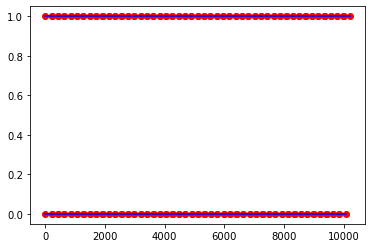

In [12]:
for i in range(len(channel.start)):
    x=[channel.start[i], channel.end[i]]
    print(x)
    y= [channel.operator[i], channel.operator[i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

[9992, 10200]
[1, 1]
[9852, 10060]
[0, 0]
[9779, 9987]
[1, 1]
[9638, 9846]
[0, 0]
[9567, 9775]
[1, 1]
[9425, 9633]
[0, 0]
[9355, 9563]
[1, 1]
[9207, 9415]
[0, 0]
[9143, 9351]
[1, 1]
[8989, 9197]
[0, 0]


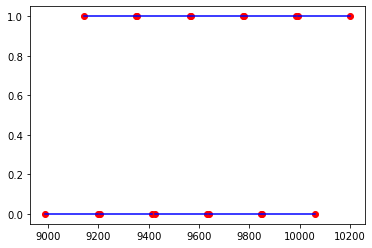

In [16]:
k = len(channel.start) - 1
for i in range(10):
    x=[channel.start[k - i], channel.end[k - i]]
    print(x)
    y= [channel.operator[k - i], channel.operator[k - i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

In [6]:
stations_list[0].history


[['IDLE', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['IDLE', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['IOUT', tensor(0, device='cuda:0'), 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['IOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 0, 'unkonw'],
 ['BUSY', 0, 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOUT'],
 ['BOUT', tensor(0, device='cuda:0'), 'unkonw'],
 ['BUSY', 1, 'TIMEOUT'],
 ['BOUT', 1, 'TIMEOU